In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import Lori_wrangle
import env

In [2]:
# use a function to connect to and pull in data from SQL
df = Lori_wrangle.get_curriculum_data()
df.head()

date      time                                 path  user_id  \
0  2018-01-26  09:55:03                                    /        1   
1  2018-01-26  09:56:02                              java-ii        1   
2  2018-01-26  09:56:05  java-ii/object-oriented-programming        1   
3  2018-01-26  09:56:06   slides/object_oriented_programming        1   
4  2018-01-26  09:56:24            javascript-i/conditionals        2   

   cohort_id            ip    id     name     slack  start_date    end_date  \
0        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22  2016-02-06   
1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22  2016-02-06   
2        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22  2016-02-06   
3        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22  2016-02-06   
4       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08  2018-05-17   

            created_at           updated_at  deleted_at  program_id  
0  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN         1.0  
1  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN         1.0  
2  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN         1.0  
3  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN         1.0  
4  2018-01-08 13:59:10  2018-01-08 13:59:10         NaN         2.0

In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 109.9+ MB


In [4]:
# check observation where path is null
df[df.path.isnull()]

date      time path  user_id  cohort_id             ip    id  \
506305  2020-04-08  09:25:18  NaN      586       55.0  72.177.240.51  55.0   

         name   slack  start_date    end_date           created_at  \
506305  Curie  #curie  2020-02-03  2020-07-07  2020-02-03 19:31:51   

                 updated_at  deleted_at  program_id  
506305  2020-02-03 19:31:51         NaN         3.0

In [5]:
# fill null value & check that there are no nulls
df.path = df.path.fillna('/')
df.path.isnull().sum()

0

In [6]:
# concatenate date and time columns
df['date'] = df.date + ' ' + df.time
df.head()

date      time                                 path  \
0  2018-01-26 09:55:03  09:55:03                                    /   
1  2018-01-26 09:56:02  09:56:02                              java-ii   
2  2018-01-26 09:56:05  09:56:05  java-ii/object-oriented-programming   
3  2018-01-26 09:56:06  09:56:06   slides/object_oriented_programming   
4  2018-01-26 09:56:24  09:56:24            javascript-i/conditionals   

   user_id  cohort_id            ip    id     name     slack  start_date  \
0        1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
1        1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
2        1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
3        1        8.0  97.105.19.61   8.0  Hampton  #hampton  2015-09-22   
4        2       22.0  97.105.19.61  22.0    Teddy    #teddy  2018-01-08   

     end_date           created_at           updated_at  deleted_at  \
0  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
1  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
2  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
3  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
4  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10         NaN   

   program_id  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         2.0

In [7]:
# convert date column to datetime
df.date = pd.to_datetime(df.date)
df.head(2)

date      time     path  user_id  cohort_id            ip  \
0 2018-01-26 09:55:03  09:55:03        /        1        8.0  97.105.19.61   
1 2018-01-26 09:56:02  09:56:02  java-ii        1        8.0  97.105.19.61   

    id     name     slack  start_date    end_date           created_at  \
0  8.0  Hampton  #hampton  2015-09-22  2016-02-06  2016-06-14 19:52:26   
1  8.0  Hampton  #hampton  2015-09-22  2016-02-06  2016-06-14 19:52:26   

            updated_at  deleted_at  program_id  
0  2016-06-14 19:52:26         NaN         1.0  
1  2016-06-14 19:52:26         NaN         1.0

In [8]:
# set date column as index
df = df.set_index('date').sort_index()
df.head(2)

time     path  user_id  cohort_id            ip   id  \
date                                                                            
2018-01-26 09:55:03  09:55:03        /        1        8.0  97.105.19.61  8.0   
2018-01-26 09:56:02  09:56:02  java-ii        1        8.0  97.105.19.61  8.0   

                        name     slack  start_date    end_date  \
date                                                             
2018-01-26 09:55:03  Hampton  #hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:02  Hampton  #hampton  2015-09-22  2016-02-06   

                              created_at           updated_at  deleted_at  \
date                                                                        
2018-01-26 09:55:03  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
2018-01-26 09:56:02  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   

                     program_id  
date                             
2018-01-26 09:55:03         1.0  
2018-01-26 09:56:02         1.0

In [9]:
# convert other date columns to date_time
df[['start_date', 'end_date', 'created_at', 'updated_at']].apply(pd.to_datetime)
df.head()

time                                 path  user_id  \
date                                                                          
2018-01-26 09:55:03  09:55:03                                    /        1   
2018-01-26 09:56:02  09:56:02                              java-ii        1   
2018-01-26 09:56:05  09:56:05  java-ii/object-oriented-programming        1   
2018-01-26 09:56:06  09:56:06   slides/object_oriented_programming        1   
2018-01-26 09:56:24  09:56:24            javascript-i/conditionals        2   

                     cohort_id            ip    id     name     slack  \
date                                                                    
2018-01-26 09:55:03        8.0  97.105.19.61   8.0  Hampton  #hampton   
2018-01-26 09:56:02        8.0  97.105.19.61   8.0  Hampton  #hampton   
2018-01-26 09:56:05        8.0  97.105.19.61   8.0  Hampton  #hampton   
2018-01-26 09:56:06        8.0  97.105.19.61   8.0  Hampton  #hampton   
2018-01-26 09:56:24       22.0  97.105.19.61  22.0    Teddy    #teddy   

                     start_date    end_date           created_at  \
date                                                               
2018-01-26 09:55:03  2015-09-22  2016-02-06  2016-06-14 19:52:26   
2018-01-26 09:56:02  2015-09-22  2016-02-06  2016-06-14 19:52:26   
2018-01-26 09:56:05  2015-09-22  2016-02-06  2016-06-14 19:52:26   
2018-01-26 09:56:06  2015-09-22  2016-02-06  2016-06-14 19:52:26   
2018-01-26 09:56:24  2018-01-08  2018-05-17  2018-01-08 13:59:10   

                              updated_at  deleted_at  program_id  
date                                                              
2018-01-26 09:55:03  2016-06-14 19:52:26         NaN         1.0  
2018-01-26 09:56:02  2016-06-14 19:52:26         NaN         1.0  
2018-01-26 09:56:05  2016-06-14 19:52:26         NaN         1.0  
2018-01-26 09:56:06  2016-06-14 19:52:26         NaN         1.0  
2018-01-26 09:56:24  2018-01-08 13:59:10         NaN         2.0

In [10]:
# drop unnecessary columns
df.drop(columns=['time', 'id', 'slack', 'deleted_at'], inplace=True)

In [11]:
df.head(2)

path  user_id  cohort_id            ip     name  \
date                                                                      
2018-01-26 09:55:03        /        1        8.0  97.105.19.61  Hampton   
2018-01-26 09:56:02  java-ii        1        8.0  97.105.19.61  Hampton   

                     start_date    end_date           created_at  \
date                                                               
2018-01-26 09:55:03  2015-09-22  2016-02-06  2016-06-14 19:52:26   
2018-01-26 09:56:02  2015-09-22  2016-02-06  2016-06-14 19:52:26   

                              updated_at  program_id  
date                                                  
2018-01-26 09:55:03  2016-06-14 19:52:26         1.0  
2018-01-26 09:56:02  2016-06-14 19:52:26         1.0

In [12]:
# create a column that identifies the program for each observation
df['program'] = ['fullstack_php'if x ==1 else
                 'fullstack_java'if x ==2 else
                 'data_science' if x ==3 else 
                 'front_end' if x ==4 else
                 'none' for x in df.program_id]
df.head(2)

path  user_id  cohort_id            ip     name  \
date                                                                      
2018-01-26 09:55:03        /        1        8.0  97.105.19.61  Hampton   
2018-01-26 09:56:02  java-ii        1        8.0  97.105.19.61  Hampton   

                     start_date    end_date           created_at  \
date                                                               
2018-01-26 09:55:03  2015-09-22  2016-02-06  2016-06-14 19:52:26   
2018-01-26 09:56:02  2015-09-22  2016-02-06  2016-06-14 19:52:26   

                              updated_at  program_id        program  
date                                                                 
2018-01-26 09:55:03  2016-06-14 19:52:26         1.0  fullstack_php  
2018-01-26 09:56:02  2016-06-14 19:52:26         1.0  fullstack_php

In [13]:
# check how many of each program
df.program.value_counts()

fullstack_java    713365
data_science      103412
none               52893
fullstack_php      30548
front_end              5
Name: program, dtype: int64

In [14]:
# create a function to prep data for exploration

def prep_curriculum_data():
    # use a function to connect to and pull in data from SQL
    df = Lori_wrangle.get_curriculum_data()
    # fill null value
    df.path = df.path.fillna('/')
    # concatenate date and time columns
    df['date'] = df.date + ' ' + df.time
    # convert date column to datetime
    df.date = pd.to_datetime(df.date)
    # set date column as index
    df = df.set_index('date').sort_index()
    # convert other date columns to date_time
    df[['start_date', 'end_date', 'created_at', 'updated_at']].apply(pd.to_datetime)
    # drop unnecessary columns
    df.drop(columns=['time', 'id', 'slack', 'deleted_at'], inplace=True)
    # create a column that identifies the program for each observation
    df['program'] = ['fullstack_php'if x ==1 else
                     'fullstack_java'if x ==2 else
                     'data_science' if x ==3 else 
                     'front_end' if x ==4 else
                     'none' for x in df.program_id]
    
    return df

In [15]:
# check function
df = prep_curriculum_data()
df.head()

path  user_id  cohort_id  \
date                                                                           
2018-01-26 09:55:03                                    /        1        8.0   
2018-01-26 09:56:02                              java-ii        1        8.0   
2018-01-26 09:56:05  java-ii/object-oriented-programming        1        8.0   
2018-01-26 09:56:06   slides/object_oriented_programming        1        8.0   
2018-01-26 09:56:24            javascript-i/conditionals        2       22.0   

                               ip     name  start_date    end_date  \
date                                                                 
2018-01-26 09:55:03  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:02  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:05  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:06  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:24  97.105.19.61    Teddy  2018-01-08  2018-05-17   

                              created_at           updated_at  program_id  \
date                                                                        
2018-01-26 09:55:03  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:02  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:05  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:06  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:24  2018-01-08 13:59:10  2018-01-08 13:59:10         2.0   

                            program  
date                                 
2018-01-26 09:55:03   fullstack_php  
2018-01-26 09:56:02   fullstack_php  
2018-01-26 09:56:05   fullstack_php  
2018-01-26 09:56:06   fullstack_php  
2018-01-26 09:56:24  fullstack_java

# Question 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [16]:
# check when data science program began
df[(df.program == 'data_science')].head()

path  user_id  cohort_id            ip   name  start_date  \
date                                                                            
2019-08-20 09:39:58    /      466       34.0  97.105.19.58  Bayes  2019-08-19   
2019-08-20 09:39:59    /      467       34.0  97.105.19.58  Bayes  2019-08-19   
2019-08-20 09:39:59    /      468       34.0  97.105.19.58  Bayes  2019-08-19   
2019-08-20 09:40:02    /      469       34.0  97.105.19.58  Bayes  2019-08-19   
2019-08-20 09:40:08    /      470       34.0  97.105.19.58  Bayes  2019-08-19   

                       end_date           created_at           updated_at  \
date                                                                        
2019-08-20 09:39:58  2020-01-30  2019-08-20 14:38:55  2019-08-20 14:38:55   
2019-08-20 09:39:59  2020-01-30  2019-08-20 14:38:55  2019-08-20 14:38:55   
2019-08-20 09:39:59  2020-01-30  2019-08-20 14:38:55  2019-08-20 14:38:55   
2019-08-20 09:40:02  2020-01-30  2019-08-20 14:38:55  2019-08-20 14:38:55   
2019-08-20 09:40:08  2020-01-30  2019-08-20 14:38:55  2019-08-20 14:38:55   

                     program_id       program  
date                                           
2019-08-20 09:39:58         3.0  data_science  
2019-08-20 09:39:59         3.0  data_science  
2019-08-20 09:39:59         3.0  data_science  
2019-08-20 09:40:02         3.0  data_science  
2019-08-20 09:40:08         3.0  data_science

In [17]:
df.name.value_counts().sort_index(ascending=True)

Andromeda     25359
Apex          33568
Apollo            5
Arches         8890
Badlands         93
Bash          17713
Bayes         26538
Betelgeuse    29356
Ceres         40730
Curie         21582
Darden        32015
Deimos        32888
Denali            4
Easley        14715
Europa        28033
Everglades        1
Florence       8562
Fortuna       36902
Franklin         72
Ganymede      33844
Glacier         598
Hampton        1712
Hyperion      29855
Ike             253
Joshua          302
Jupiter       37109
Kalypso       23691
Kings          2845
Lassen         9587
Luna          16623
Mammoth         691
Marco         16397
Neptune        7276
Niagara         755
Oberon         1672
Olympic        4954
Pinnacles      2158
Quincy         1237
Sequoia        7444
Staff         84031
Teddy         30926
Ulysses       28534
Voyageurs     35636
Wrangell      25586
Xanadu        27749
Yosemite      20743
Zion          38096
Name: name, dtype: int64

In [18]:
# check where data science students are accessing paths related to web development
ds_access_webdev = df[(df.program == 'data_science') & df.path.str.contains('java')]
ds_access_webdev

path  user_id  cohort_id  \
date                                                                           
2019-09-23 11:45:09                             java-iii      476       34.0   
2019-09-25 19:30:44                         javascript-i      476       34.0   
2019-09-25 19:31:07                         javascript-i      476       34.0   
2019-09-25 19:31:11                               java-i      476       34.0   
2019-09-25 19:31:12                         javascript-i      476       34.0   
2019-09-25 19:31:14                               java-i      476       34.0   
2019-09-25 19:31:19                              java-ii      476       34.0   
2019-09-25 19:32:23                         javascript-i      476       34.0   
2019-09-25 19:32:34                               java-i      476       34.0   
2019-09-25 19:32:38                               java-i      476       34.0   
2019-09-25 19:32:44                    java-i/console-io      476       34.0   
2019-11-25 14:26:14                         javascript-i      476       34.0   
2019-11-25 14:26:16                        javascript-ii      476       34.0   
2019-11-25 14:26:17                               java-i      476       34.0   
2019-11-25 14:26:18                              java-ii      476       34.0   
2019-11-25 14:26:20                             java-iii      476       34.0   
2019-11-25 14:26:24                             java-iii      476       34.0   
2019-11-26 10:31:16         javascript-i/bom-and-dom/dom      467       34.0   
2019-11-26 10:37:35                         javascript-i      476       34.0   
2019-11-26 10:37:39                        javascript-ii      476       34.0   
2019-11-26 10:38:06                               java-i      476       34.0   
2019-11-26 10:55:05                         javascript-i      476       34.0   
2019-11-26 15:32:05            javascript-i/conditionals      472       34.0   
2019-12-03 10:04:40                         javascript-i      467       34.0   
2019-12-03 10:04:48                        javascript-ii      467       34.0   
2019-12-03 10:04:48                               java-i      467       34.0   
2019-12-03 10:04:49                              java-ii      467       34.0   
2019-12-03 10:05:25                             java-iii      467       34.0   
2019-12-03 11:49:29                         javascript-i      467       34.0   
2019-12-03 11:49:33                        javascript-ii      467       34.0   
2019-12-03 11:49:35                              java-ii      467       34.0   
2019-12-14 16:46:24                         javascript-i      476       34.0   
2020-05-19 16:03:32  java-ii/object-oriented-programming      590       55.0   

                                ip   name  start_date    end_date  \
date                                                                
2019-09-23 11:45:09   97.105.19.58  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:30:44  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:31:07  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:31:11  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:31:12  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:31:14  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:31:19  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:32:23  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:32:34  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:32:38  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-09-25 19:32:44  136.50.49.145  Bayes  2019-08-19  2020-01-30   
2019-11-25 14:26:14   97.105.19.58  Bayes  2019-08-19  2020-01-30   
2019-11-25 14:26:16   97.105.19.58  Bayes  2019-08-19  2020-01-30   
2019-11-25 14:26:17   97.105.19.58  Bayes  2019-08-19  2020-01-30   
2019-11-25 14:26:18   97.105.19.58  Bayes  2019-08-19  2020-01-30   
2019-11-25 14:26:20   97.105.19.58  Bayes  2019-08-19  2020-01-30   
2019-11-2

In [19]:
# get the individual user ids that are accessing curriculum outside of their program
set(ds_access_webdev.user_id)

{467, 472, 476, 590}

In [20]:
# check where web development students are accessing paths related to data science
webdev_access_ds = df[(df.program_id.isin([1,2,4])) & (df.name != 'Staff') & (df.path.str.contains('science'))]
webdev_access_ds

path  user_id  \
date                                                                     
2019-04-13 01:39:14                               datascience      220   
2019-04-13 01:40:39                              data-science      220   
2019-08-23 11:45:04  1-fundamentals/1.1-intro-to-data-science      410   
2019-08-23 11:46:16  1-fundamentals/1.1-intro-to-data-science      423   
2019-08-23 11:46:29  1-fundamentals/1.1-intro-to-data-science      410   
...                                                       ...      ...   
2020-12-11 16:06:59        fundamentals/intro-to-data-science       20   
2021-01-11 09:42:53        fundamentals/intro-to-data-science       20   
2021-02-23 22:01:51        fundamentals/intro-to-data-science       20   
2021-02-25 09:02:46        fundamentals/intro-to-data-science       20   
2021-03-12 10:13:21                               datascience      790   

                     cohort_id               ip        name  start_date  \
date                                                                      
2019-04-13 01:39:14       25.0     70.120.5.227    Wrangell  2018-07-23   
2019-04-13 01:40:39       25.0     70.120.5.227    Wrangell  2018-07-23   
2019-08-23 11:45:04       32.0     97.105.19.58  Betelgeuse  2019-05-28   
2019-08-23 11:46:16       32.0     97.105.19.58  Betelgeuse  2019-05-28   
2019-08-23 11:46:29       32.0     97.105.19.58  Betelgeuse  2019-05-28   
...                        ...              ...         ...         ...   
2020-12-11 16:06:59       22.0  104.190.242.242       Teddy  2018-01-08   
2021-01-11 09:42:53       22.0  104.190.242.242       Teddy  2018-01-08   
2021-02-23 22:01:51       22.0  104.190.242.242       Teddy  2018-01-08   
2021-02-25 09:02:46       22.0  104.190.242.242       Teddy  2018-01-08   
2021-03-12 10:13:21      132.0   99.173.134.103     Kalypso  2020-11-02   

                       end_date           created_at           updated_at  \
date                                                                        
2019-04-13 01:39:14  2018-11-29  2018-07-23 15:02:25  2018-07-23 15:02:25   
2019-04-13 01:40:39  2018-11-29  2018-07-23 15:02:25  2018-07-23 15:02:25   
2019-08-23 11:45:04  2019-10-08  2019-05-28 18:41:05  2019-05-28 18:41:05   
2019-08-23 11:46:16  2019-10-08  2019-05-28 18:41:05  2019-05-28 18:41:05   
2019-08-23 11:46:29  2019-10-08  2019-05-28 18:41:05  2019-05-28 18:41:05   
...                         ...                  ...                  ...   
2020-12-11 16:06:59  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2021-01-11 09:42:53  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2021-02-23 22:01:51  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2021-02-25 09:02:46  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10   
2021-03-12 10:13:21  2021-05-04  2020-11-02 20:43:58  2020-11-02 20:43:58   

                     program_id         program  
date                                             
2019-04-13 01:39:14         2.0  fullstack_java  
2019-04-13 01:40:39         2.0  fullstack_java  
2019-08-23 11:45:04         2.0  fullstack_java  
2019-08-23 11:46:16         2.0  fullstack_java  
2019-08-23 11:46:29         2.0  fullstack_java  
...                         ...             ...  
2020-12-11 16:06:59         2.0  fullstack_java  
2021-01-11 09:42:53         2.0  fullstack_java  
2021-02-23 22:01:51         2.0  fullstack_java  
2021-02-25 09:02:46         2.0  fullstack_java  
2021-03-12 10:13:21         2.0  fullstack_java  

[61 rows x 11 columns]

In [21]:
# get the individual user ids that are accessing curriculum outside of their program
set(webdev_access_ds.user_id)

{18,
 20,
 41,
 53,
 94,
 124,
 138,
 143,
 171,
 201,
 220,
 249,
 373,
 410,
 417,
 423,
 433,
 450,
 451,
 458,
 495,
 513,
 790}

### The first data science cohort graduated in June 2019 (although not in the dataset) so there is no evidence of access to both curriculums before then. There is evidence of data science students accessing web development curriculum and vice versa through 2019 and after although it is limited to 4 data science students and 23 web development students.

In [22]:
# change setting to show all rows
pd.set_option('display.max_rows', 100)

In [23]:
# fullstack_java = df[(df.program == 'fullstack_java') & (df.path != '/')].reset_index()
# data_science = df[(df.program == 'data_science') & (df.path != '/')].reset_index()
# front_end = df[(df.program == 'front_end') & (df.path != '/')].reset_index()
# fullstack_php = df[(df.program == 'fullstack_php') & (df.path != '/')].reset_index()

In [24]:
# # check that all observations are accounted for in the resulting subsets
# fullstack_java.shape[0] + data_science.shape[0] + front_end.shape[0] + fullstack_php.shape[0] + (df.path == '/').sum() == df.shape[0]

In [25]:
# subset = df[(df.path != '/') & (df.name != 'Staff') & (df.program != 'none')]

# Question 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [26]:
df[['root', 'end_path']] = df.path.str.split(pat='/', n=1, expand=True)

In [27]:
df.root = df.root.str.lstrip('0123456789.- ')
df.head()

path  user_id  cohort_id  \
date                                                                           
2018-01-26 09:55:03                                    /        1        8.0   
2018-01-26 09:56:02                              java-ii        1        8.0   
2018-01-26 09:56:05  java-ii/object-oriented-programming        1        8.0   
2018-01-26 09:56:06   slides/object_oriented_programming        1        8.0   
2018-01-26 09:56:24            javascript-i/conditionals        2       22.0   

                               ip     name  start_date    end_date  \
date                                                                 
2018-01-26 09:55:03  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:02  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:05  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:06  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:24  97.105.19.61    Teddy  2018-01-08  2018-05-17   

                              created_at           updated_at  program_id  \
date                                                                        
2018-01-26 09:55:03  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:02  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:05  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:06  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:24  2018-01-08 13:59:10  2018-01-08 13:59:10         2.0   

                            program          root                     end_path  
date                                                                            
2018-01-26 09:55:03   fullstack_php                                             
2018-01-26 09:56:02   fullstack_php       java-ii                         None  
2018-01-26 09:56:05   fullstack_php       java-ii  object-oriented-programming  
2018-01-26 09:56:06   fullstack_php        slides  object_oriented_programming  
2018-01-26 09:56:24  fullstack_java  javascript-i                 conditionals

In [28]:
# check top pages for data science
ds_topics = df[(df.program_id == 3) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
ds_topics.head(10)

root
sql                1554
fundamentals       1520
                   1446
classification     1316
python              845
regression          710
anomaly-detection   628
stats               527
appendix            525
timeseries          497

# The topics that data science students return to the most after graduation are:

1. SQL

2. Fundamentals

3. Classification

4. Python

5. Regression

In [29]:
# check top pages for web development
wd_topics = df[(df.program_id.isin([1,2,4])) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
wd_topics.head(10)

root
javascript-i  19150
spring        17528
html-css      14496
              14123
mysql         13782
java-iii      11466
java-ii       10954
appendix      10866
jquery         9836
java-i         9050

# The topics that web development students return to the most after graduation are:

1. Javascript

2. Spring

3. HTML-CSS

4. MySQL

5. Java

# Question 7. Which lessons are least accessed?

In [30]:
# reset index
ds_topics.reset_index(inplace=True)

In [31]:
# rename columns
ds_topics.columns = ('root', 'count')
ds_topics.head()

root  count
0             sql   1554
1    fundamentals   1520
2                   1446
3  classification   1316
4          python    845

In [32]:
# check the topics that have less than 10 counts
ds_topics[ds_topics['count'] < 10]

root  count
16                                       capstones      8
17                                           mysql      5
18                                             cli      4
19                  Hospital-Distance-Clusters.jpg      4
20                       scale_features_or_not.svg      3
21  classical_programming_vs_machine_learning.jpeg      2
22                 Selecting_a_hypothesis_test.svg      2
23                                        overview      2
24                                acquire-and-prep      1
25                             DataToAction_v2.jpg      1
26                                 creating-charts      1
27                                  decision-trees      1
28                       modern-data-scientist.jpg      1
29                                       tidy-data      1
30                                 database-design      1
31                                           login      1
32                                            prep      1
33                                          spring      1
34                     spark-execution-diagram.svg      1
35                                      evaluation      1
36                                         prepare      1
37                              individual-project      1
38                                             git      1
39                           AI-ML-DL-timeline.jpg      1
40                    AnomalyDetectionCartoon.jpeg      1
41                            spark-local-mode.svg      1
42                                          viz.py      1

### I am going to remove the roots with less than 10 counts as they are files within the curriculum or fall under a main topic

In [33]:
# remove lower counts from dataframe
ds_topics = ds_topics[ds_topics['count'] > 10]

In [34]:
# get least accessed topics for data science
least_accessed = ds_topics.tail(10)
least_accessed

root  count
6   anomaly-detection    628
7               stats    527
8            appendix    525
9          timeseries    497
10             search    494
11                nlp    487
12         clustering    340
13     distributed-ml    231
14       storytelling    190
15    advanced-topics    185

<AxesSubplot:xlabel='root', ylabel='count'>

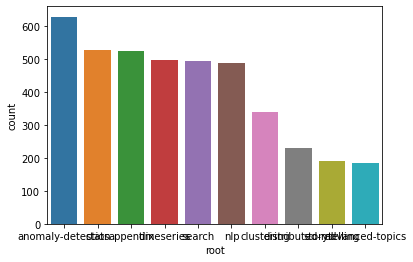

In [35]:
sns.barplot(data=least_accessed, x='root', y='count')

# The topics that web development students return to the least after graduation are:

1. Advanced Topics

2. Storytelling

3. Distributed Machine Learning

4. Clustering

5. Natural Language Processing

# Question 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [36]:
df.head()

path  user_id  cohort_id  \
date                                                                           
2018-01-26 09:55:03                                    /        1        8.0   
2018-01-26 09:56:02                              java-ii        1        8.0   
2018-01-26 09:56:05  java-ii/object-oriented-programming        1        8.0   
2018-01-26 09:56:06   slides/object_oriented_programming        1        8.0   
2018-01-26 09:56:24            javascript-i/conditionals        2       22.0   

                               ip     name  start_date    end_date  \
date                                                                 
2018-01-26 09:55:03  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:02  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:05  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:06  97.105.19.61  Hampton  2015-09-22  2016-02-06   
2018-01-26 09:56:24  97.105.19.61    Teddy  2018-01-08  2018-05-17   

                              created_at           updated_at  program_id  \
date                                                                        
2018-01-26 09:55:03  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:02  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:05  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:06  2016-06-14 19:52:26  2016-06-14 19:52:26         1.0   
2018-01-26 09:56:24  2018-01-08 13:59:10  2018-01-08 13:59:10         2.0   

                            program          root                     end_path  
date                                                                            
2018-01-26 09:55:03   fullstack_php                                             
2018-01-26 09:56:02   fullstack_php       java-ii                         None  
2018-01-26 09:56:05   fullstack_php       java-ii  object-oriented-programming  
2018-01-26 09:56:06   fullstack_php        slides  object_oriented_programming  
2018-01-26 09:56:24  fullstack_java  javascript-i                 conditionals

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900223 non-null  object 
 1   user_id     900223 non-null  int64  
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   created_at  847330 non-null  object 
 8   updated_at  847330 non-null  object 
 9   program_id  847330 non-null  float64
 10  program     900223 non-null  object 
 11  root        900223 non-null  object 
 12  end_path    731935 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 96.2+ MB


### There are user_ids that do not have a start or end date and are not associated with a particular cohort. I am going to check this out.

In [38]:
# create subset of df where name is null
subset = df[df.name.isnull()]

In [39]:
subset.head()

path  user_id  \
date                                                                  
2018-01-26 16:46:16                                      /       48   
2018-01-26 16:46:24  spring/extra-features/form-validation       48   
2018-01-26 17:54:24                                      /       48   
2018-01-26 18:32:03                                      /       48   
2018-01-26 18:32:17              mysql/relationships/joins       48   

                     cohort_id            ip name start_date end_date  \
date                                                                    
2018-01-26 16:46:16        NaN  97.105.19.61  NaN        NaN      NaN   
2018-01-26 16:46:24        NaN  97.105.19.61  NaN        NaN      NaN   
2018-01-26 17:54:24        NaN  97.105.19.61  NaN        NaN      NaN   
2018-01-26 18:32:03        NaN  97.105.19.61  NaN        NaN      NaN   
2018-01-26 18:32:17        NaN  97.105.19.61  NaN        NaN      NaN   

                    created_at updated_at  program_id program    root  \
date                                                                    
2018-01-26 16:46:16        NaN        NaN         NaN    none           
2018-01-26 16:46:24        NaN        NaN         NaN    none  spring   
2018-01-26 17:54:24        NaN        NaN         NaN    none           
2018-01-26 18:32:03        NaN        NaN         NaN    none           
2018-01-26 18:32:17        NaN        NaN         NaN    none   mysql   

                                           end_path  
date                                                 
2018-01-26 16:46:16                                  
2018-01-26 16:46:24  extra-features/form-validation  
2018-01-26 17:54:24                                  
2018-01-26 18:32:03                                  
2018-01-26 18:32:17             relationships/joins

In [40]:
# check the number of unique user ids within this subset
subset.user_id.nunique()

78

### The function below loops through all users in the subset and returns those whose daily activity exceeds the upper limit of the bollinger band range (pct_b > 1)

In [51]:
# use functions to loop through each unique user id and get the activity for each user
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(subset.user_id.unique()):
    user_df = Lori_wrangle.find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [52]:
# check data
anomalies

single_user_data    midband         ub         lb     pct_b  \
date                                                                      
2018-04-04                86  12.630171  78.000490 -52.740147  1.061186   
2018-09-18                 7   0.499899   6.171987  -5.172188  1.072990   
2018-10-03                34   2.551265  28.167105 -23.064574  1.113853   
2019-01-08                 7   0.459972   5.830732  -4.910788  1.108855   
2019-03-19                24   1.552705  19.547911 -16.442501  1.123702   
...                      ...        ...        ...        ...       ...   
2020-10-14                 2   0.147893   1.781517  -1.485730  1.066871   
2020-11-29                 7   0.459263   5.719780  -4.801253  1.121682   
2020-12-02                32   2.908823  26.994484 -21.176839  1.103911   
2021-01-22                27   2.571103  23.319958 -18.177752  1.088681   
2021-01-25                 4   0.438344   3.670721  -2.794032  1.050935   

            user_id  
date                 
2018-04-04       48  
2018-09-18       48  
2018-10-03       48  
2019-01-08       48  
2019-03-19       48  
...             ...  
2020-10-14      744  
2020-11-29      744  
2020-12-02      744  
2021-01-22      744  
2021-01-25      815  

[231 rows x 6 columns]

In [53]:
# sort by number of path views
anomalies.sort_values(by='single_user_data', ascending=False)

single_user_data    midband          ub          lb     pct_b  \
date                                                                        
2019-03-27               184  26.524183  162.499722 -109.451357  1.079059   
2018-06-24               158  16.516319  142.413376 -109.380738  1.061902   
2020-08-06               132  25.018165  125.735078  -75.698748  1.031102   
2019-05-30               130  24.252047  122.492668  -73.988574  1.038209   
2020-02-03               129  17.689793  117.063752  -81.684165  1.060057   
...                      ...        ...         ...         ...       ...   
2019-12-27                 1   0.064516    0.814126   -0.685094  1.123981   
2020-09-25                 1   0.064516    0.814128   -0.685095  1.123979   
2018-09-21                 1   0.066908    0.927837   -0.794021  1.041910   
2018-09-25                 1   0.074293    0.984489   -0.835902  1.008521   
2020-05-13                 1   0.073714    0.935518   -0.788090  1.037411   

            user_id  
date                 
2019-03-27      354  
2018-06-24      111  
2020-08-06       64  
2019-05-30      354  
2020-02-03       64  
...             ...  
2019-12-27       63  
2020-09-25      406  
2018-09-21      166  
2018-09-25       79  
2020-05-13      366  

[231 rows x 6 columns]

#### I am going to eliminate students who have 25 or less page views as it's less likely to be associated with suspicious activity even though it may be out of the norm for them

In [54]:
# narrow down anomalies to users who have more than 25 page views on any one day
anomalies = anomalies[anomalies.single_user_data > 25]
anomalies

single_user_data    midband          ub          lb     pct_b  \
date                                                                        
2018-04-04                86  12.630171   78.000490  -52.740147  1.061186   
2018-10-03                34   2.551265   28.167105  -23.064574  1.113853   
2019-12-04                28   3.117681   26.945042  -20.709679  1.022138   
2018-03-21                45   4.729556   39.933155  -30.474042  1.071965   
2018-10-20                59   4.088233   48.292040  -40.115574  1.121120   
2018-04-23                30   3.375610   27.631913  -20.880694  1.048814   
2018-06-20                29   1.872500   23.618263  -19.873262  1.123742   
2018-09-25                30   2.041386   24.539564  -20.456791  1.121353   
2018-10-01                58   5.982915   52.327803  -40.361974  1.061195   
2019-07-01                65   4.339087   53.079346  -44.401172  1.122288   
2019-07-22                89   6.811386   77.200678  -63.577906  1.083815   
2020-01-30                43   2.883386   35.195610  -29.428839  1.120765   
2020-11-05                41   3.000809   33.626300  -27.624682  1.120385   
2020-12-08                34   2.525777   29.877149  -24.825596  1.075368   
2018-06-23                31   2.000406   25.240578  -21.239766  1.123911   
2018-05-20                58   8.285420   52.372145  -35.801306  1.063827   
2018-06-23                74   6.754560   63.299061  -49.789941  1.094624   
2018-06-24               158  16.516319  142.413376 -109.380738  1.061902   
2019-07-15                39   4.975164   36.229850  -26.279521  1.044316   
2019-08-29                27   2.864609   24.690700  -18.961481  1.052902   
2019-02-26                46   7.398965   45.544839  -30.746909  1.005966   
2019-05-02                87  12.397164   77.089603  -52.295274  1.076596   
2019-03-27               184  26.524183  162.499722 -109.451357  1.079059   
2019-05-30               130  24.252047  122.492668  -73.988574  1.038209   
2019-09-05                28   4.884445   27.766693  -17.997804  1.005098   
2020-02-20                35   3.693776   31.298865  -23.911313  1.067037   
2019-04-29                34   5.183605   32.387199  -22.019990  1.029643   
2019-04-03                50   9.704232   48.904726  -29.496262  1.013970   
2019-07-26                26   2.283200   23.633597  -19.067197  1.055418   
2019-03-27                47   7.950734   44.809188  -28.907719  1.029719   
2019-05-14                40   8.543064   39.547981  -22.461853  1.007289   
2019-08-13                45   4.537639   40.557885  -31.482606  1.061661   
2019-09-05                35   3.541161   34.291096  -27.208775  1.011527   
2019-05-14                59  12.016722   57.240794  -33.207350  1.019450   
2019-05-10                70  14.824401   67.735090  -38.086288  1.021403   
2019-08-01                64   9.573767   61.039219  -41.891685  1.028765   
2019-10-04                76   5.781134   63.032268  -51.470000  1.113253   
2020-04-06                78   5.594773   63.947479  -52.757933  1.120410   
2019-07-16                39   5.604993   37.057459  -25.847472  1.030881   
2018-03-06                39   6.534919   38.864360  -25.794522  1.002098   
2019-07-10                78  10.099212   77.119902  -56.921479  1.006566   
2019-08-15               121  20.573964  115.634516  -74.486588  1.028221   
2020-01-18                58   8.077708   54.629721  -38.474304  1.036199   
2020-02-03               129  17.689793  117.063752  -81.684165  1.060057   
2020-08-06               132  25.018165  125.735078  -75.698748  1.031102   
2020-11-19                58   9.066151   56.385019  -38.252717  1.017065   
2020-08-26                54  15.481542   53.052153  -22.089068  1.012614   
2021-02-17                27   2.136833   22.931303  -18.657636  1.097831   
2020-09-03                31   4.765356   30.096368  -20.565655  1.017836   
2020-10-04                41   7.467490   38.729491  -23.794511  1.036314   
2021-01-

In [55]:
# check which users have the most days of anomalous activity
anomalies.groupby('user_id').single_user_data.count().sort_values(ascending=False)

user_id
88     7
64     6
375    4
48     3
111    3
358    2
736    2
720    2
368    2
58     2
744    2
354    2
352    2
349    2
714    1
61     1
729    1
728    1
721    1
73     1
718    1
716    1
644    1
713    1
359    1
429    1
103    1
372    1
364    1
363    1
362    1
366    1
Name: single_user_data, dtype: int64

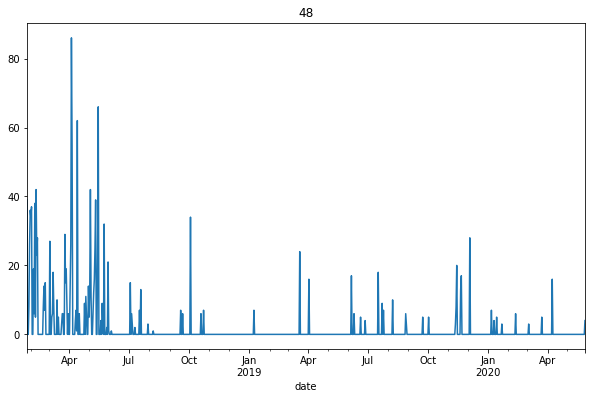

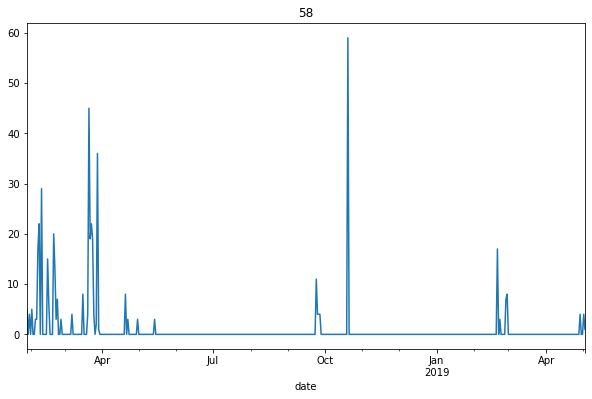

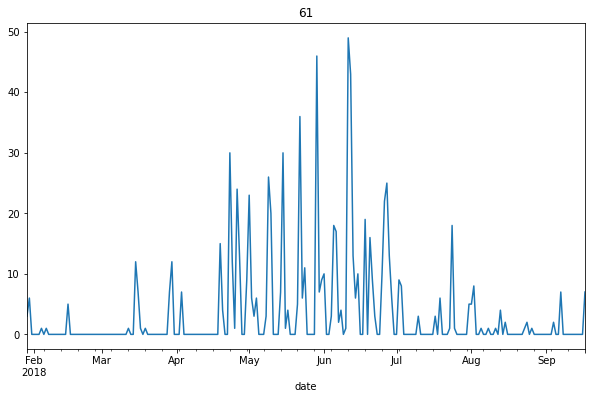

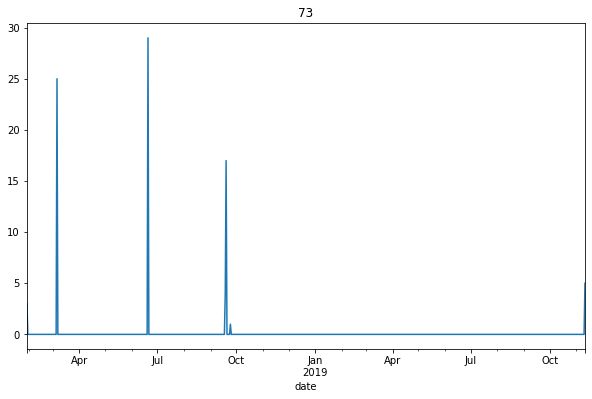

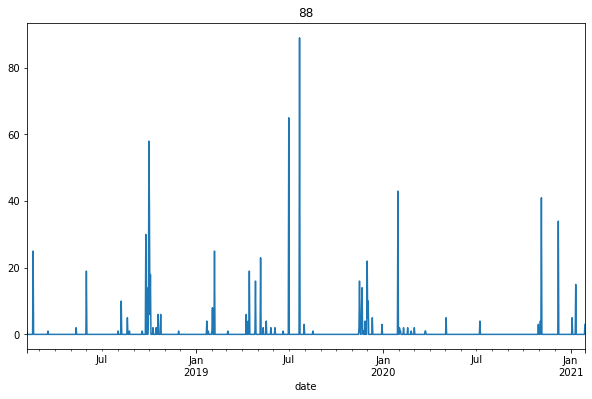

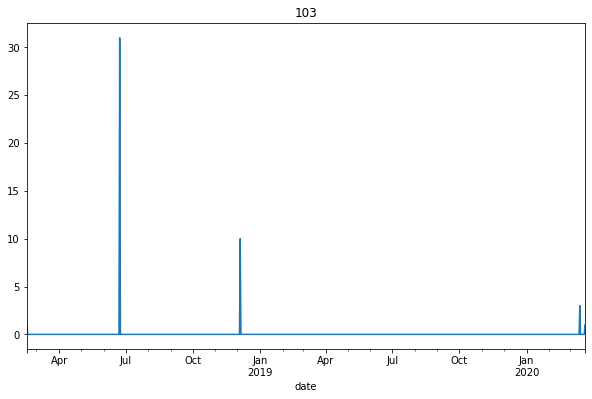

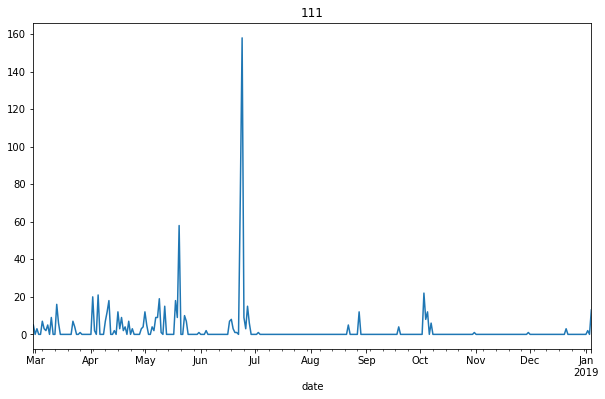

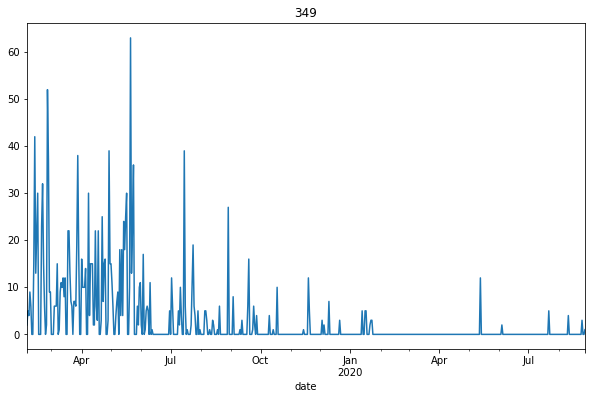

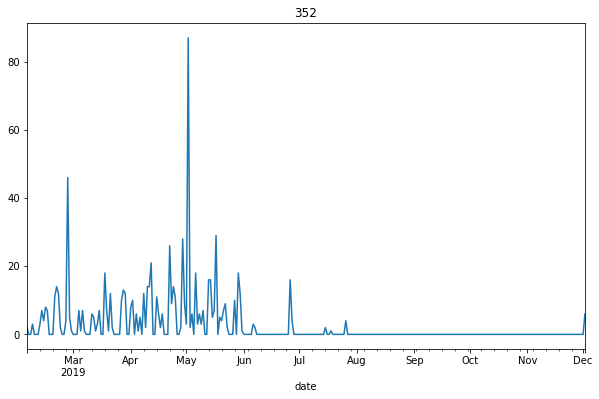

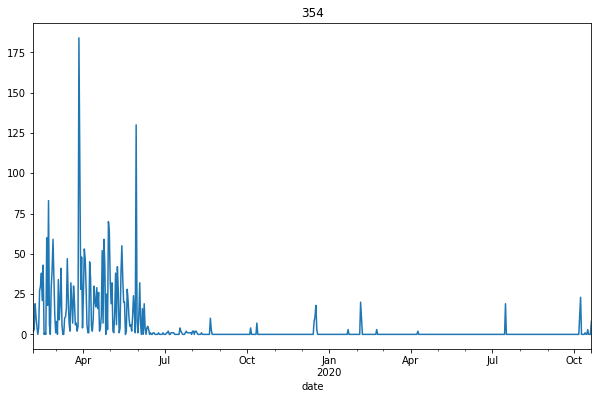

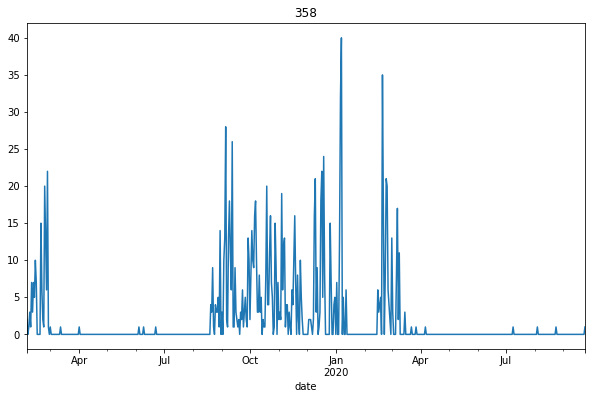

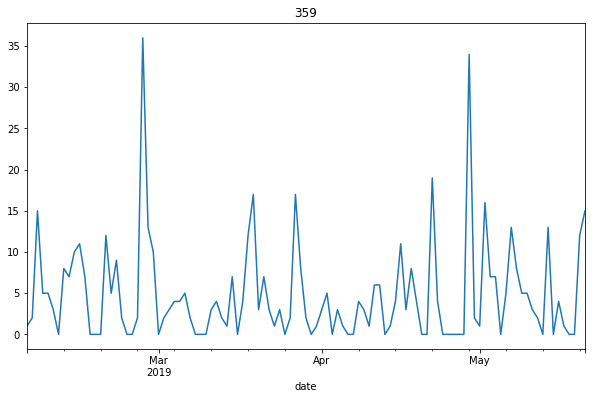

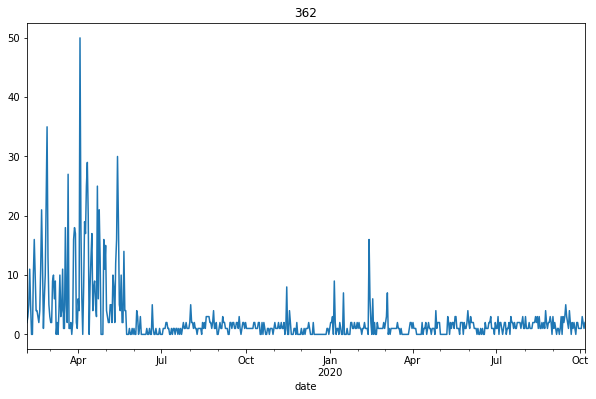

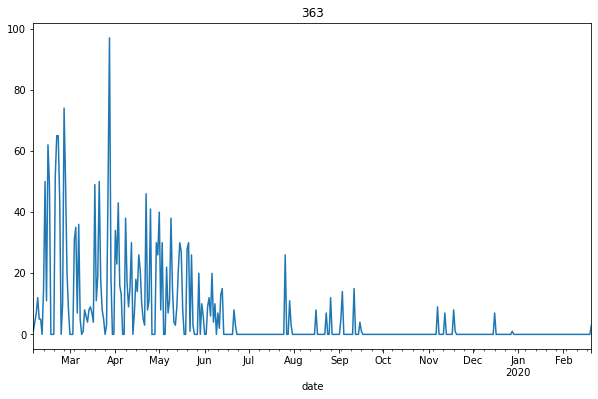

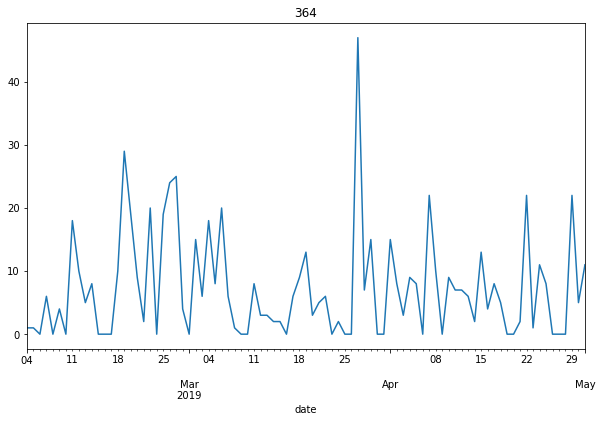

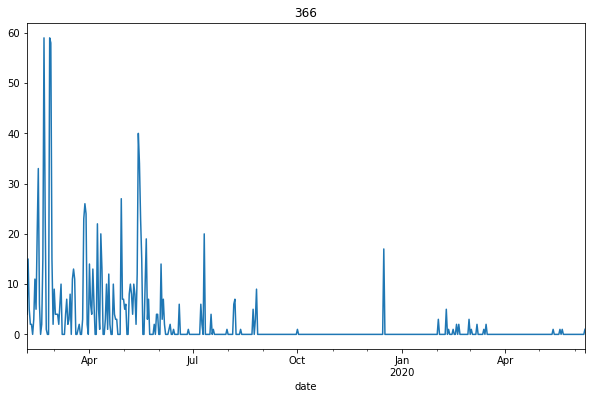

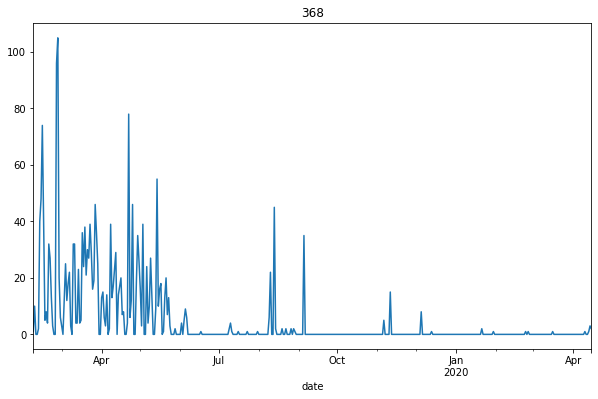

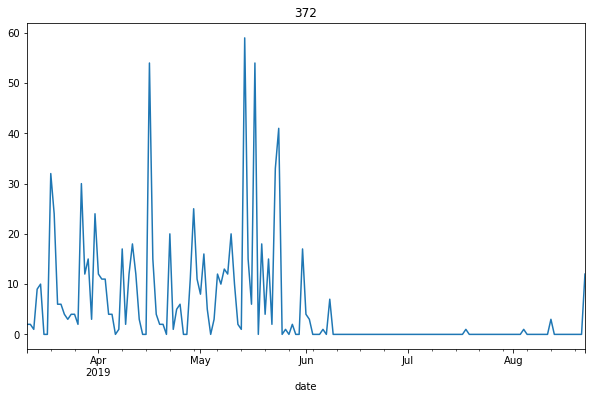

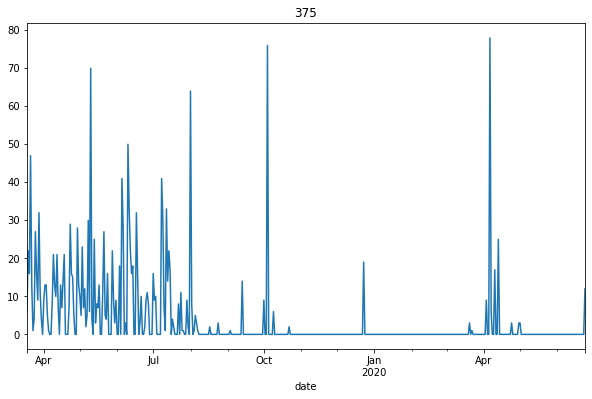

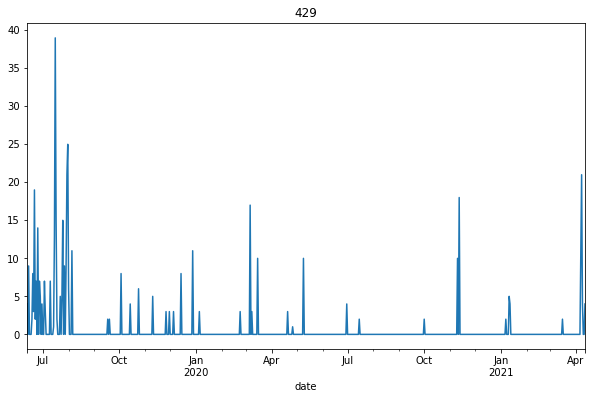

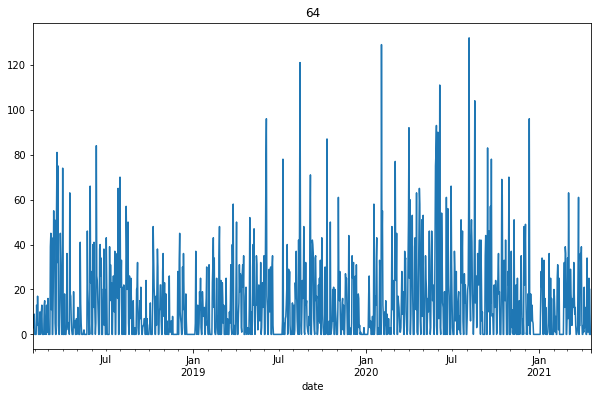

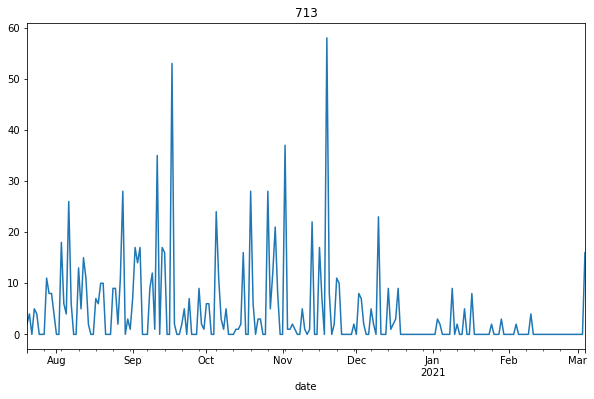

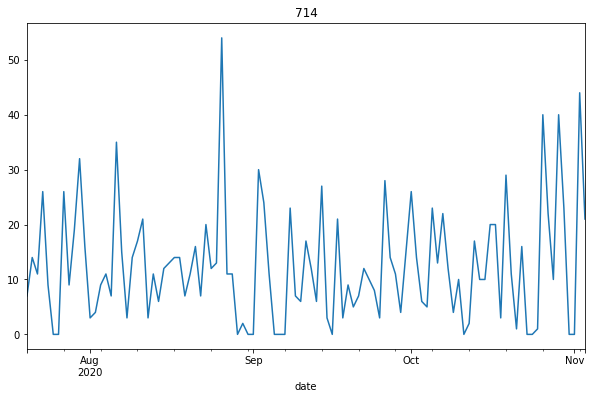

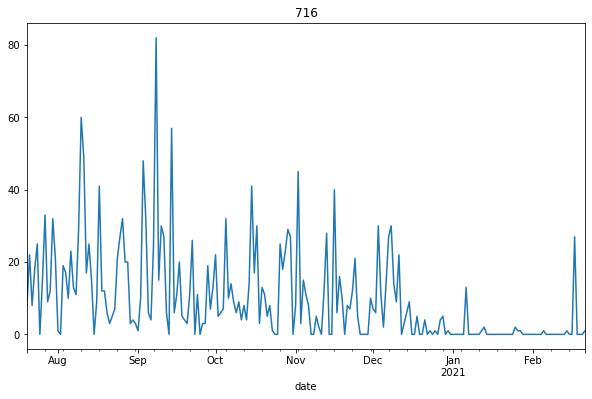

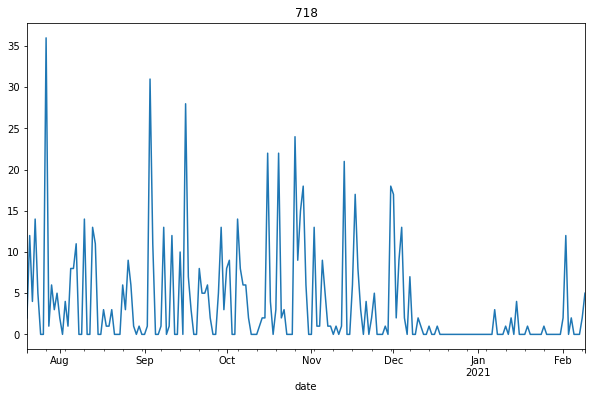

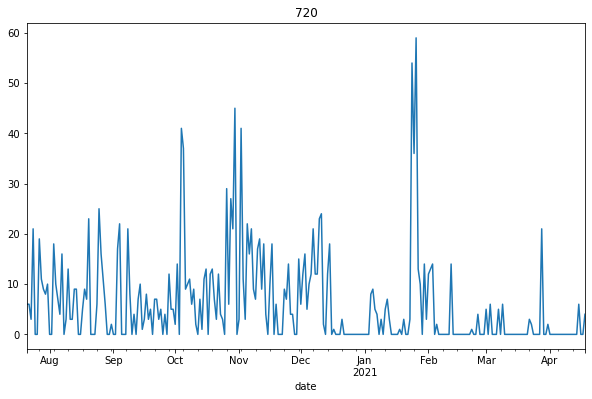

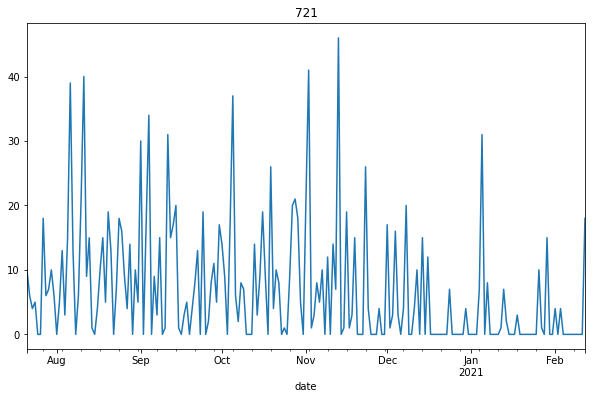

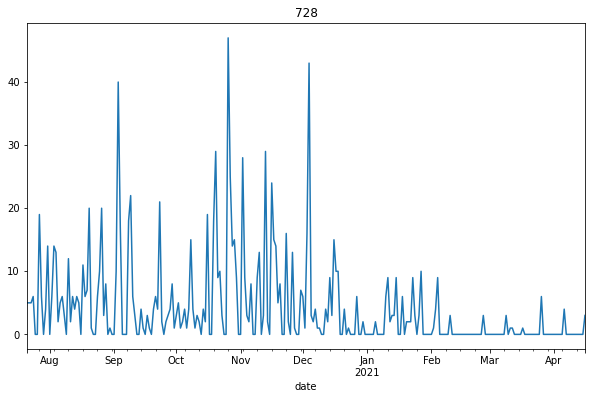

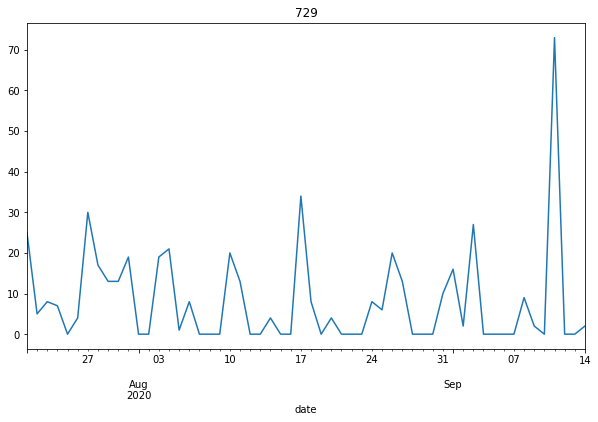

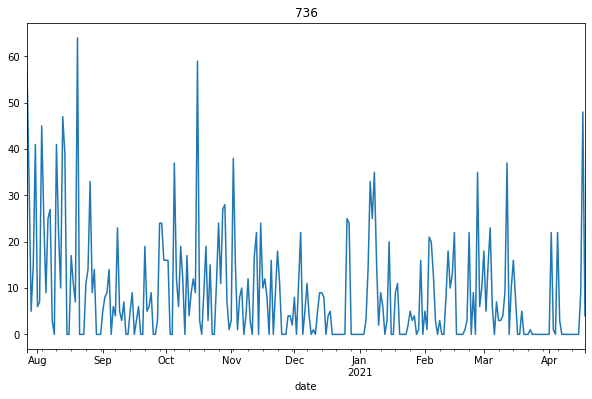

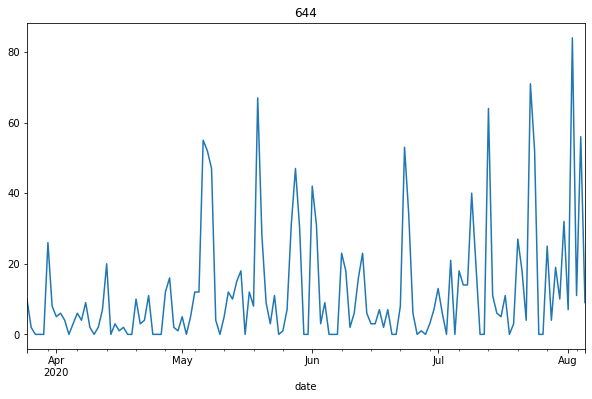

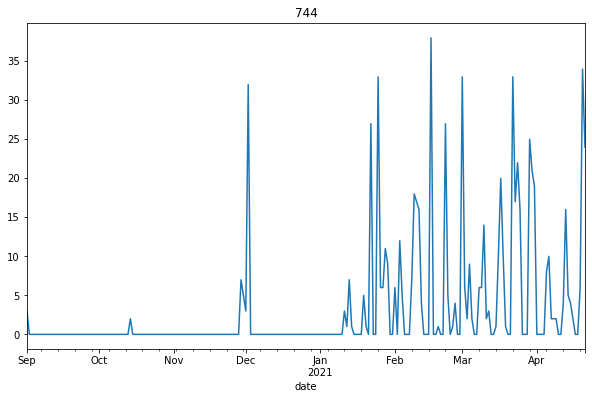

In [61]:

for user in anomalies.user_id.unique():
    df_user = Lori_wrangle.prep_data_by_user(df, user)
    df_user.plot(figsize=(10,6))
    plt.title(user)
    plt.show()

In [ ]:
df.head()

KeyboardInterrupt: 

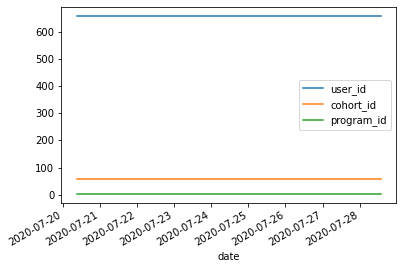

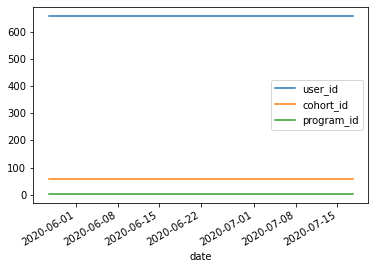

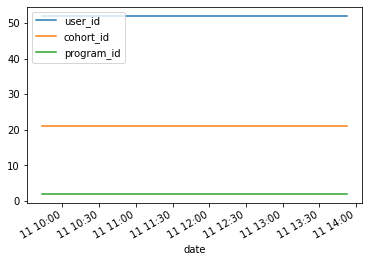

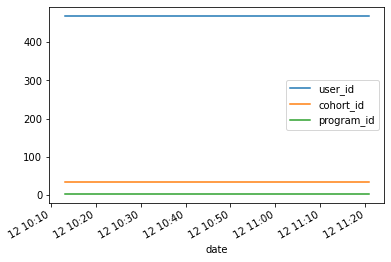

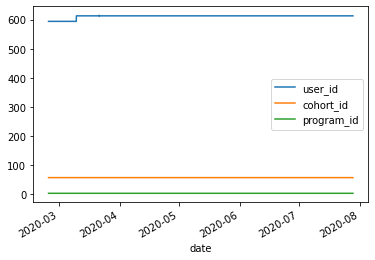

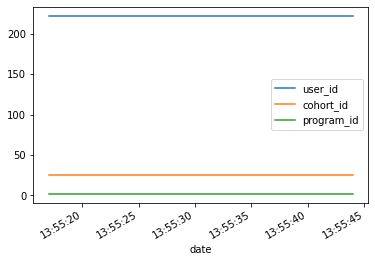

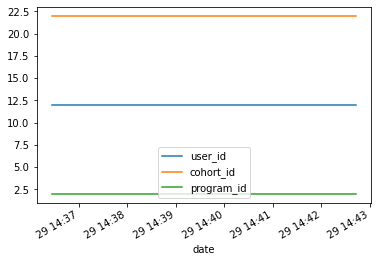

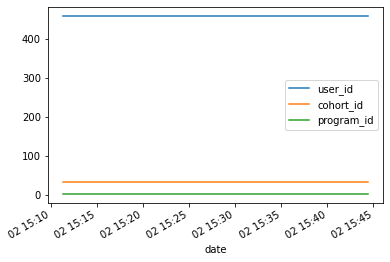

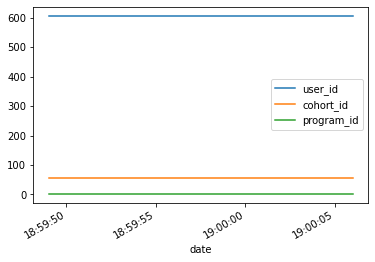

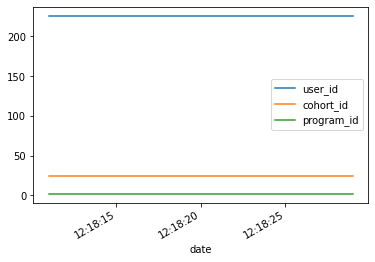

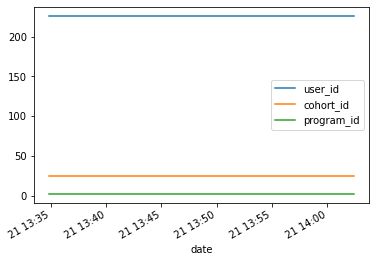

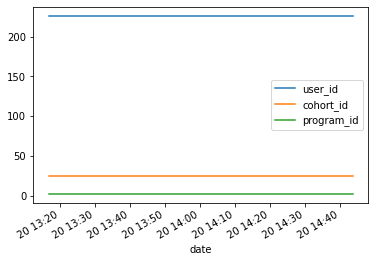

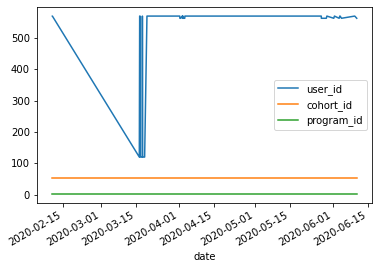

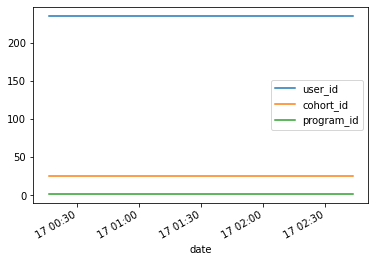

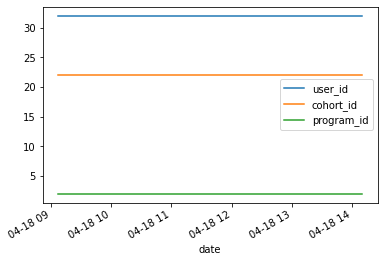

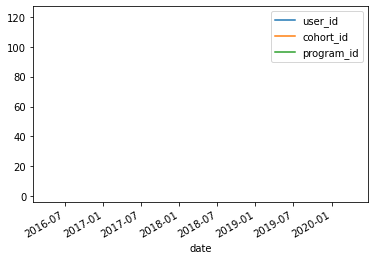

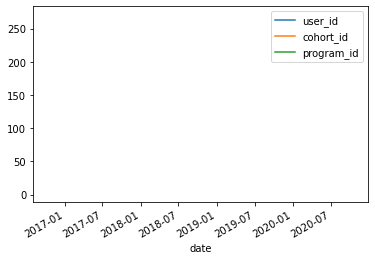

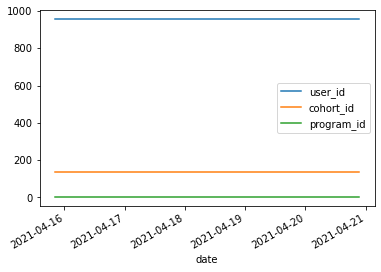

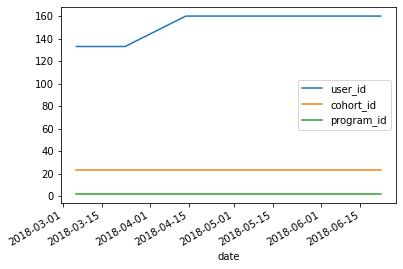

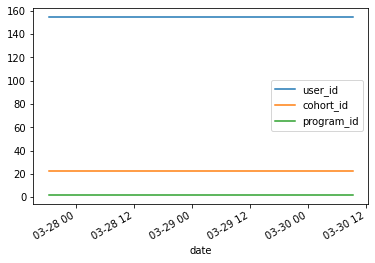

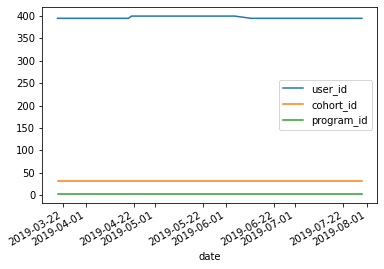

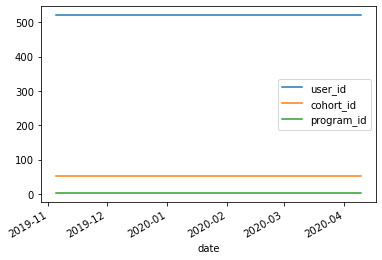

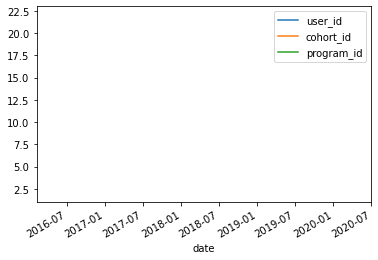

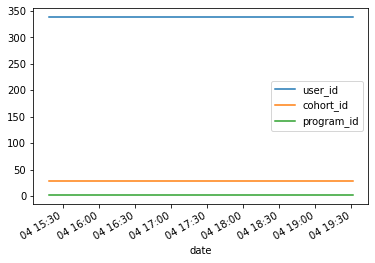

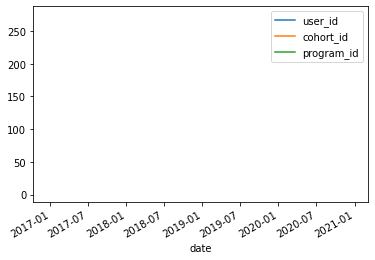

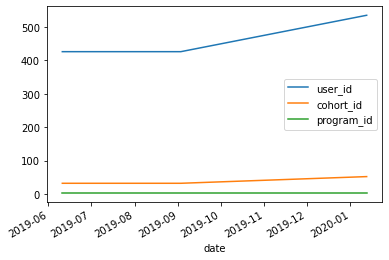

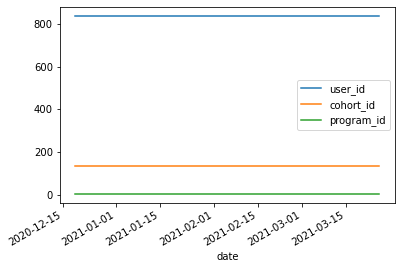

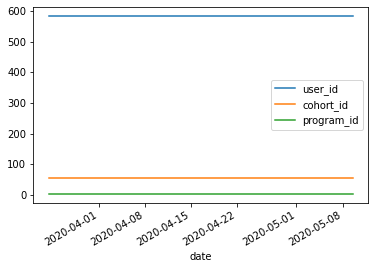

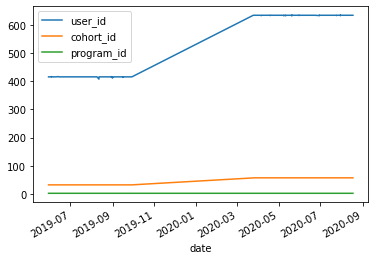

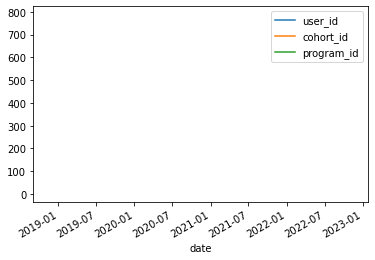

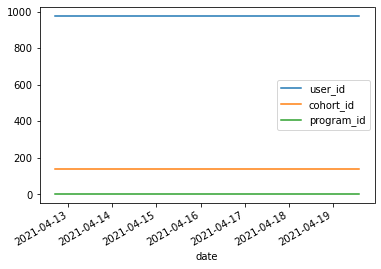

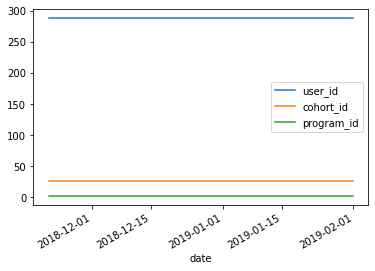

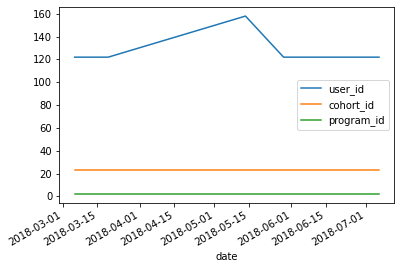

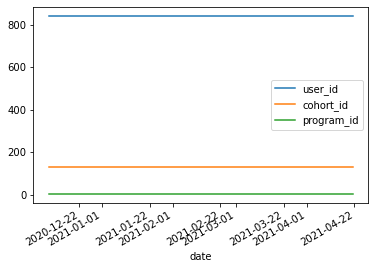

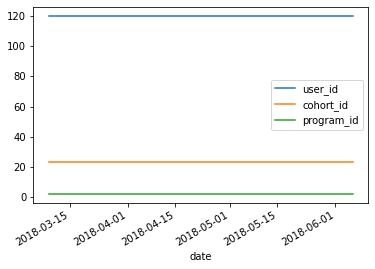

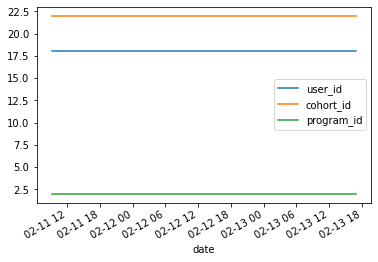

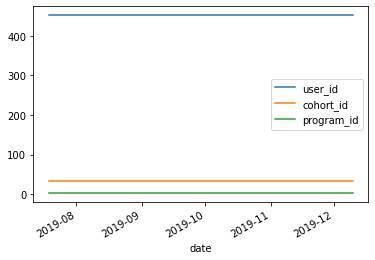

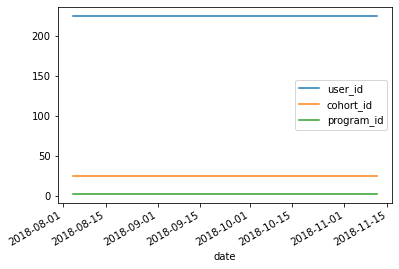

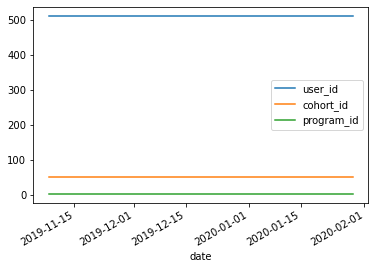

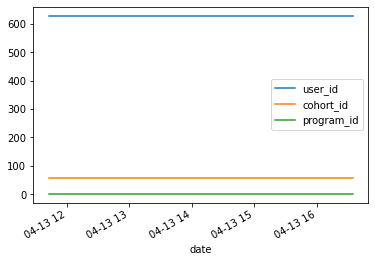

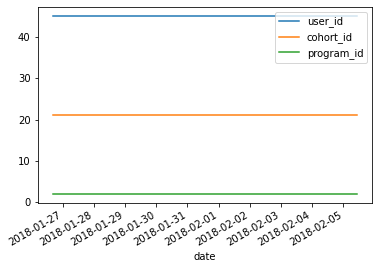

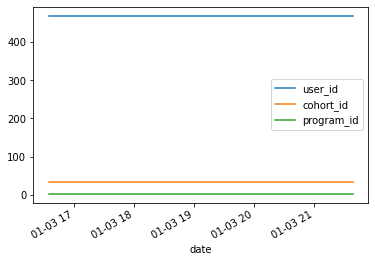

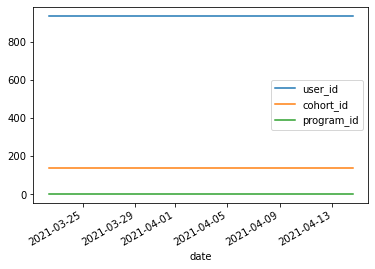

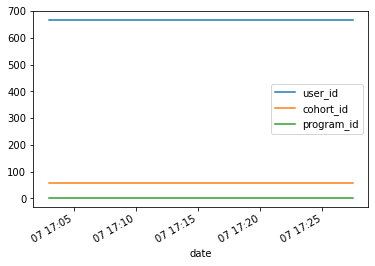

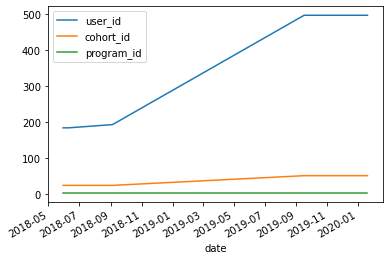

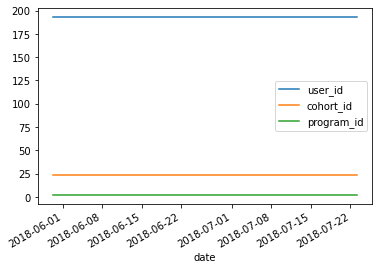

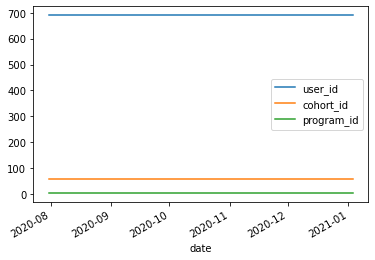

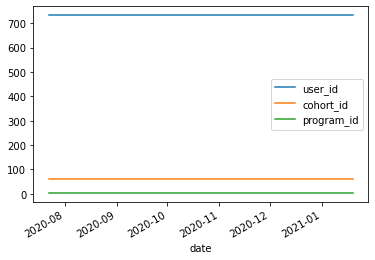

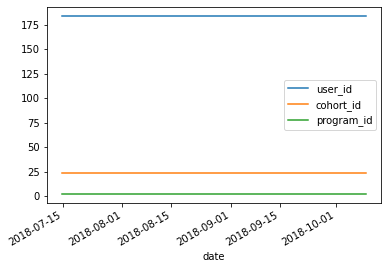

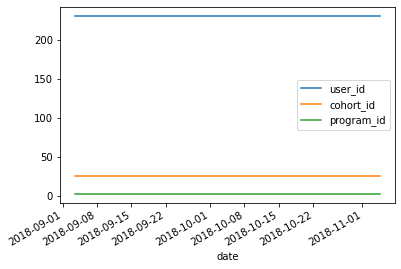

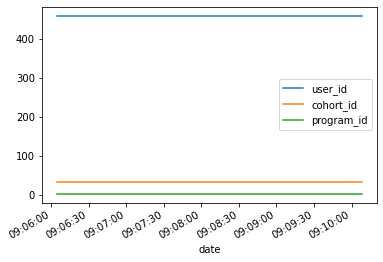

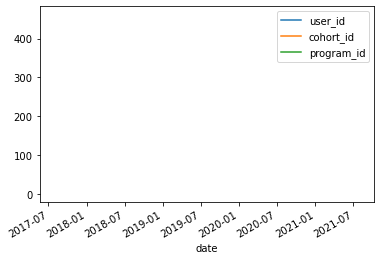

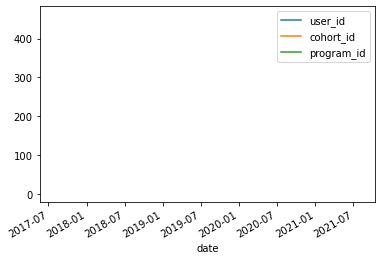

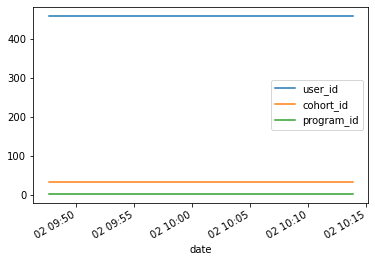

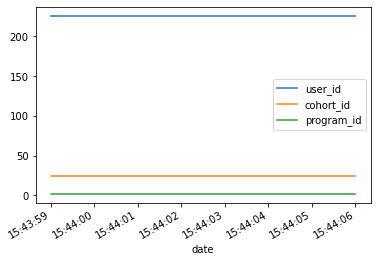

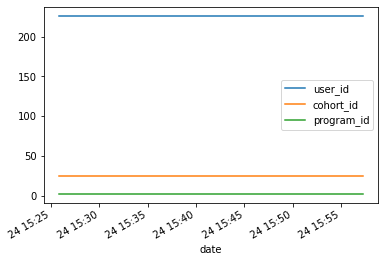

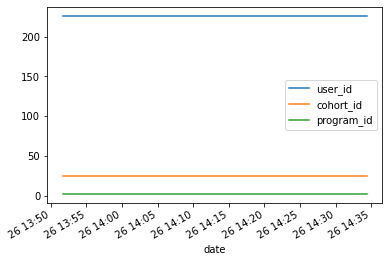

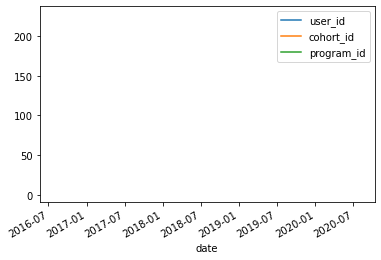

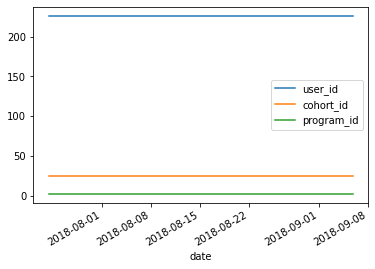

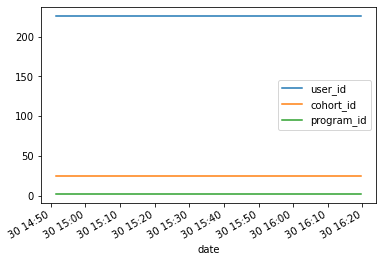

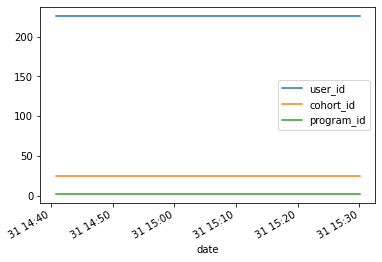

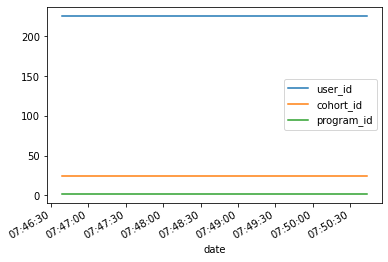

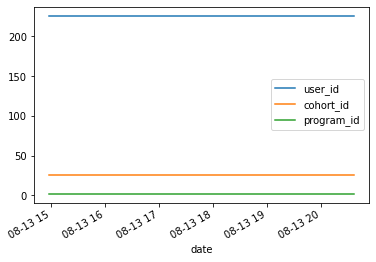

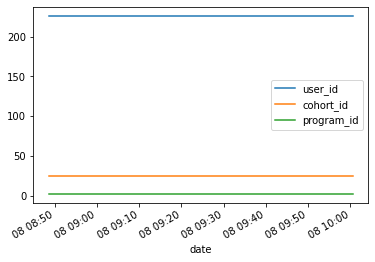

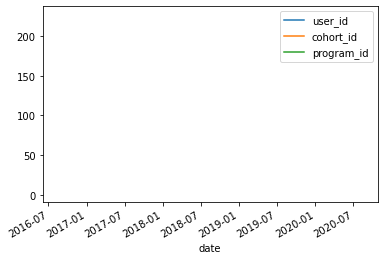

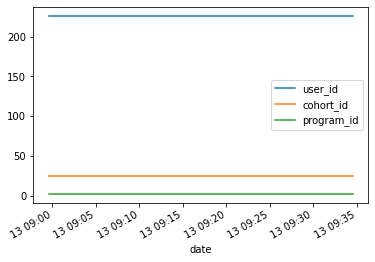

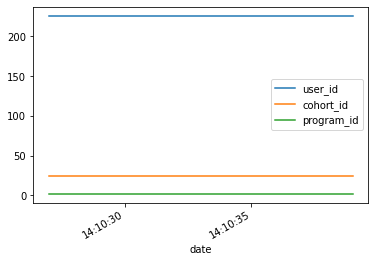

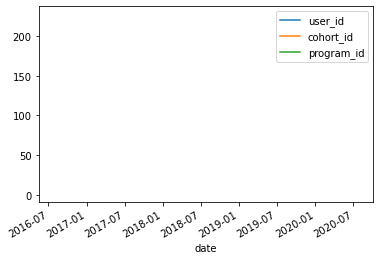

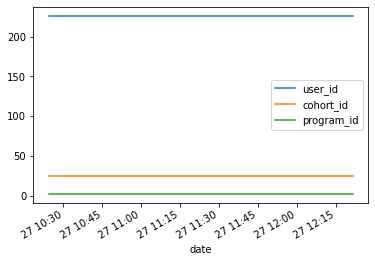

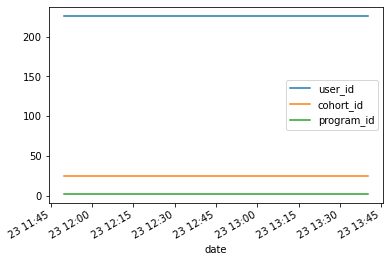

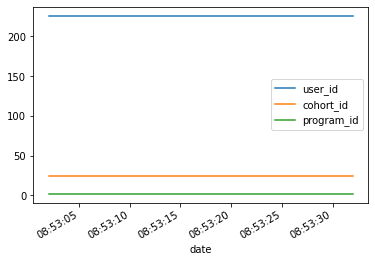

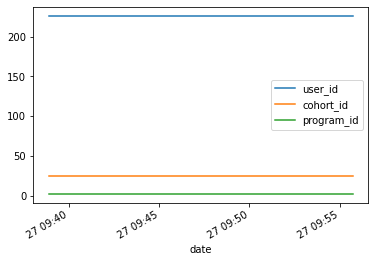

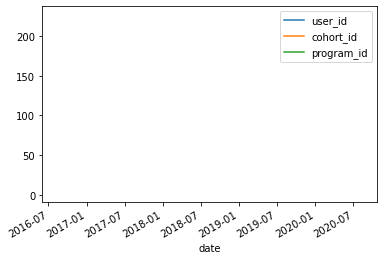

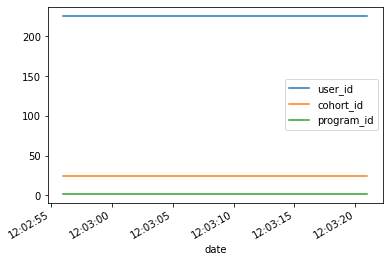

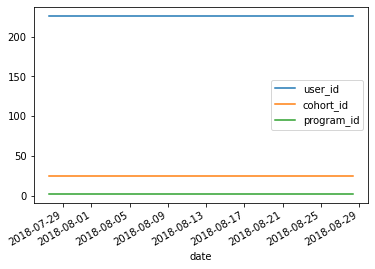

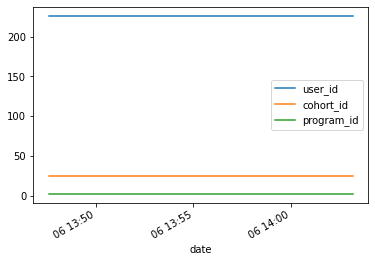

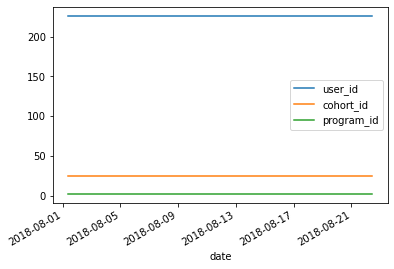

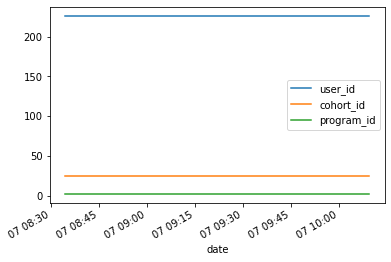

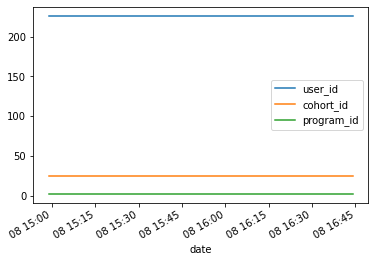

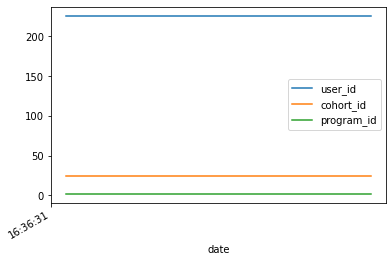

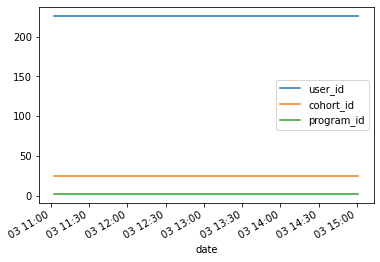

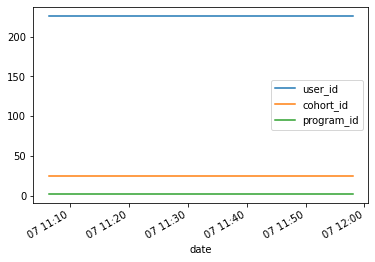

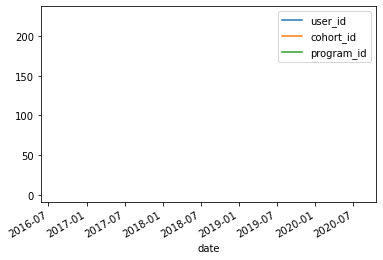

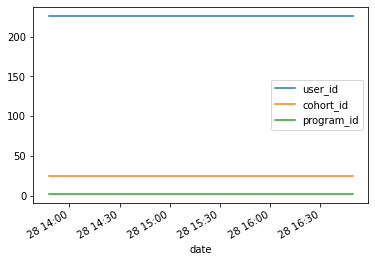

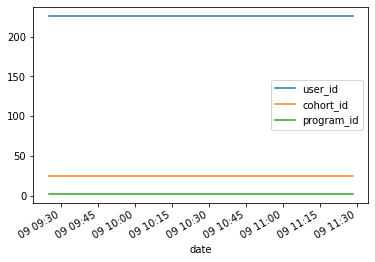

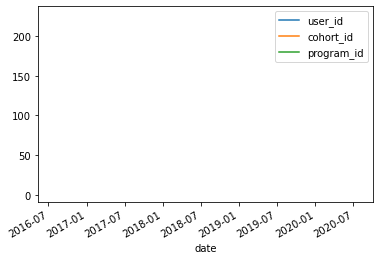

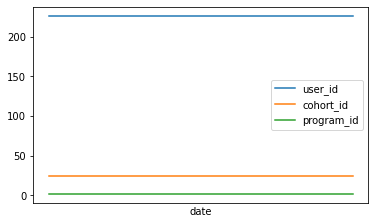

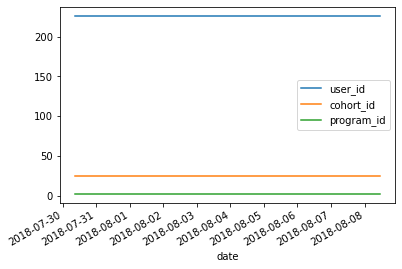

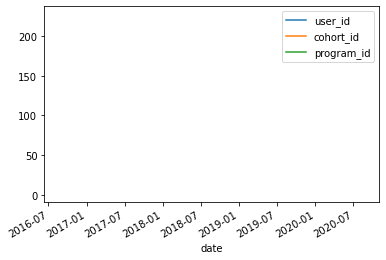

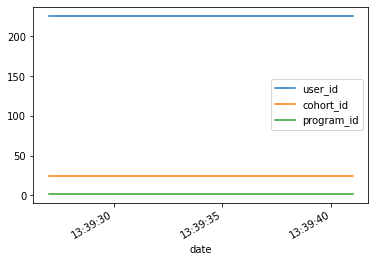

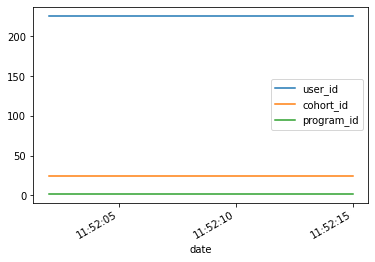

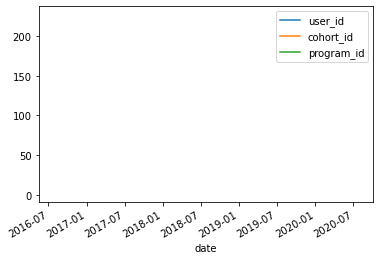

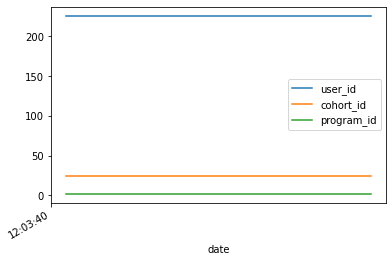

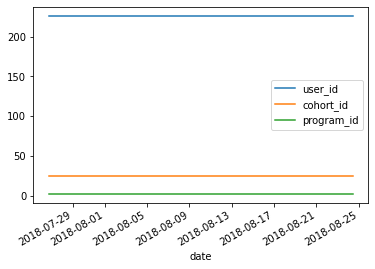

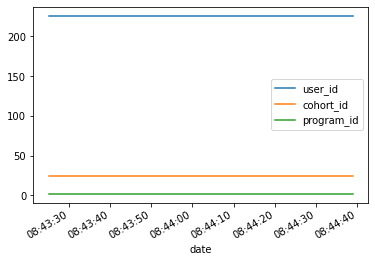

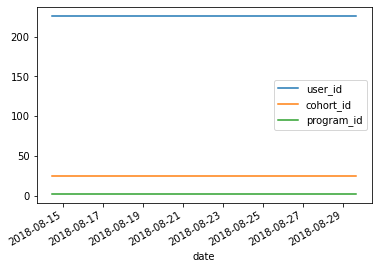

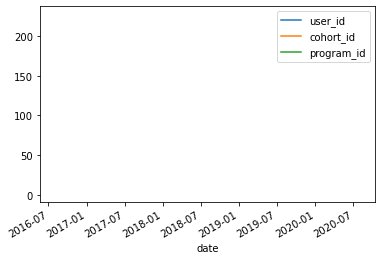

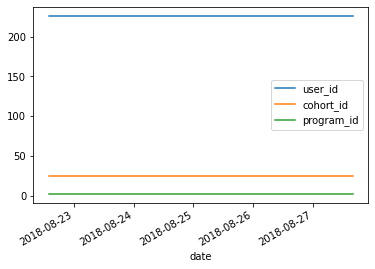

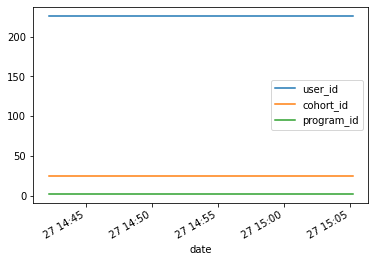

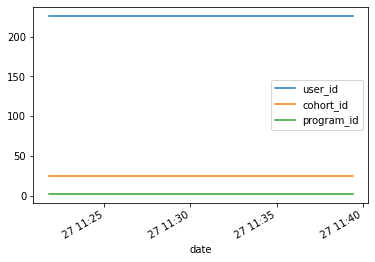

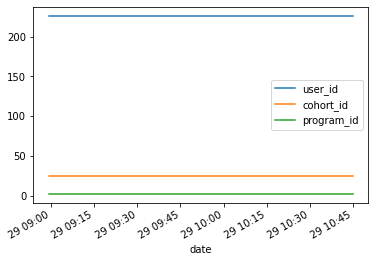

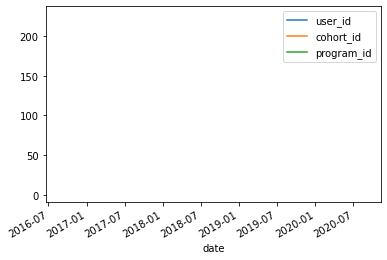

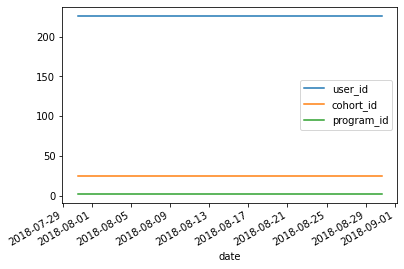

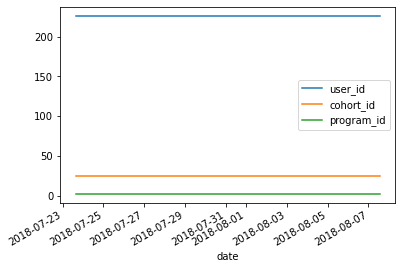

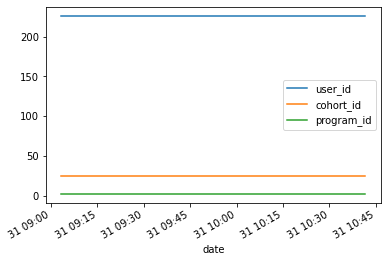

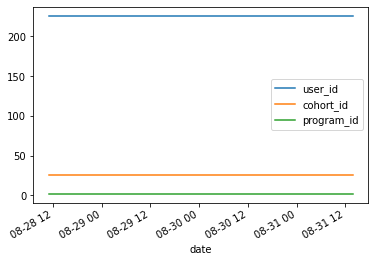

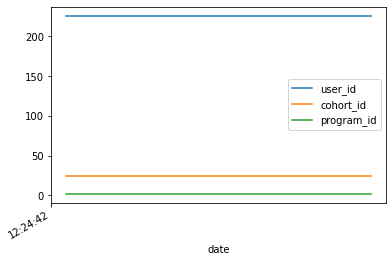

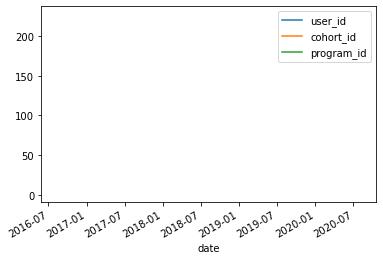

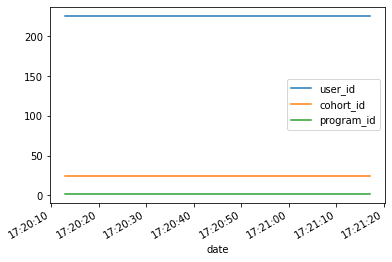

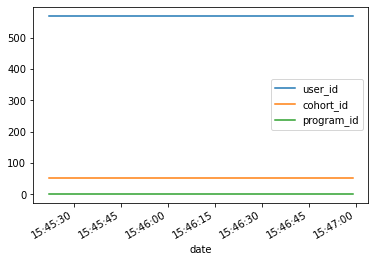

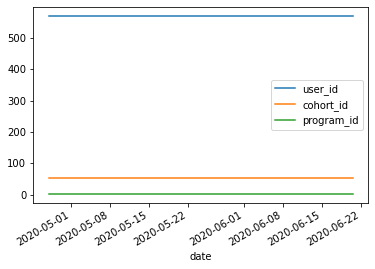

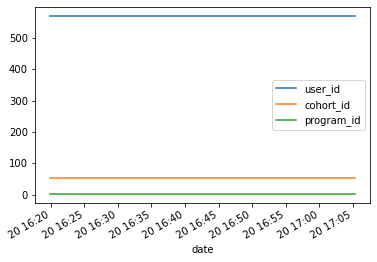

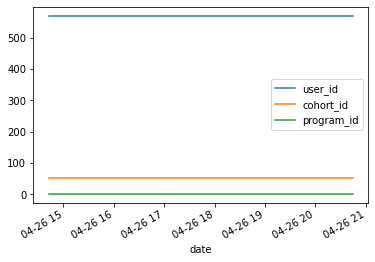

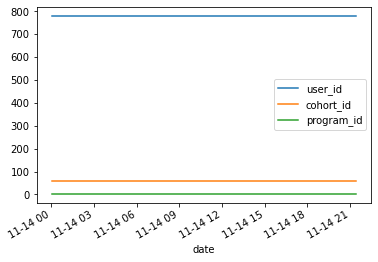

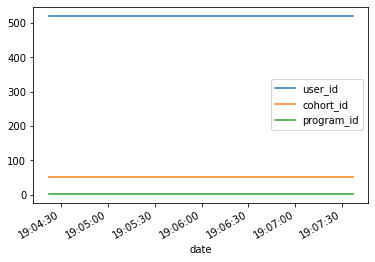

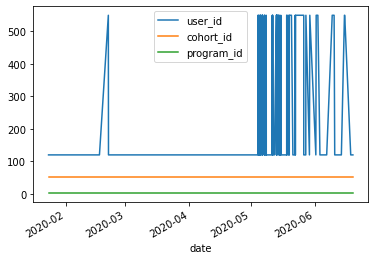

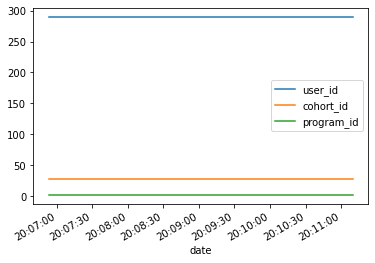

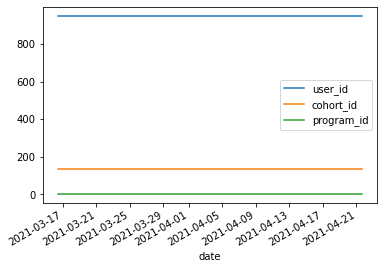

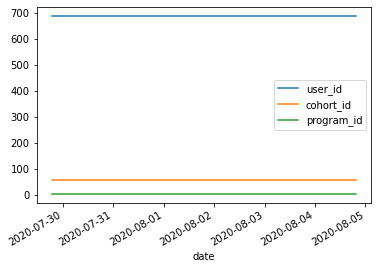

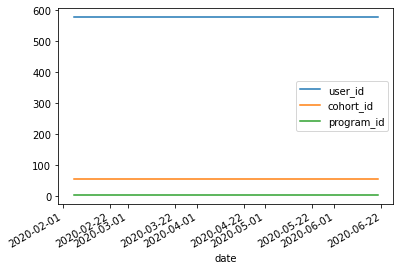

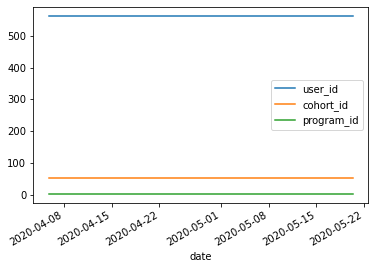

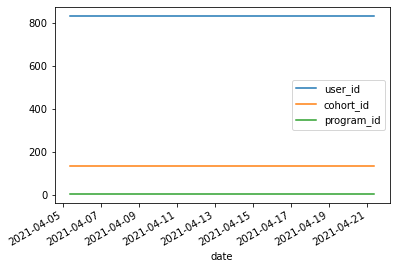

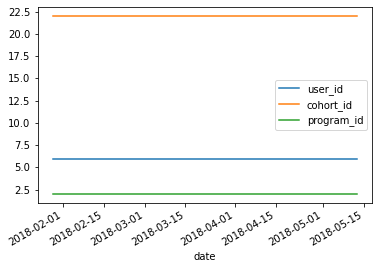

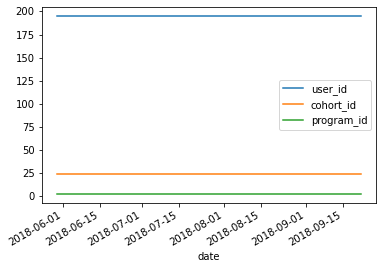

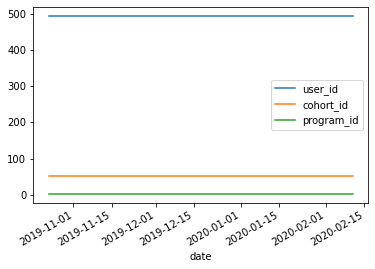

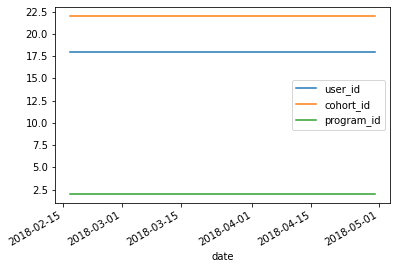

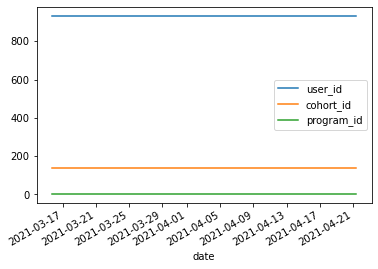

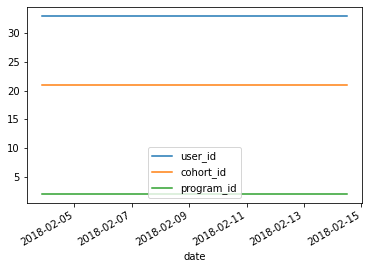

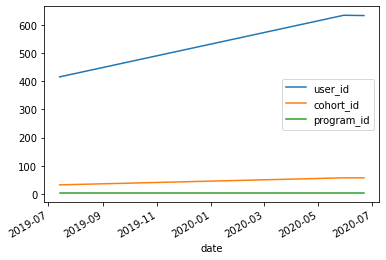

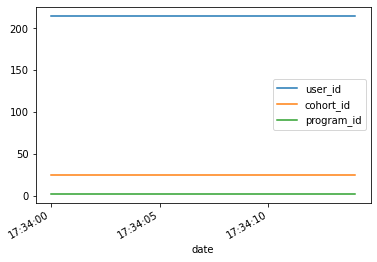

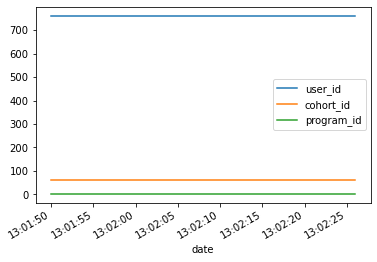

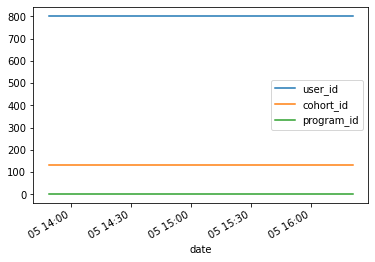

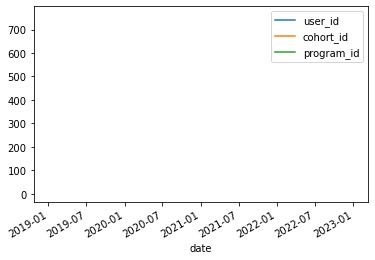

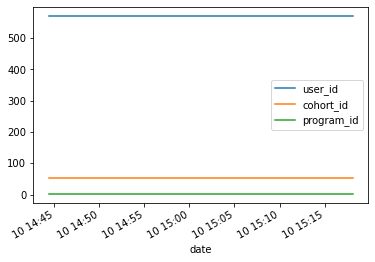

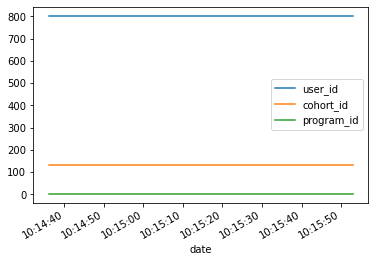

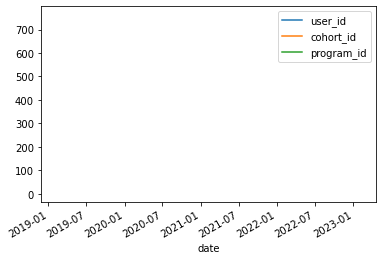

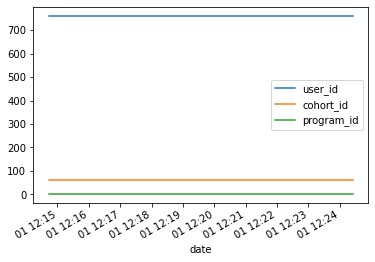

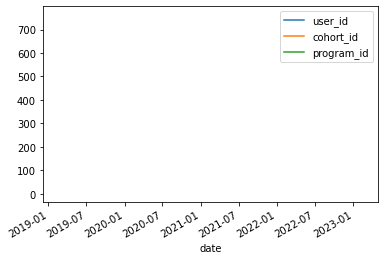

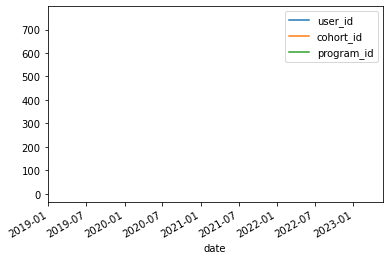

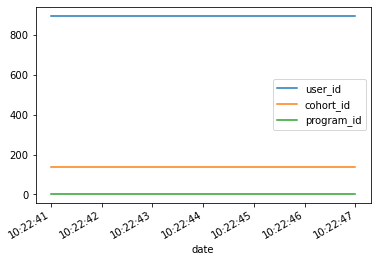

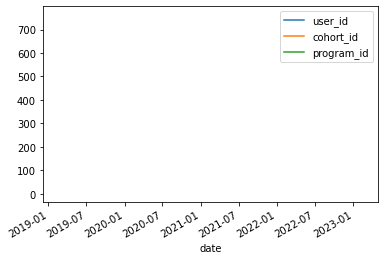

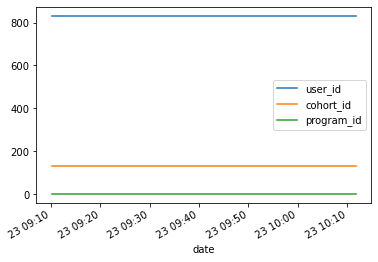

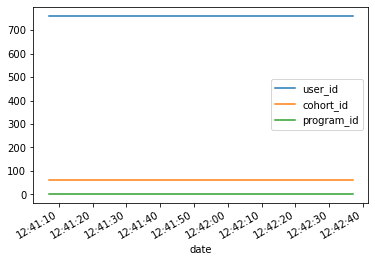

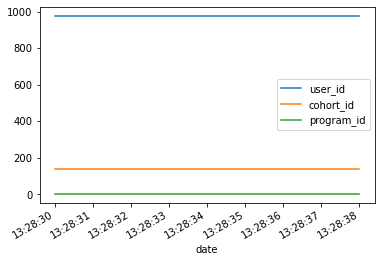

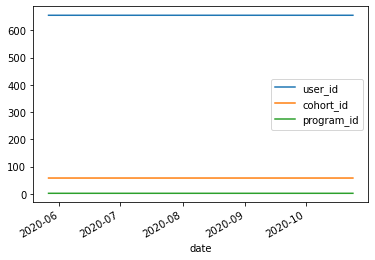

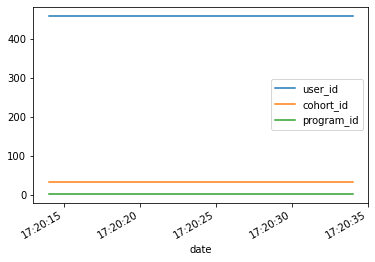

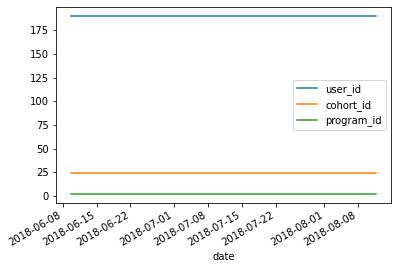

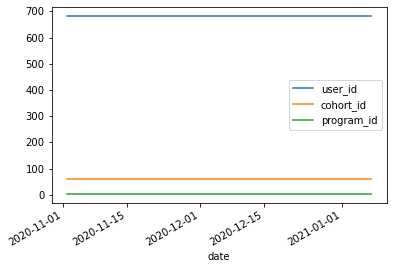

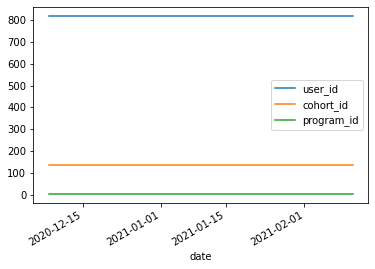

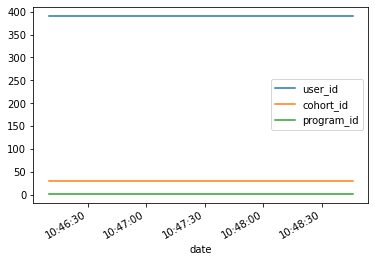

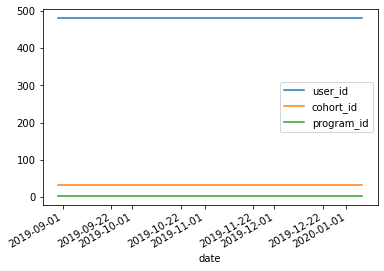

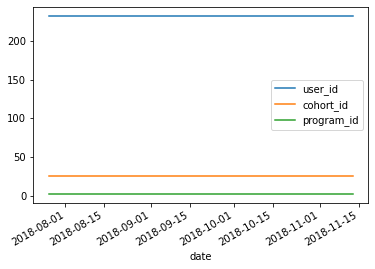

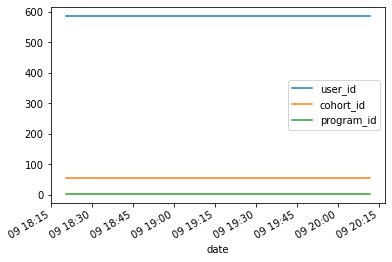

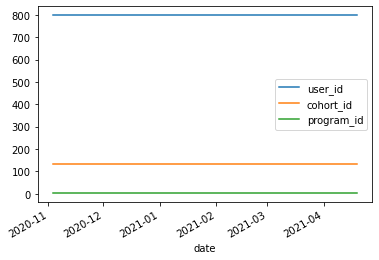

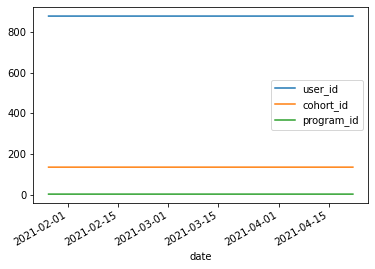

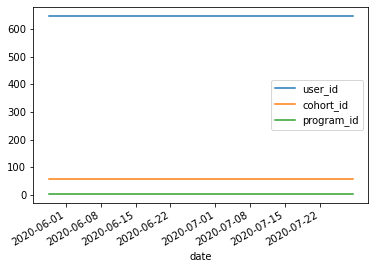

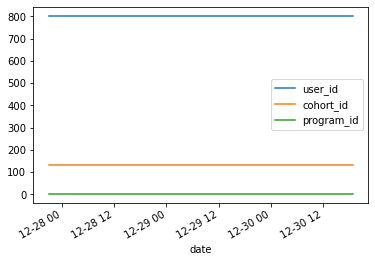

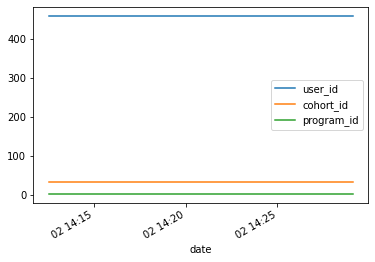

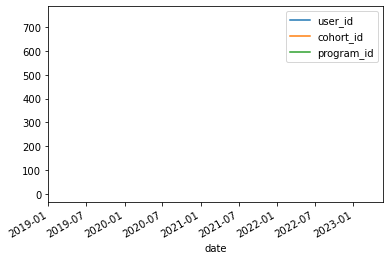

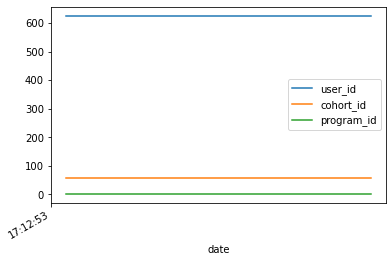

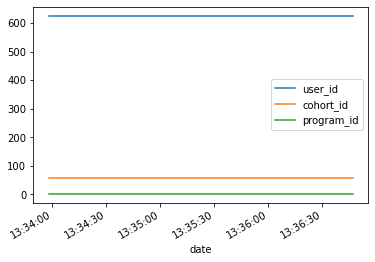

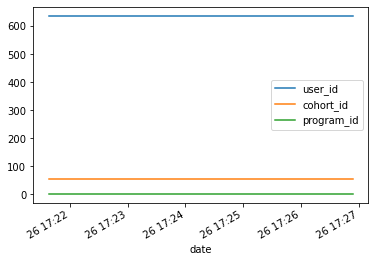

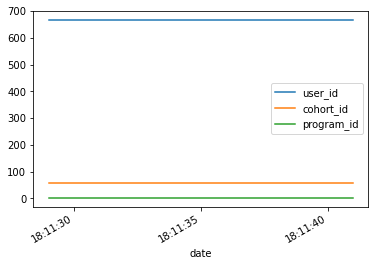

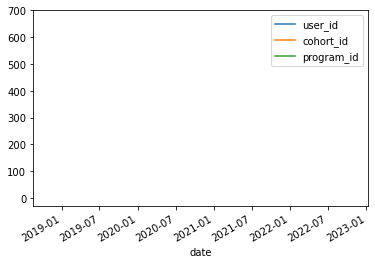

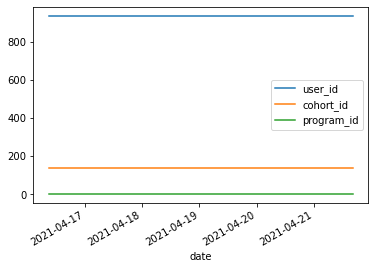

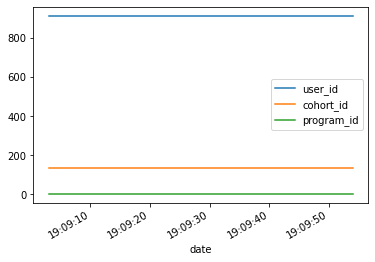

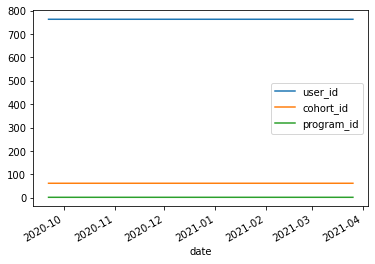

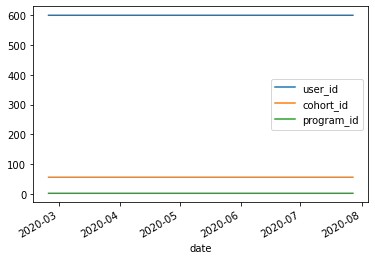

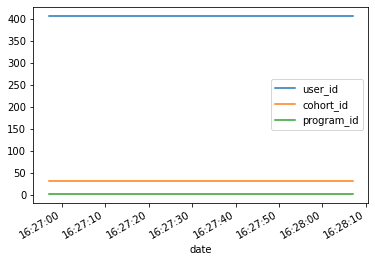

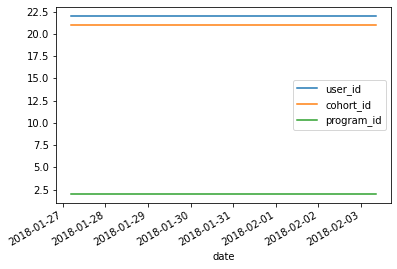

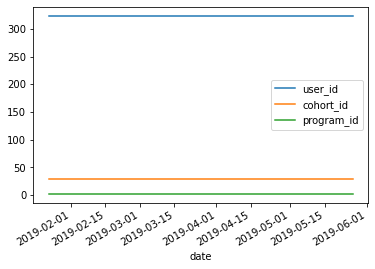

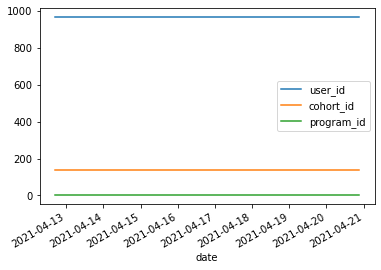

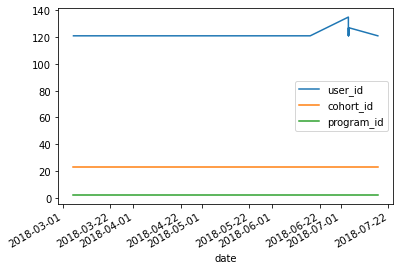

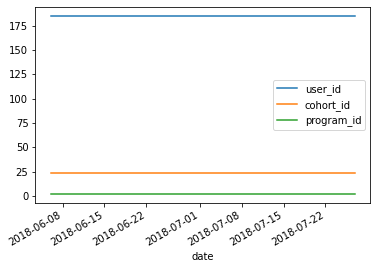

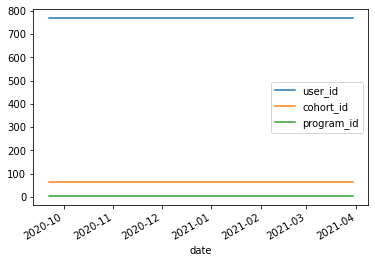

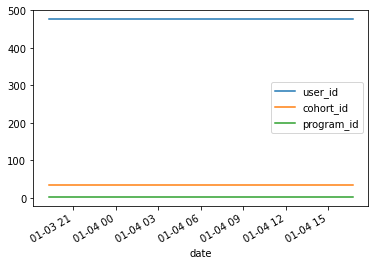

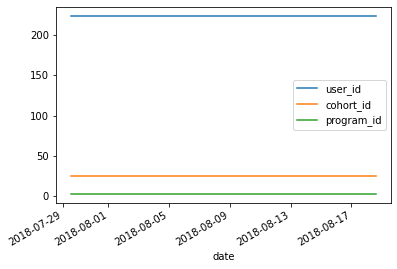

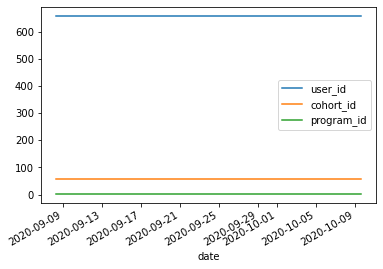

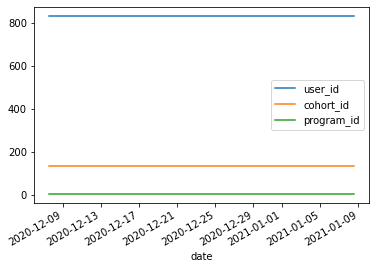

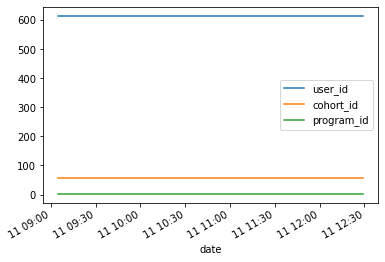

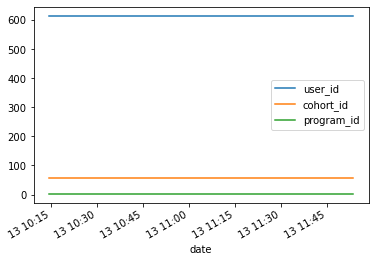

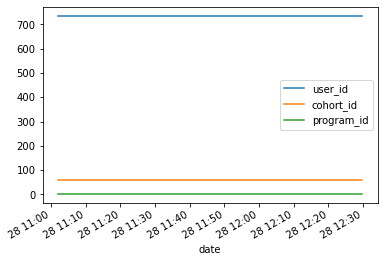

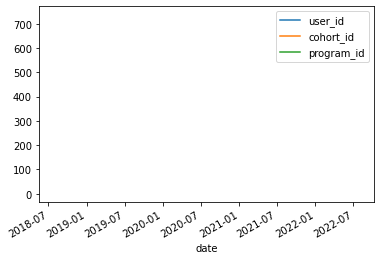

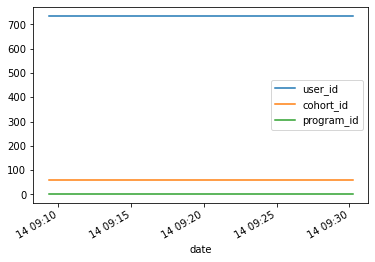

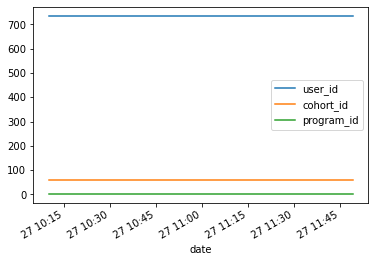

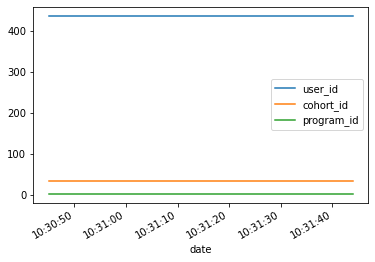

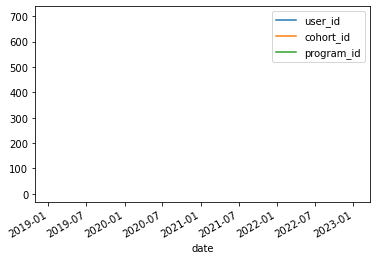

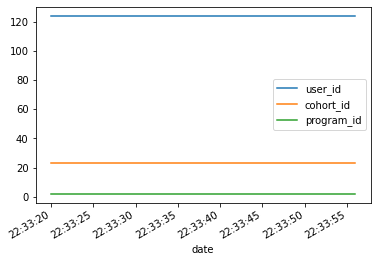

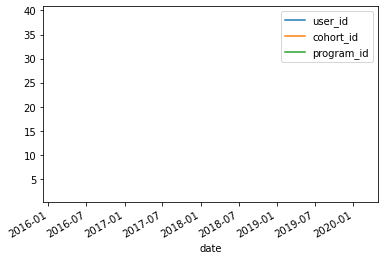

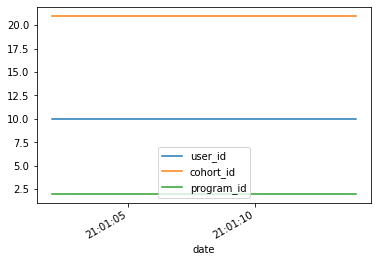

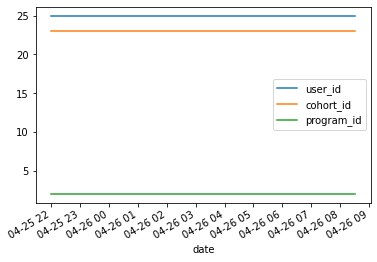

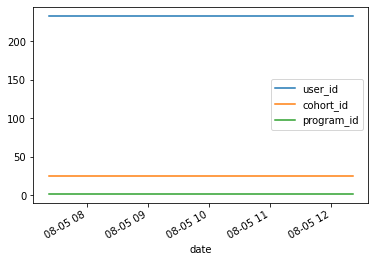

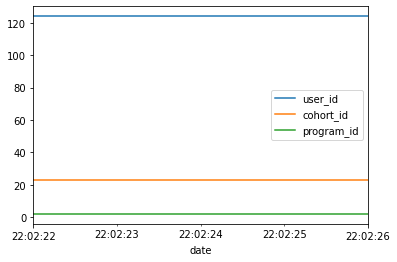

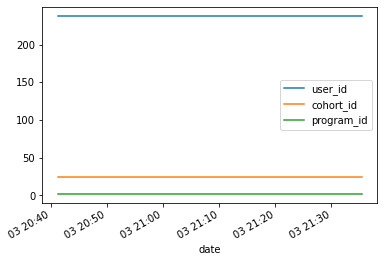

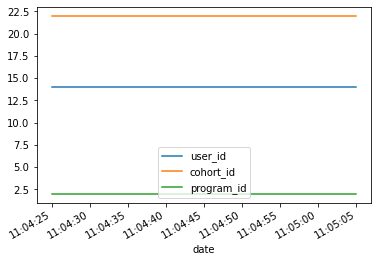

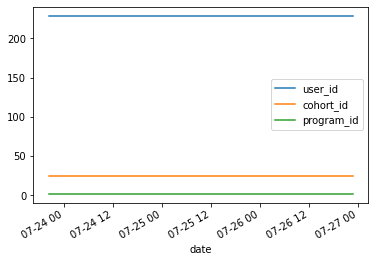

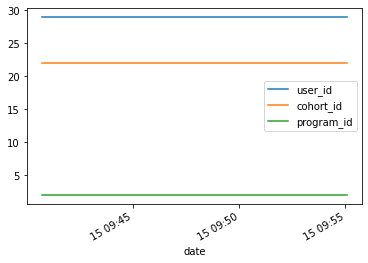

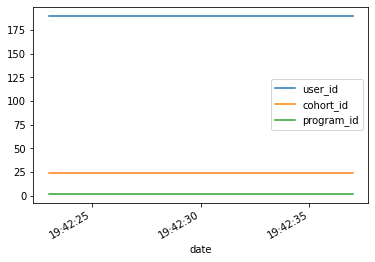

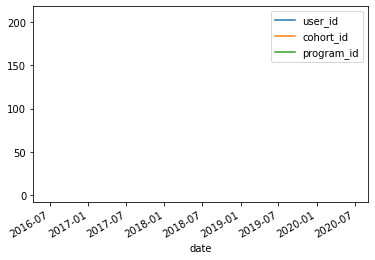

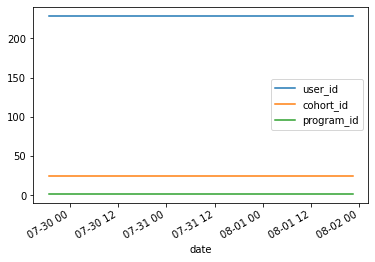

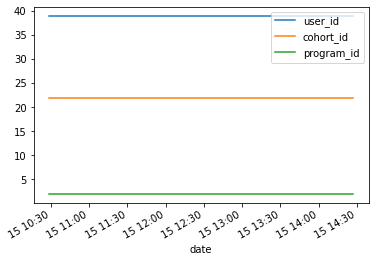

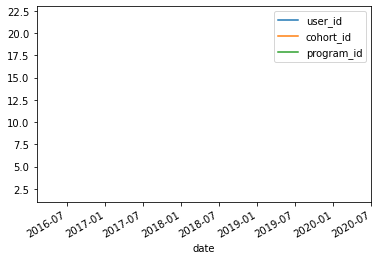

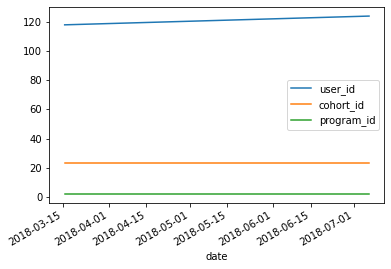

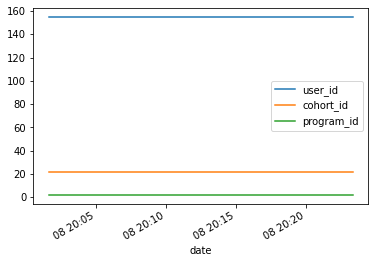

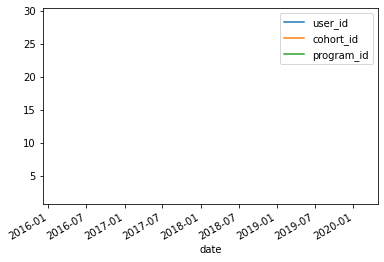

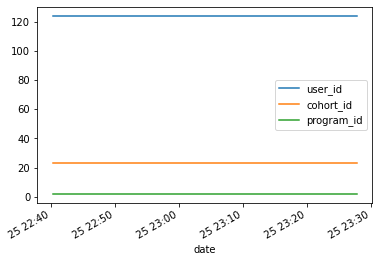

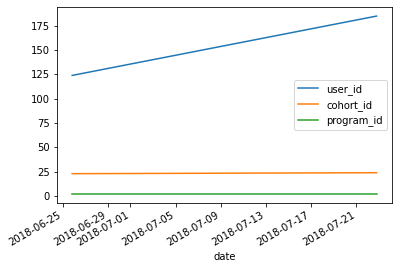

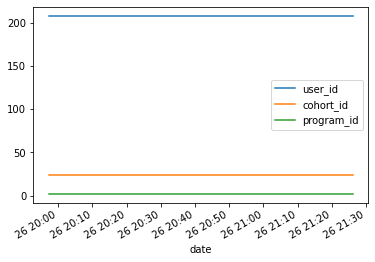

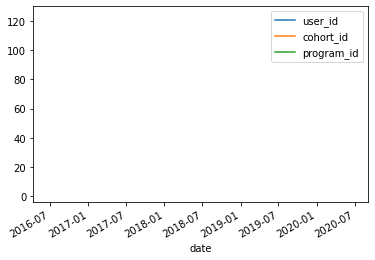

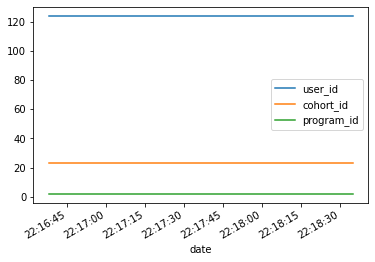

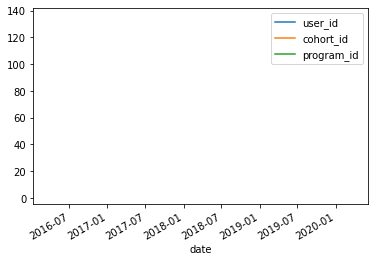

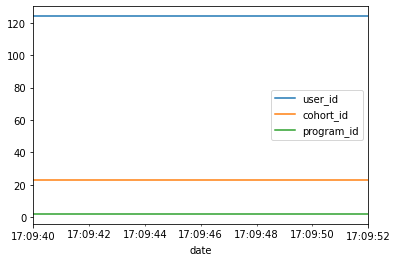

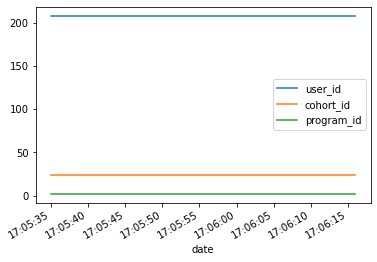

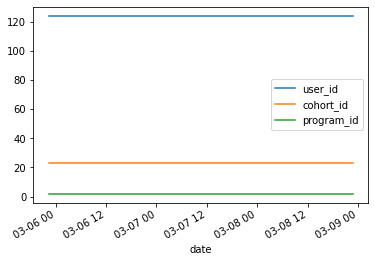

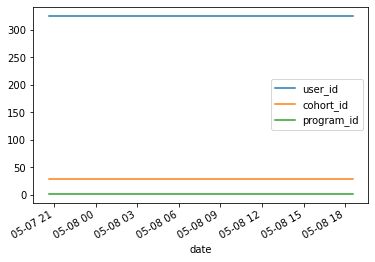

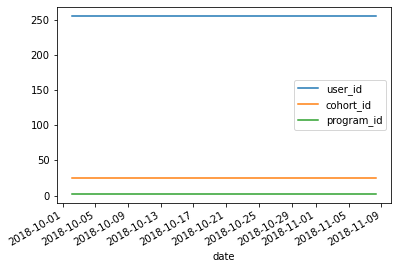

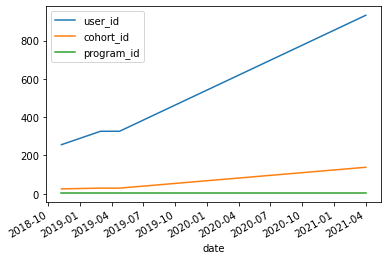

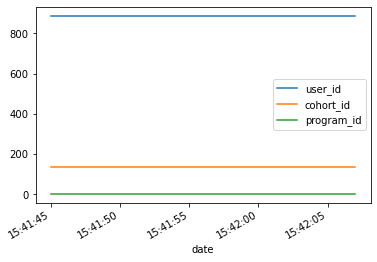

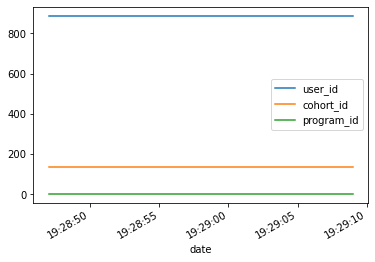

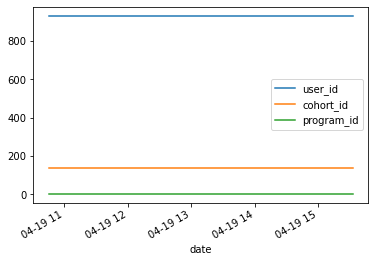

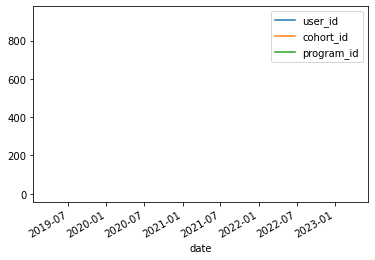

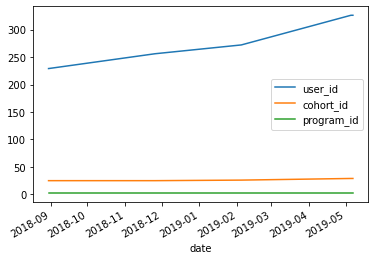

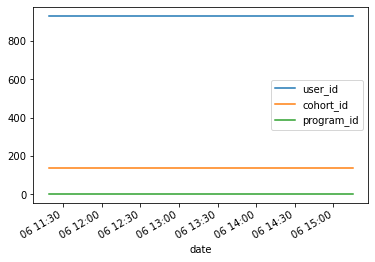

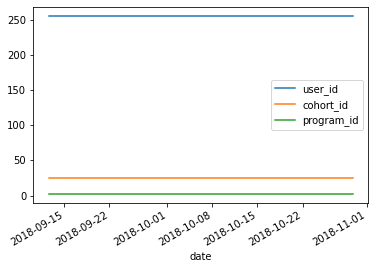

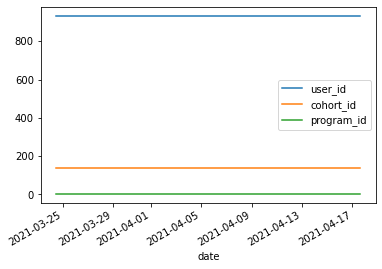

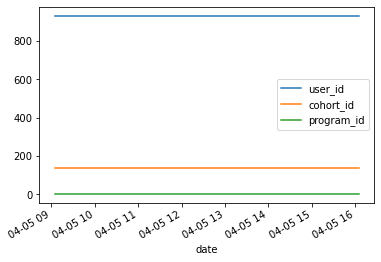

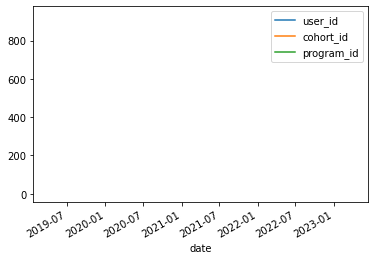

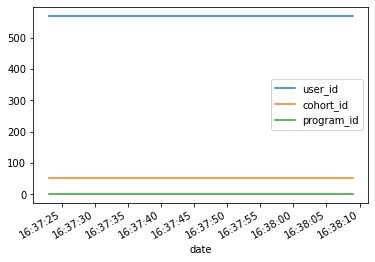

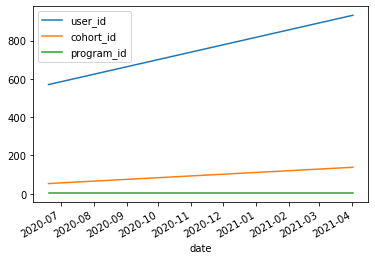

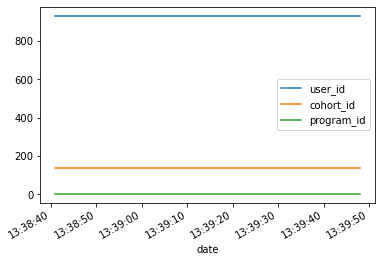

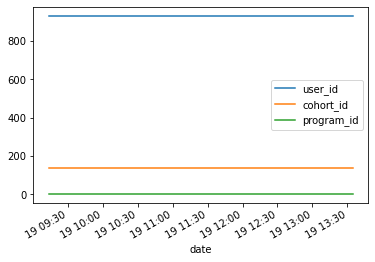

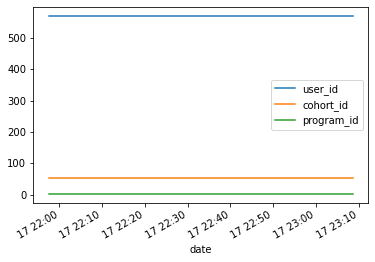

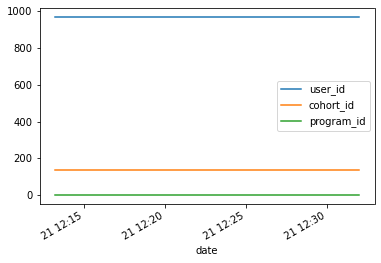

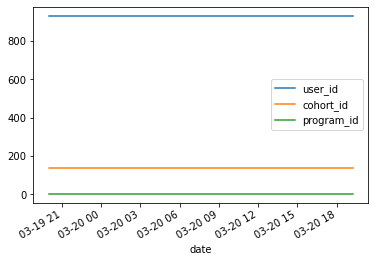

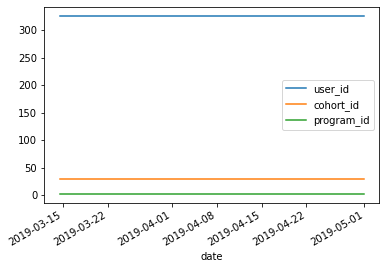

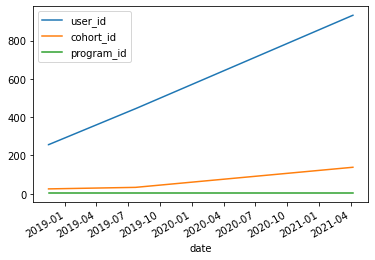

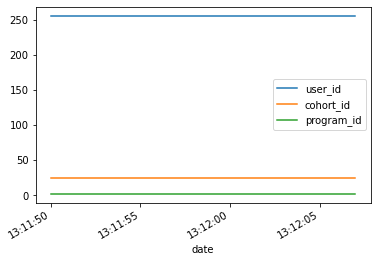

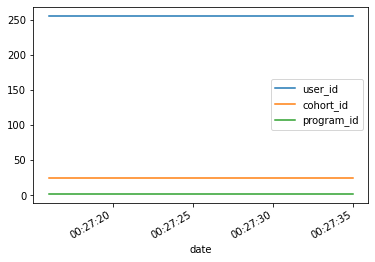

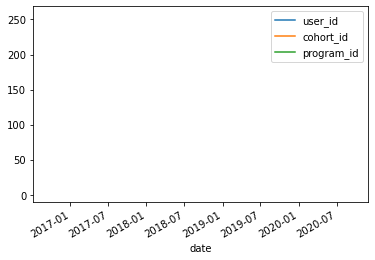

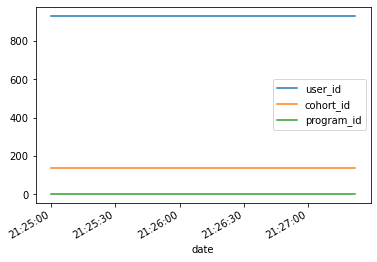

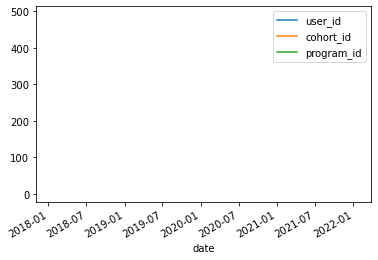

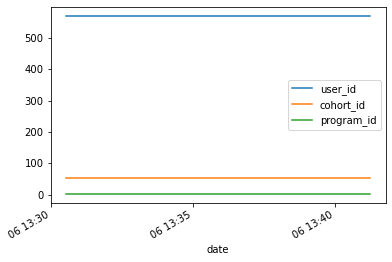

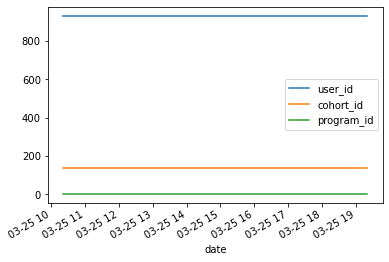

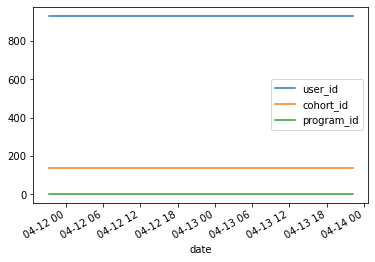

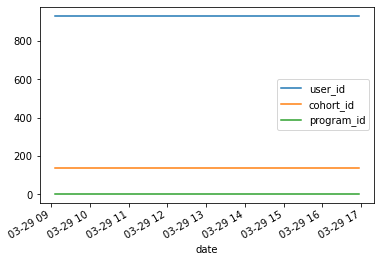

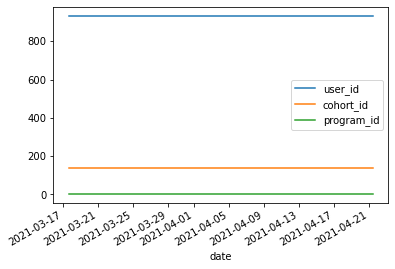

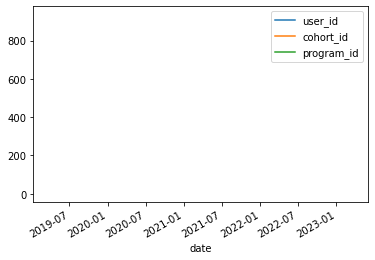

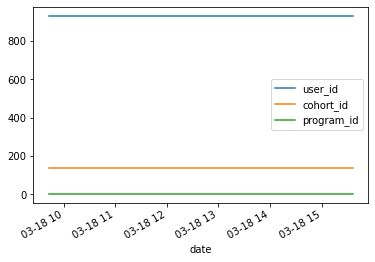

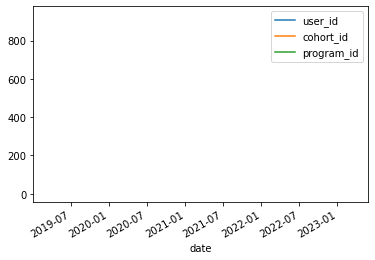

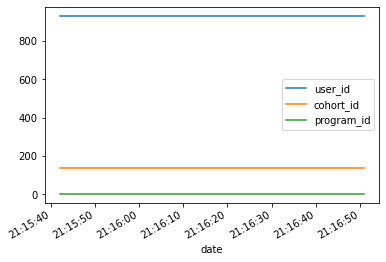

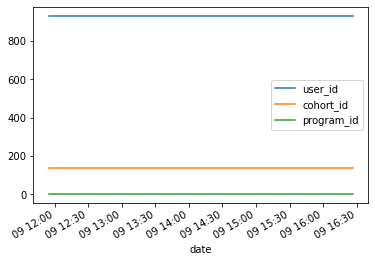

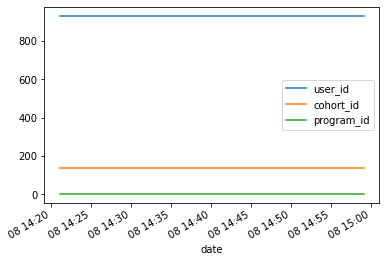

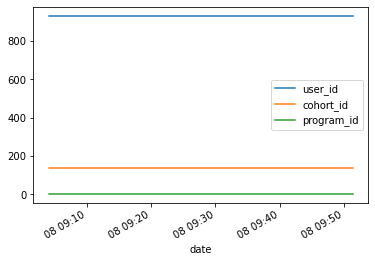

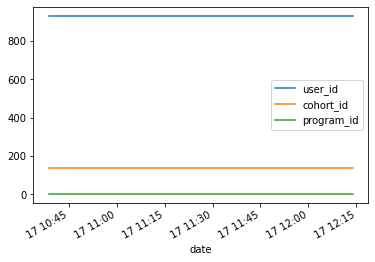

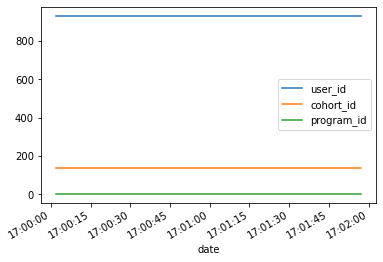

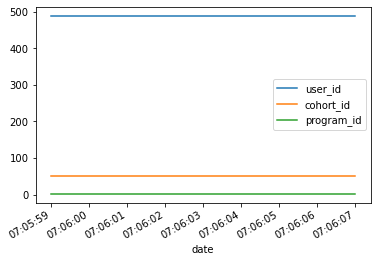

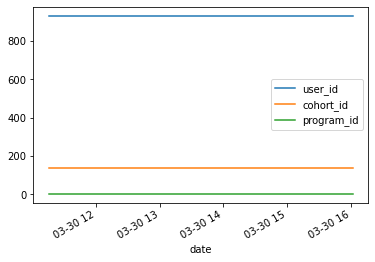

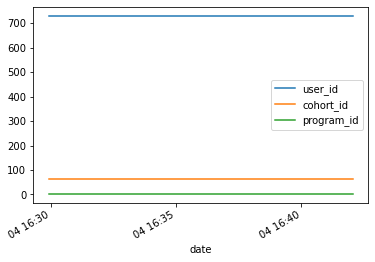

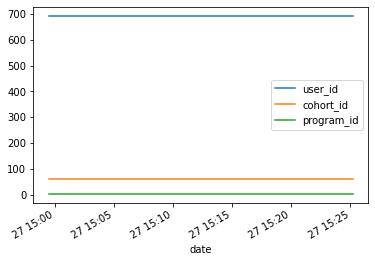

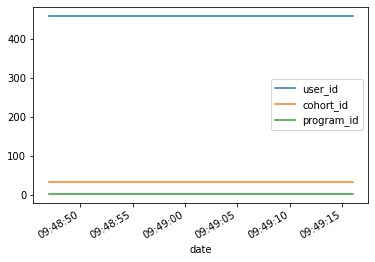

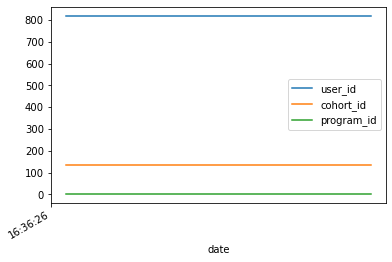

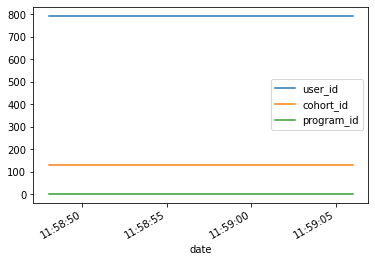

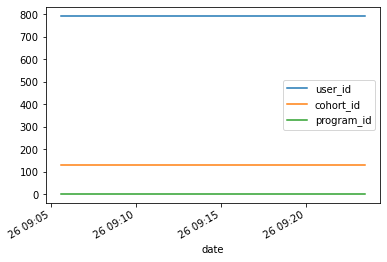

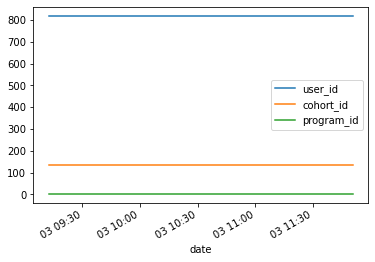

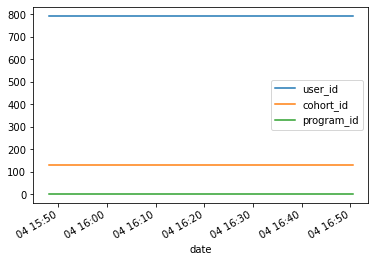

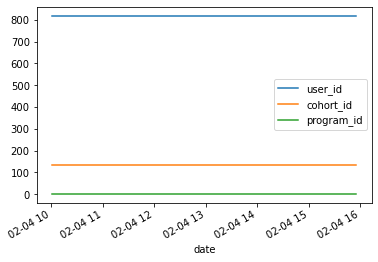

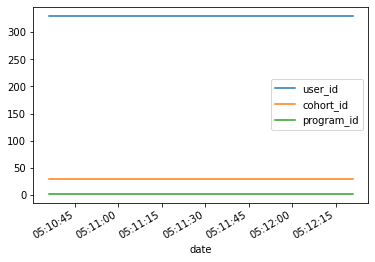

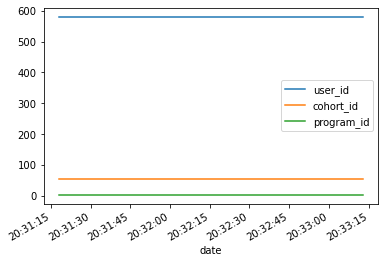

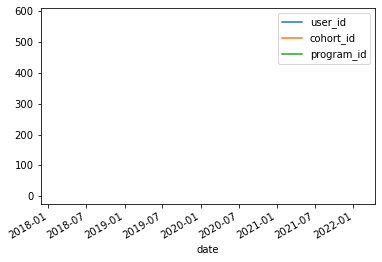

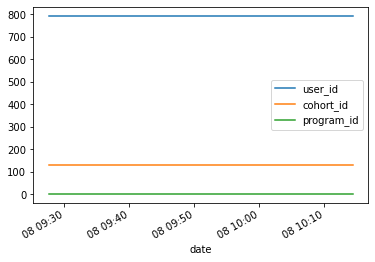

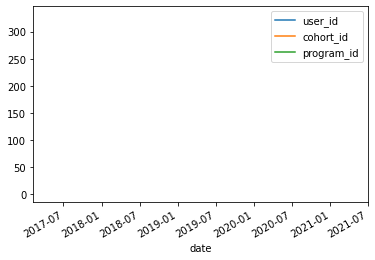

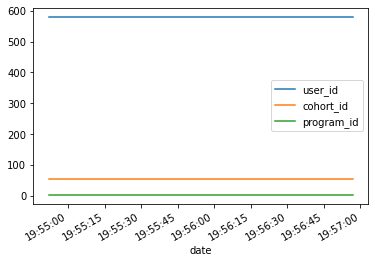

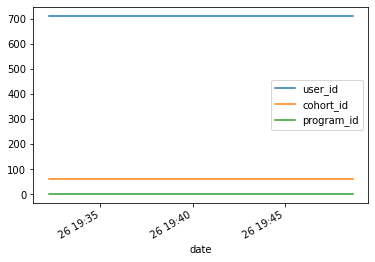

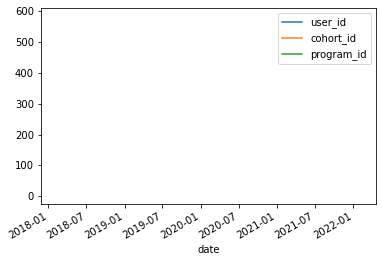

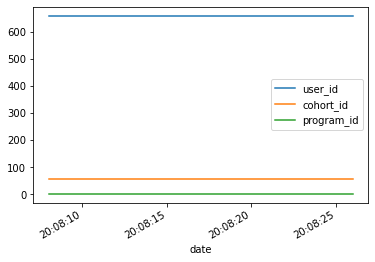

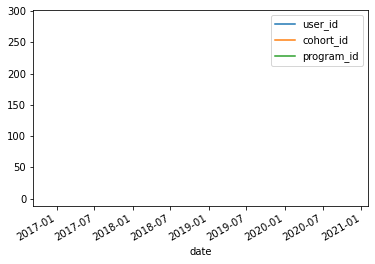

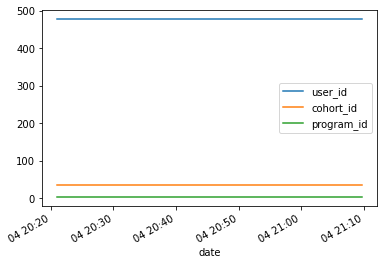

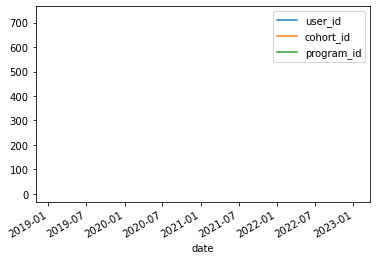

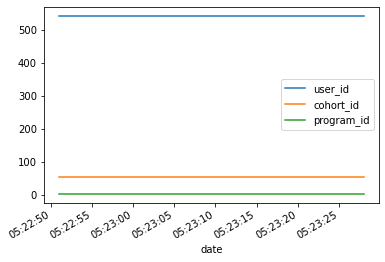

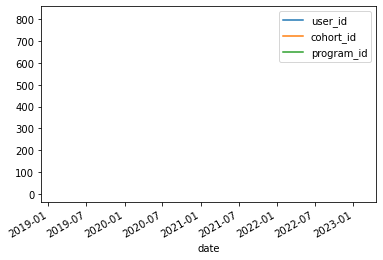

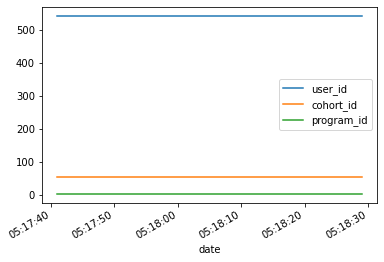

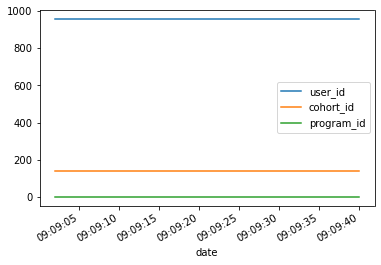

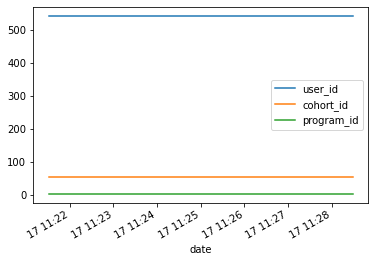

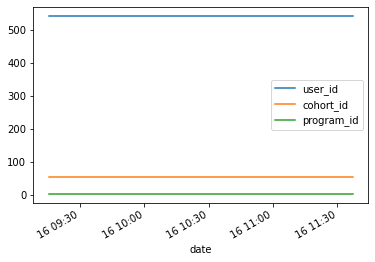

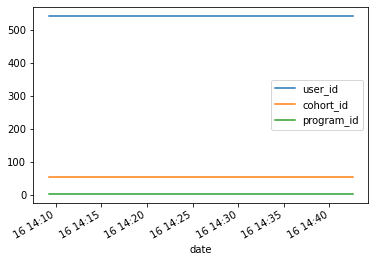

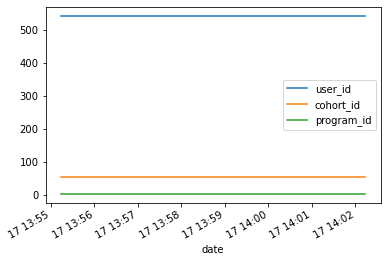

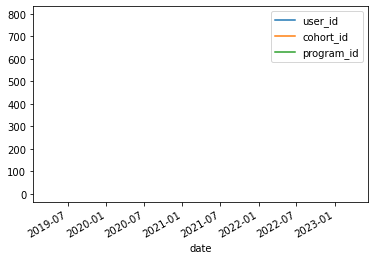

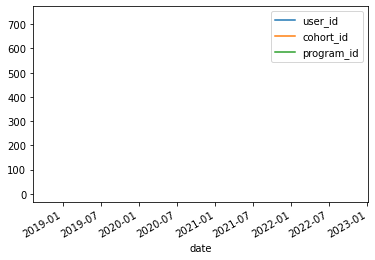

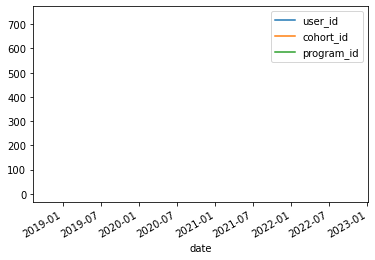

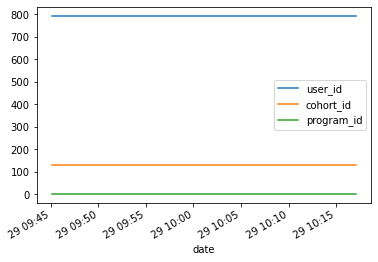

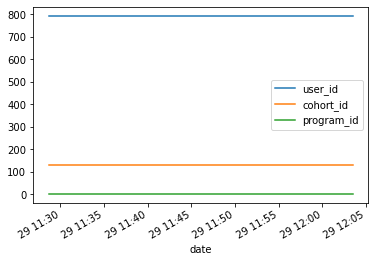

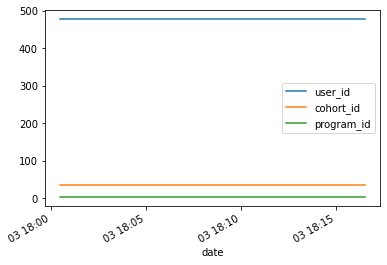

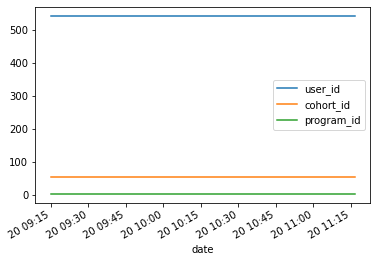

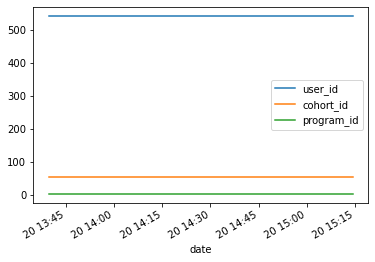

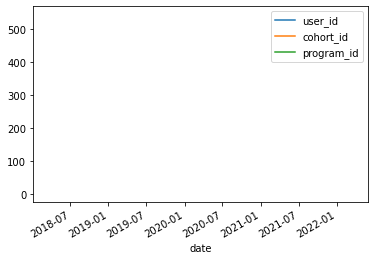

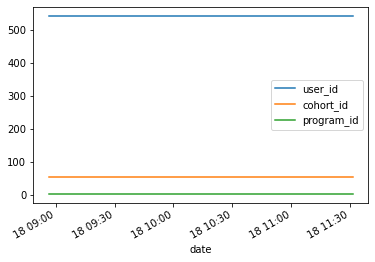

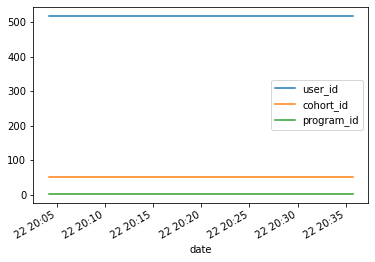

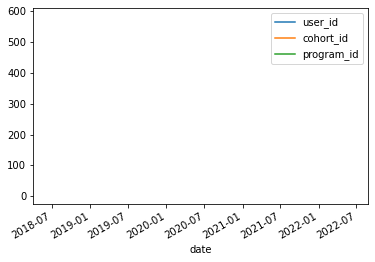

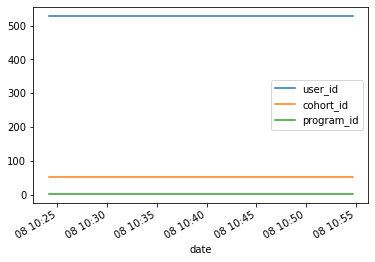

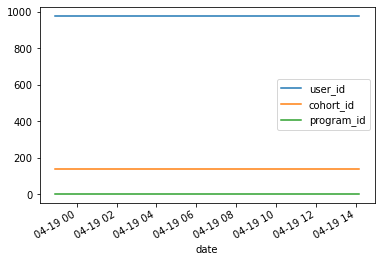

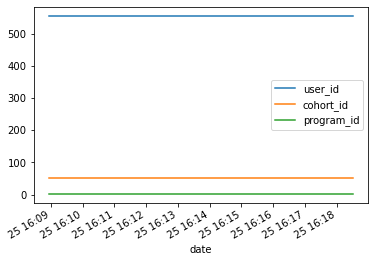

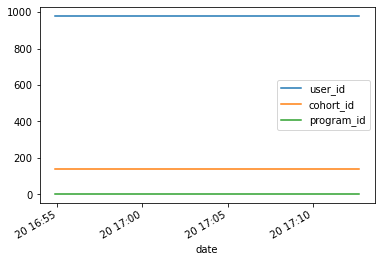

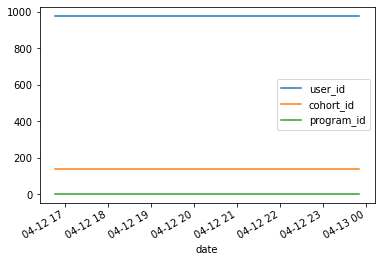

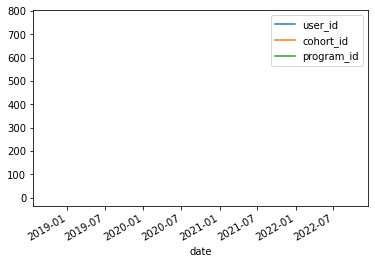

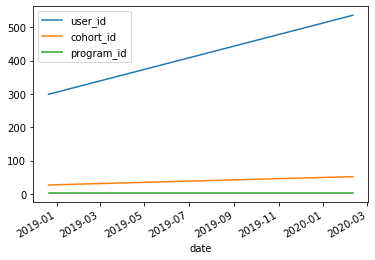

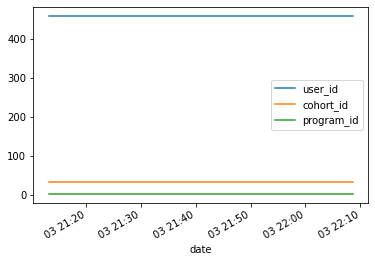

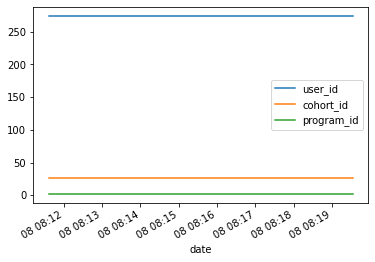

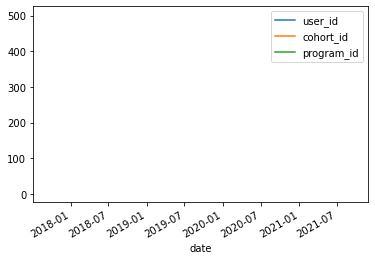

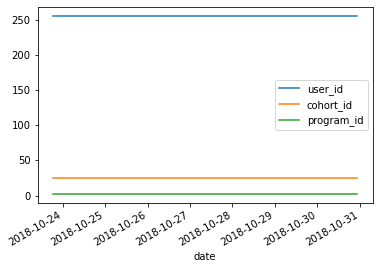

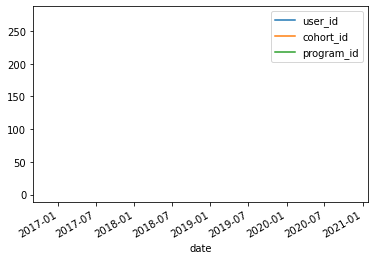

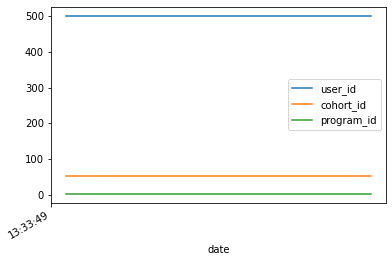

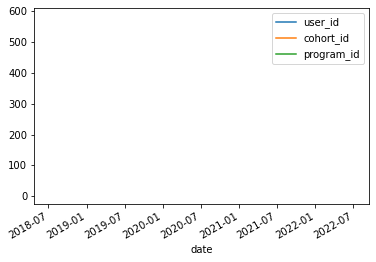

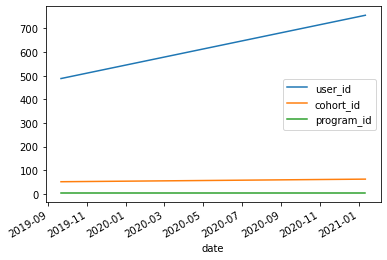

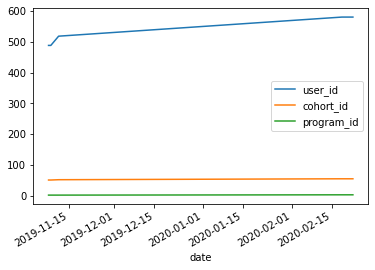

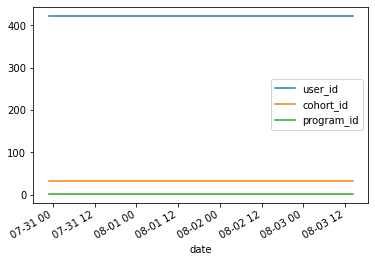

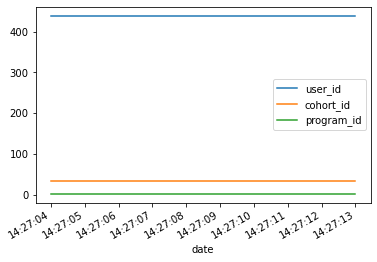

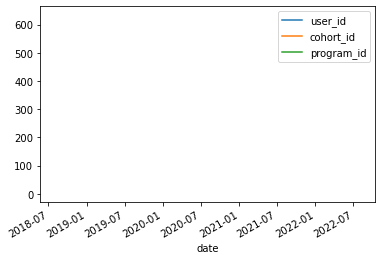

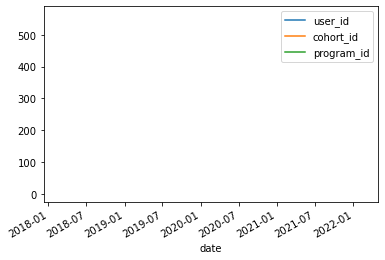

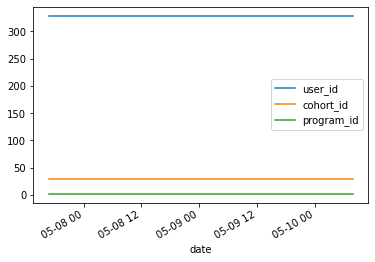

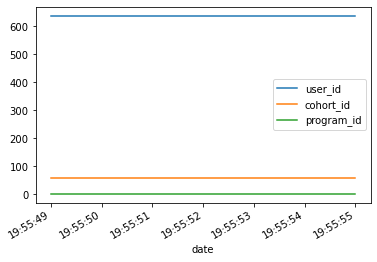

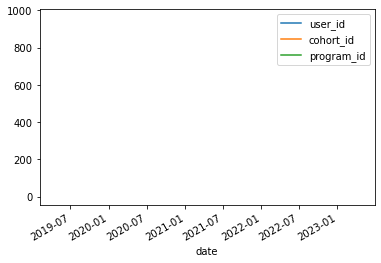

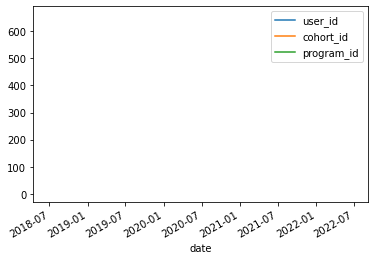

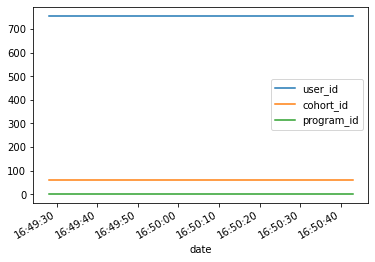

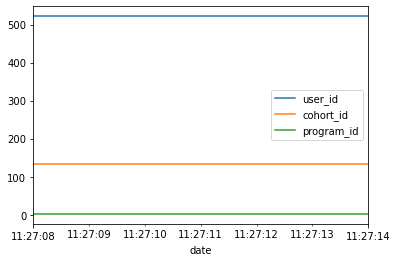

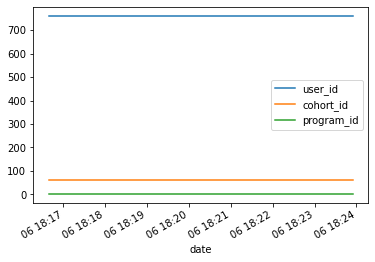

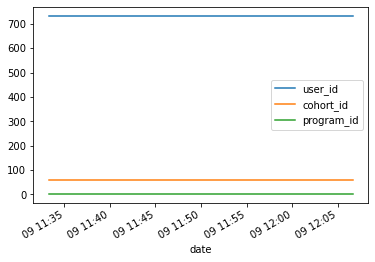

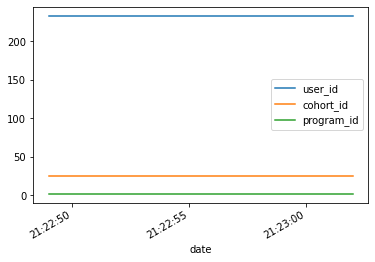

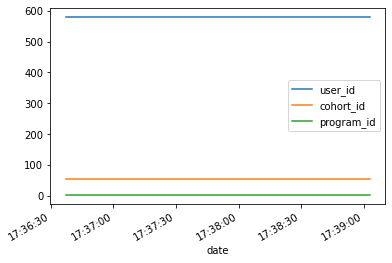

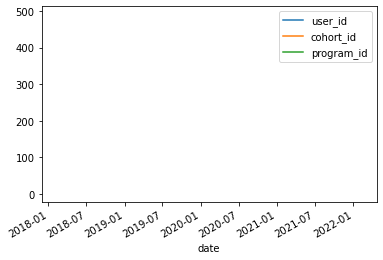

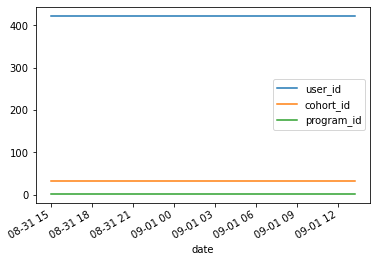

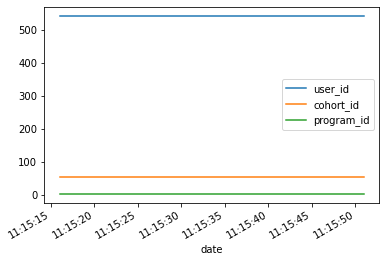

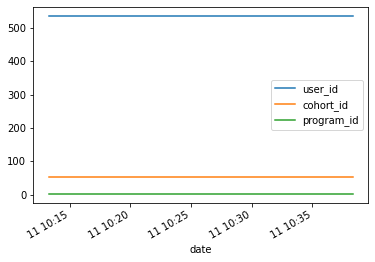

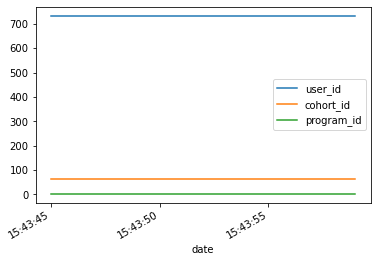

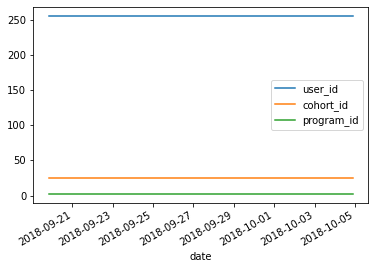

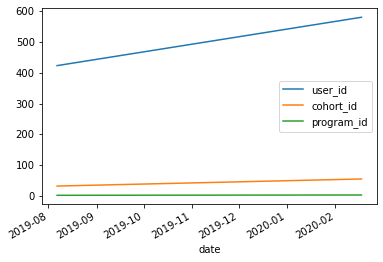

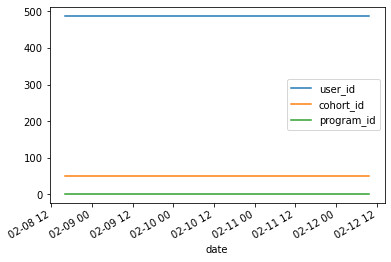

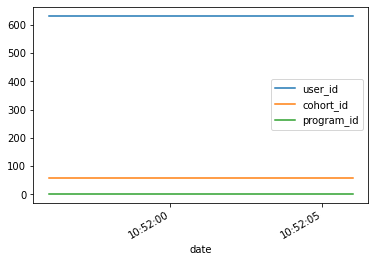

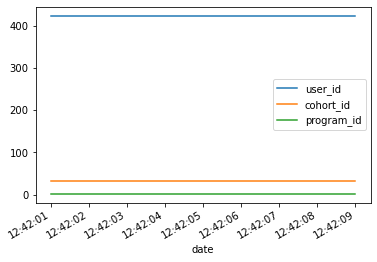

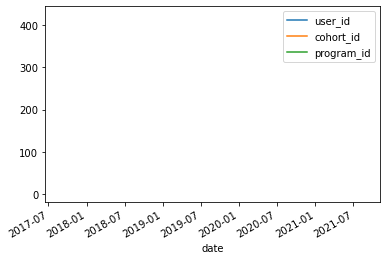

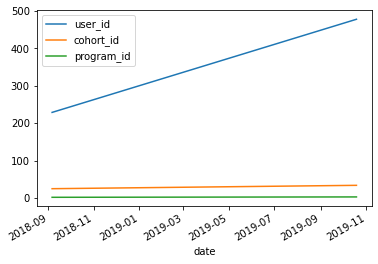

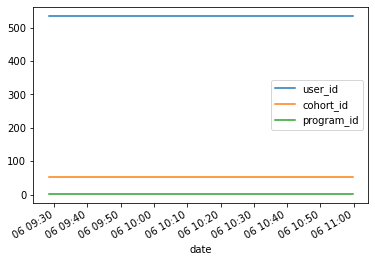

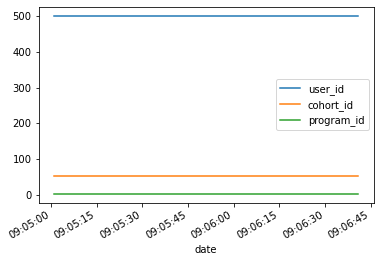

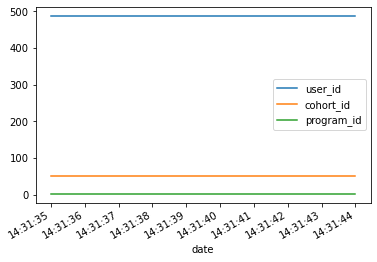

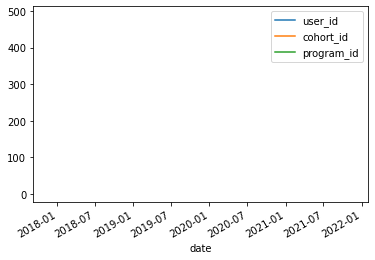

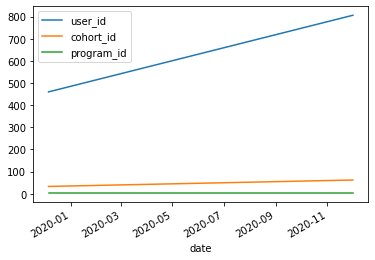

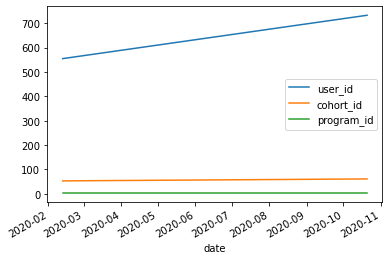

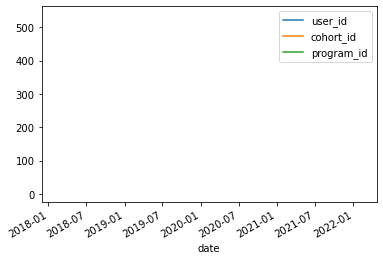

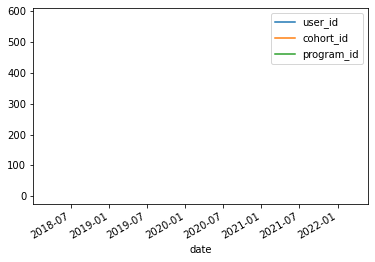

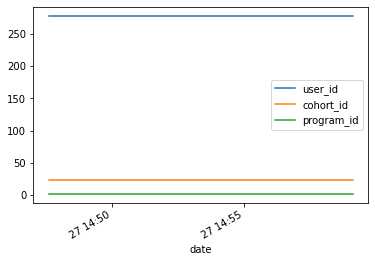

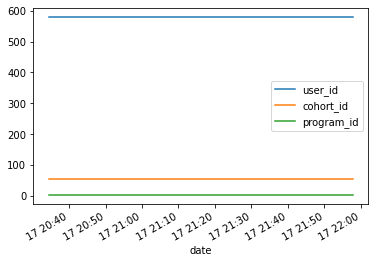

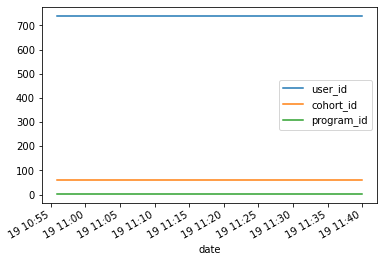

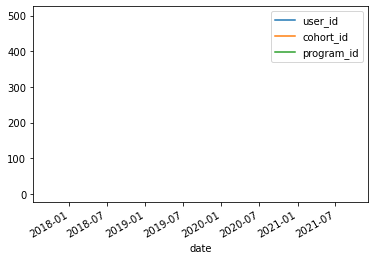

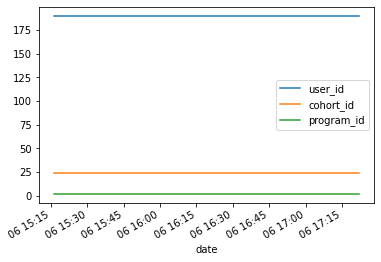

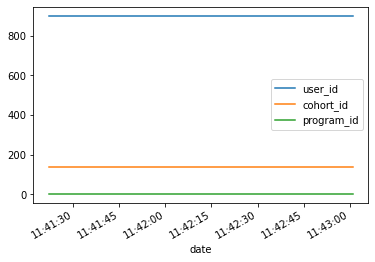

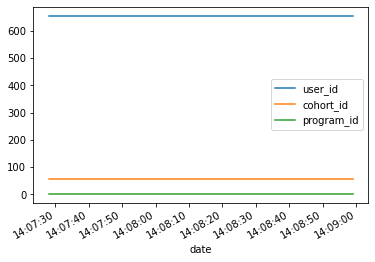

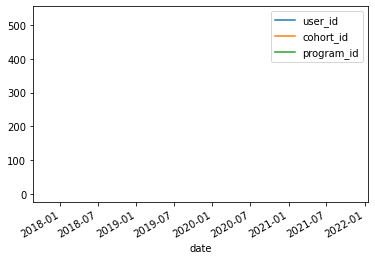

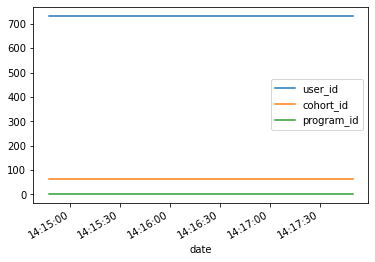

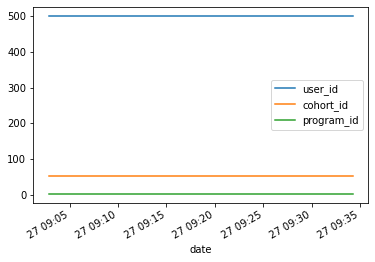

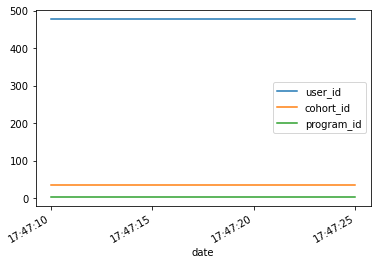

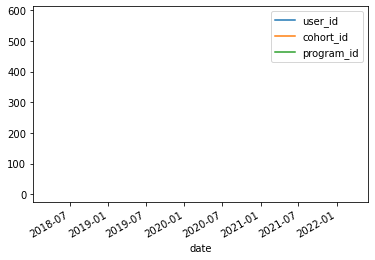

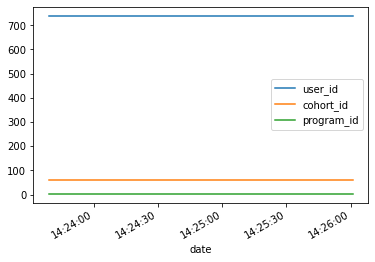

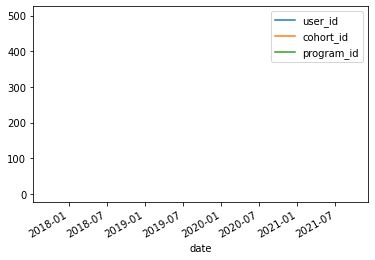

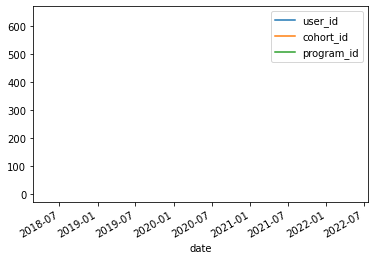

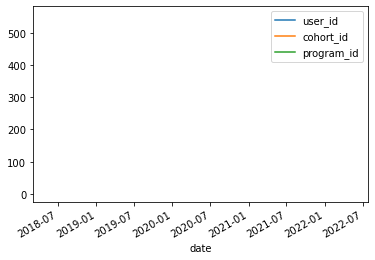

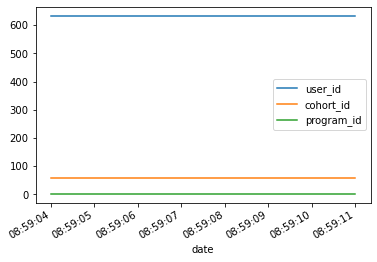

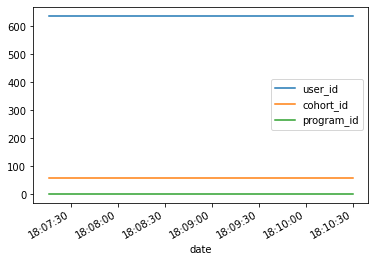

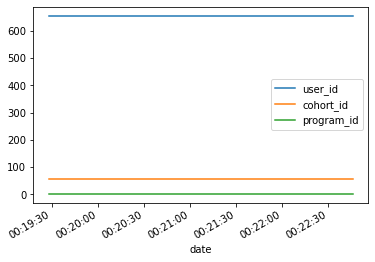

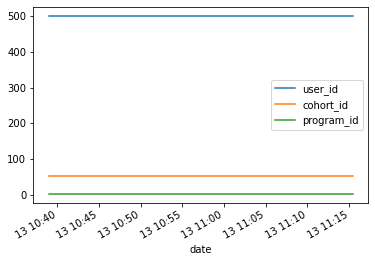

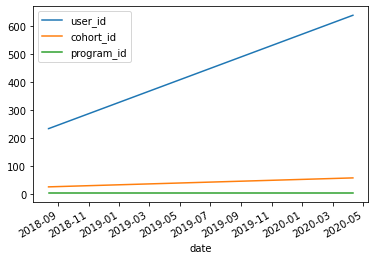

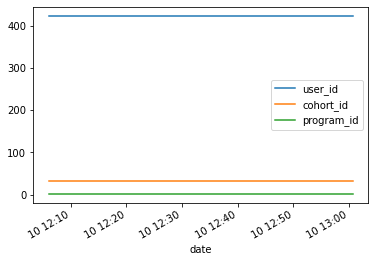

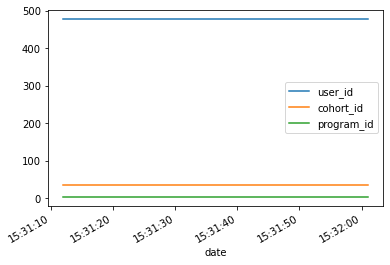

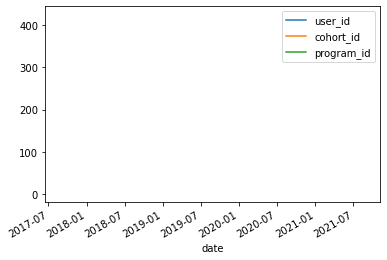

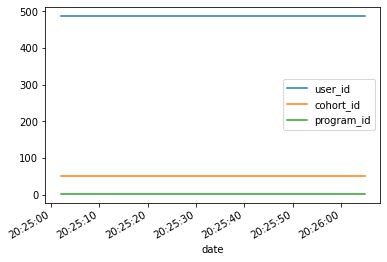

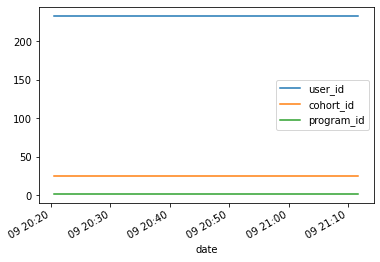

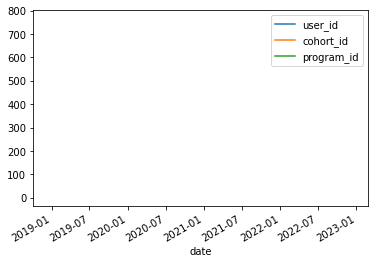

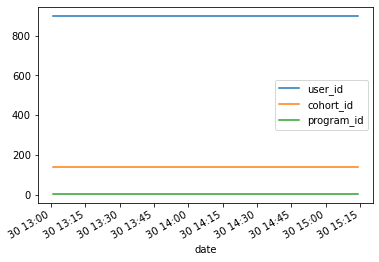

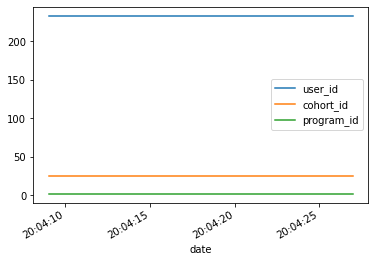

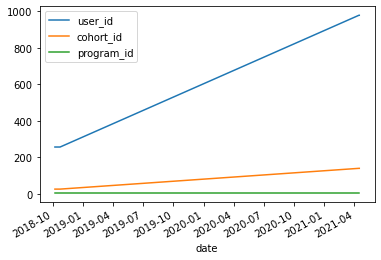

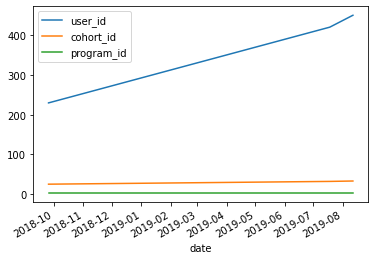

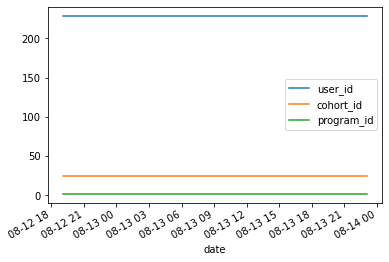

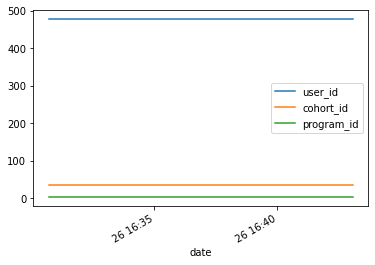

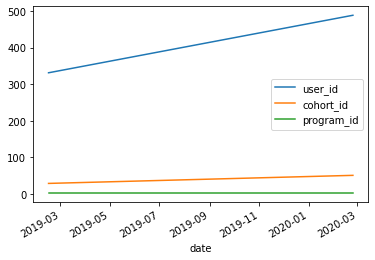

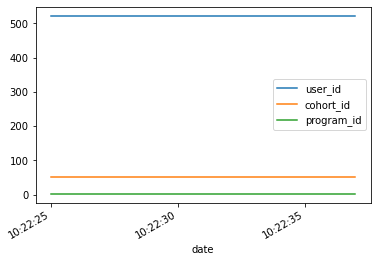

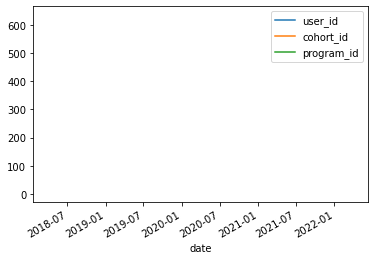

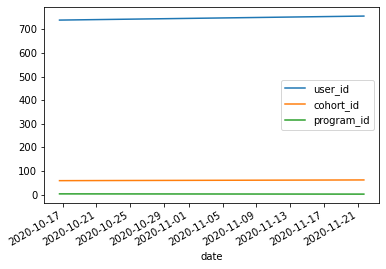

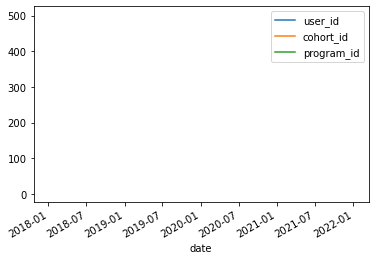

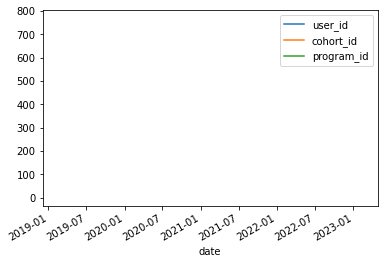

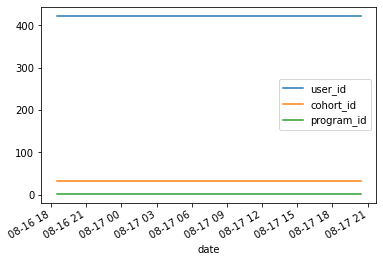

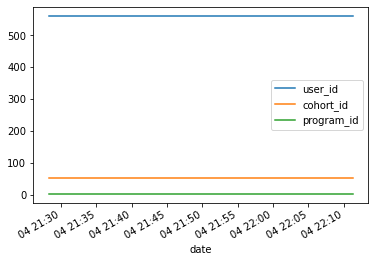

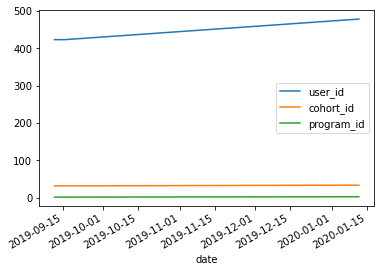

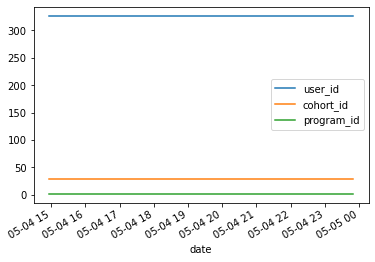

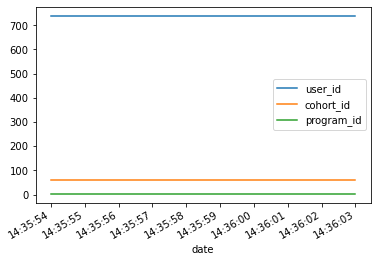

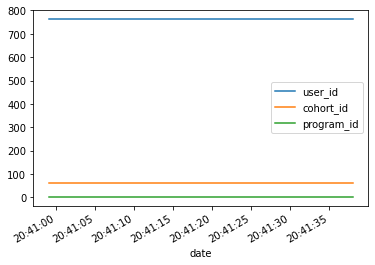

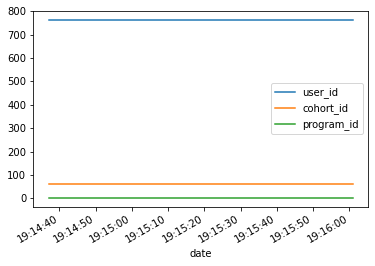

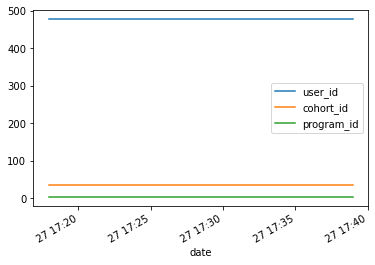

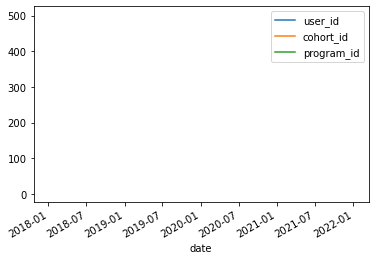

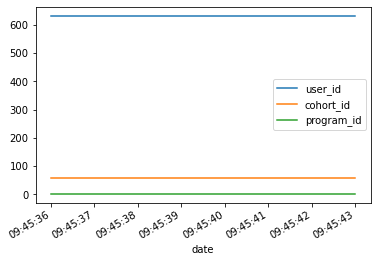

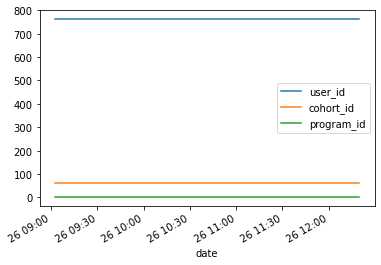

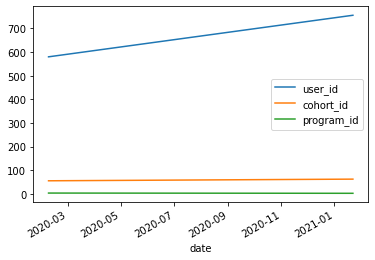

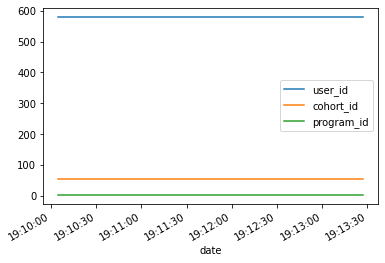

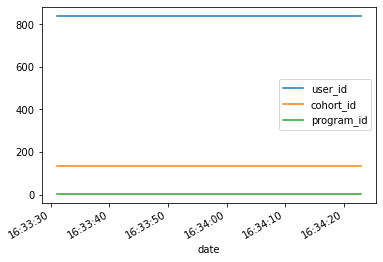

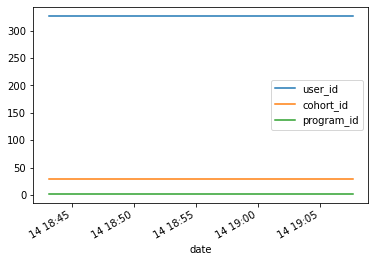

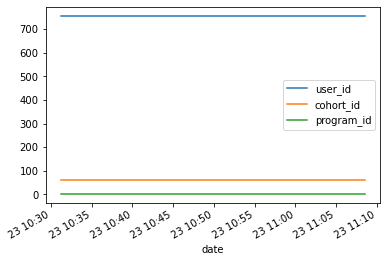

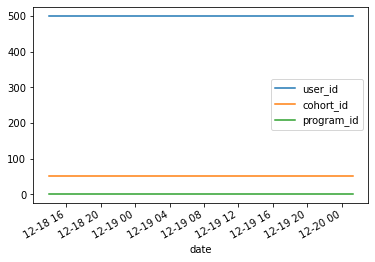

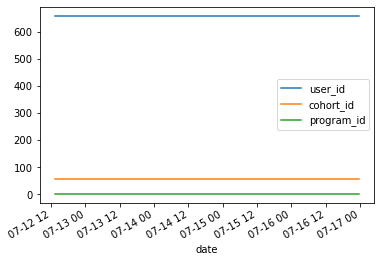

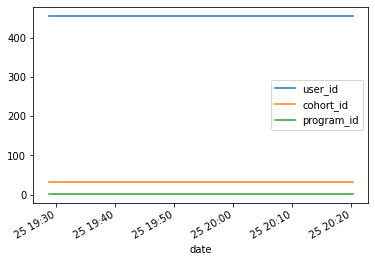

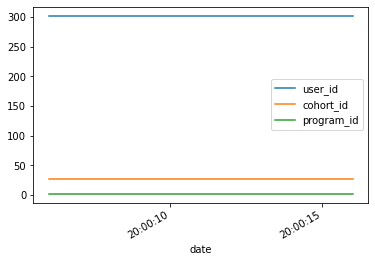

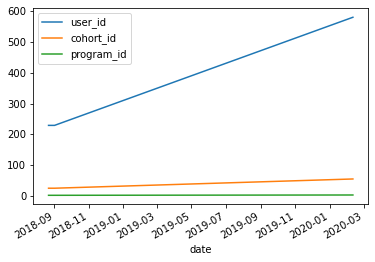

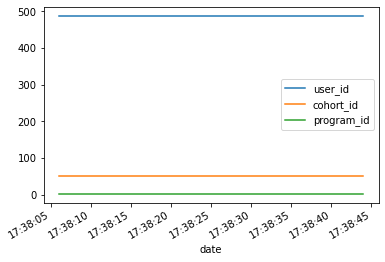

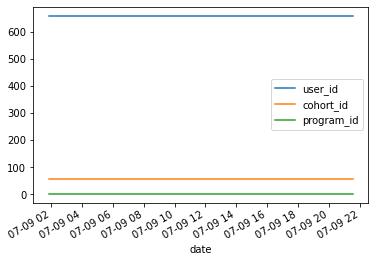

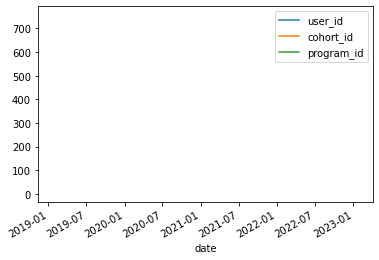

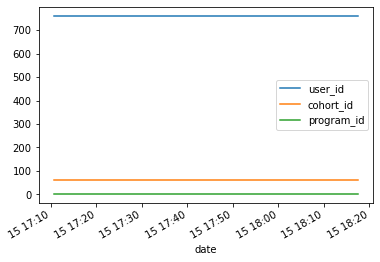

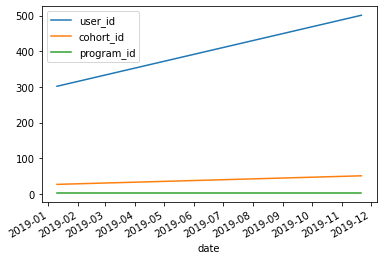

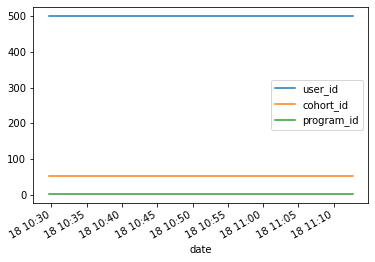

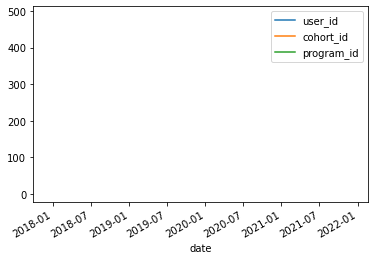

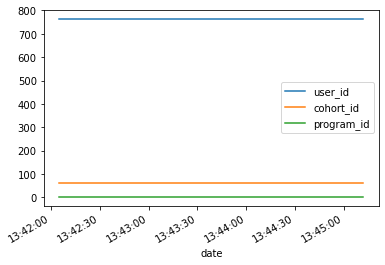

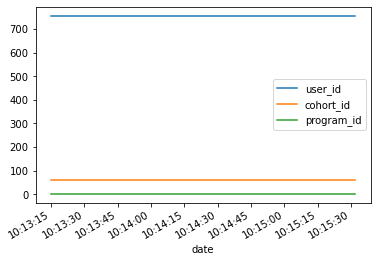

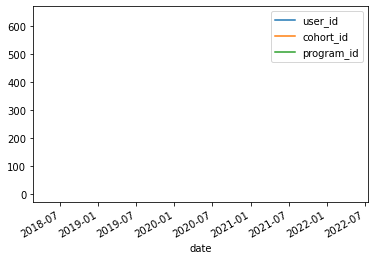

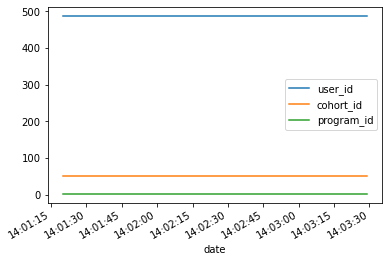

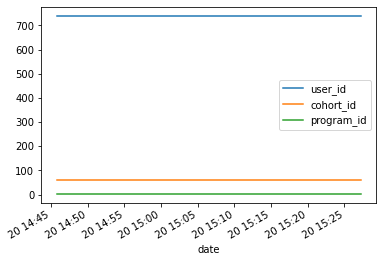

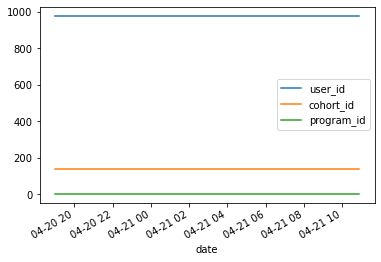

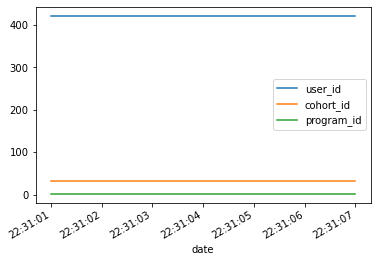

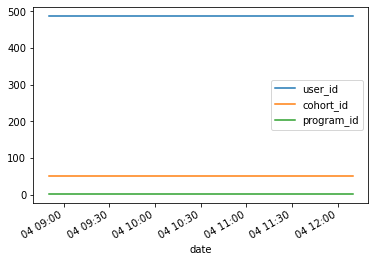

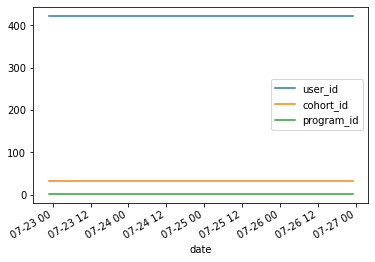

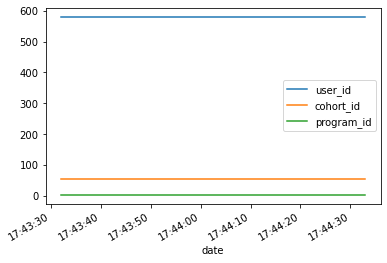

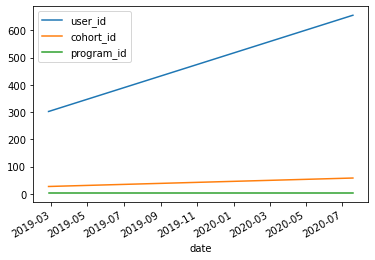

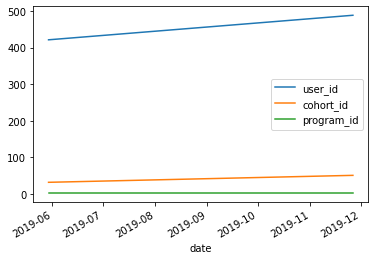

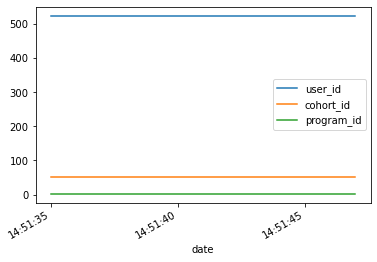

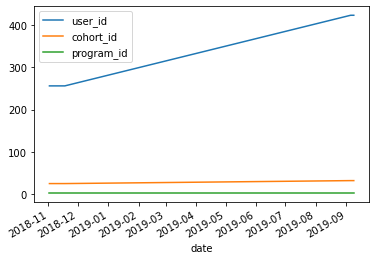

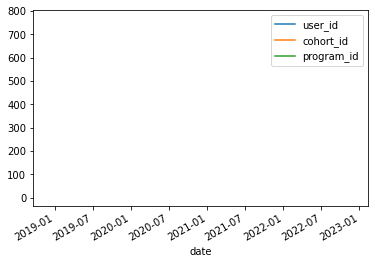

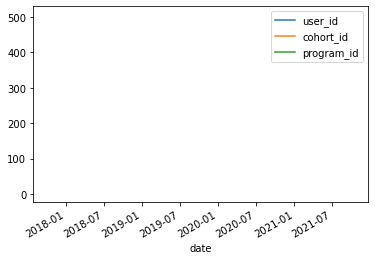

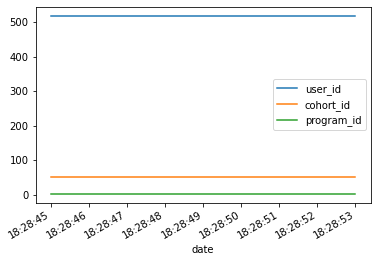

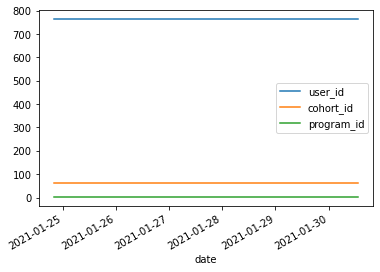

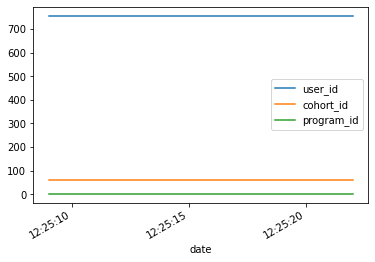

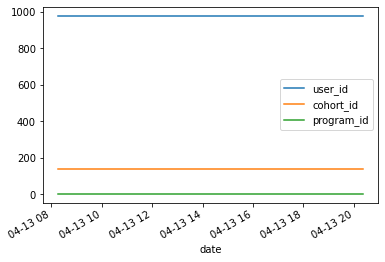

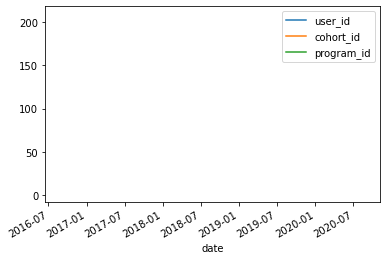

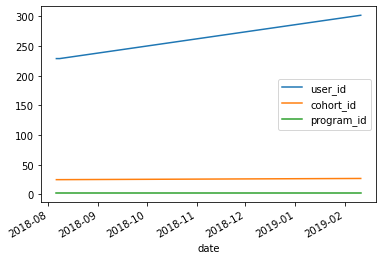

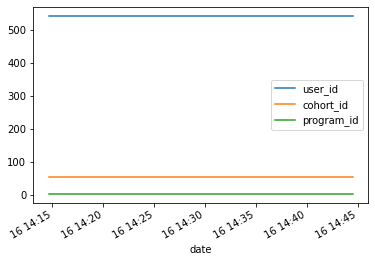

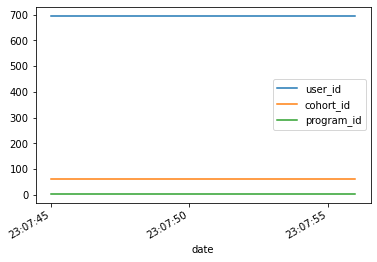

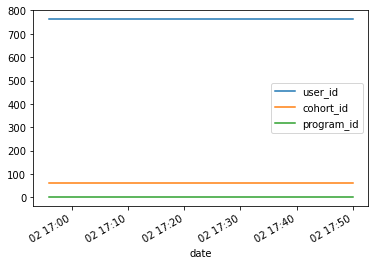

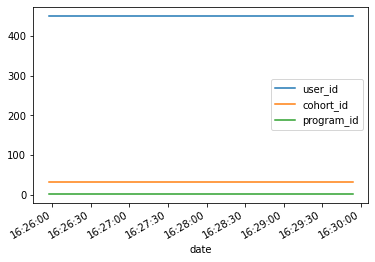

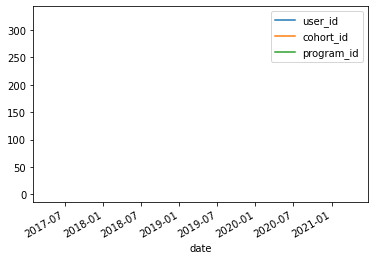

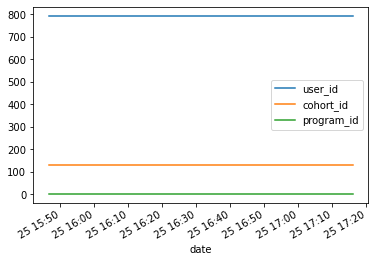

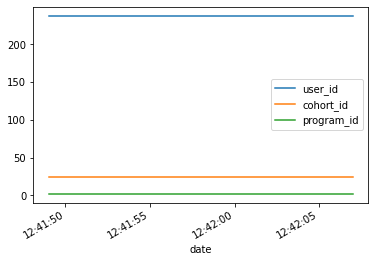

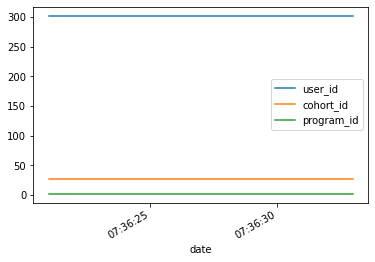

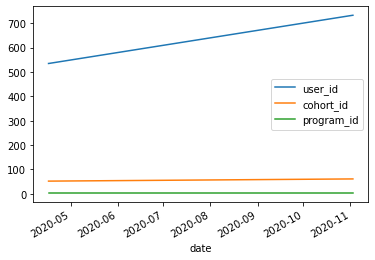

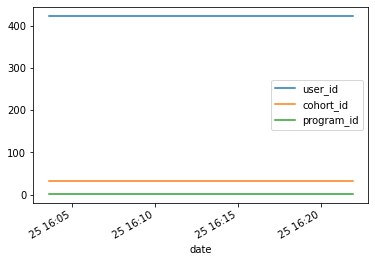

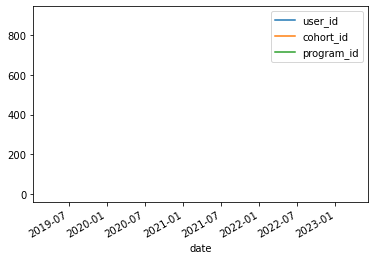

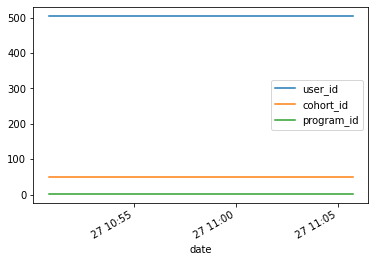

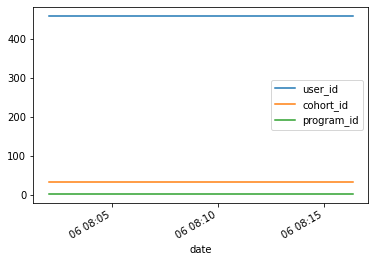

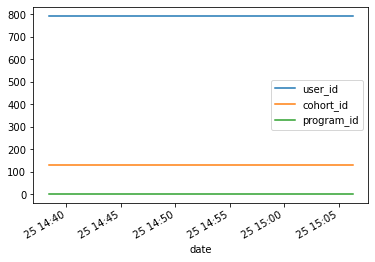

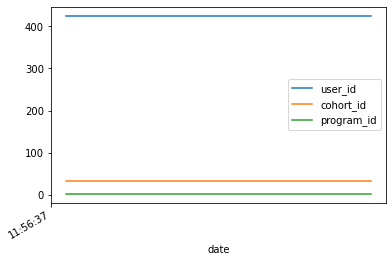

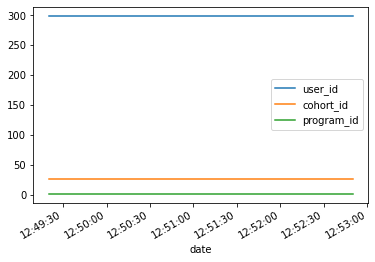

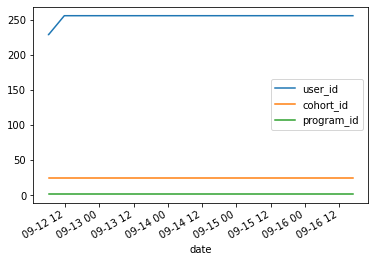

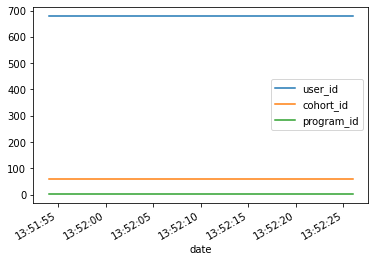

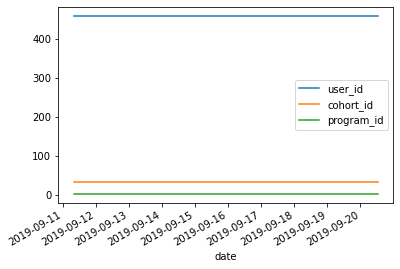

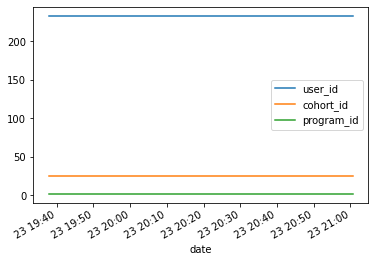

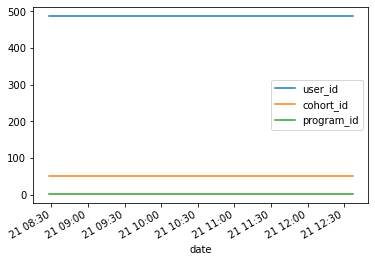

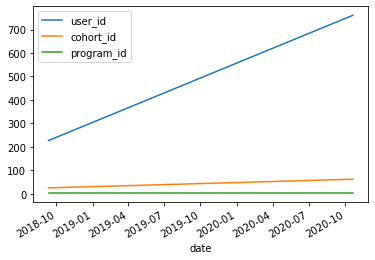

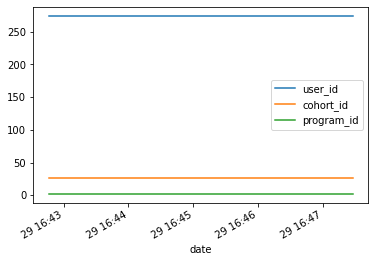

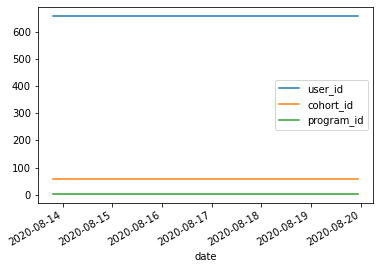

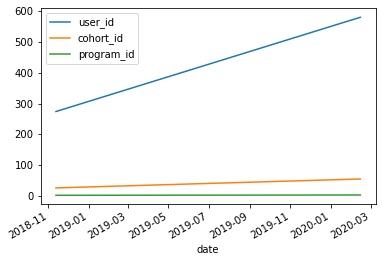

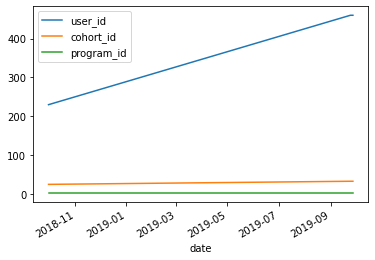

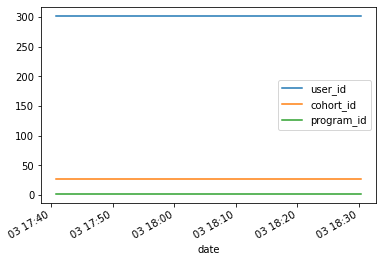

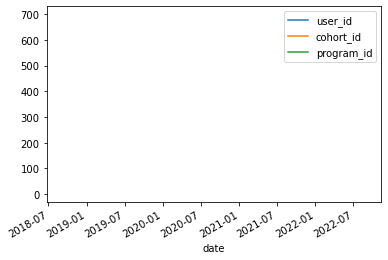

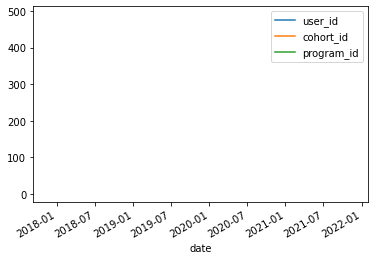

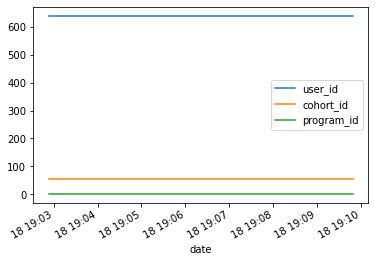

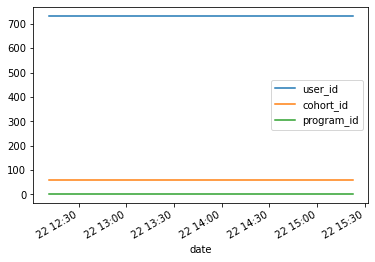

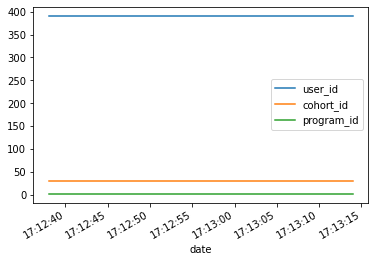

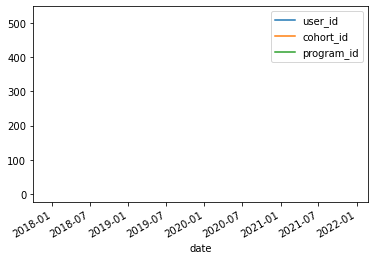

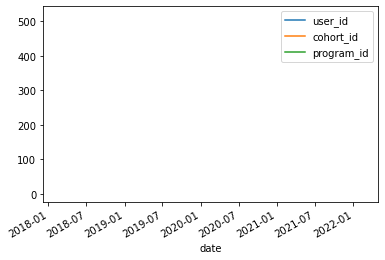

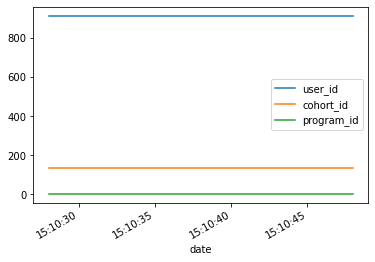

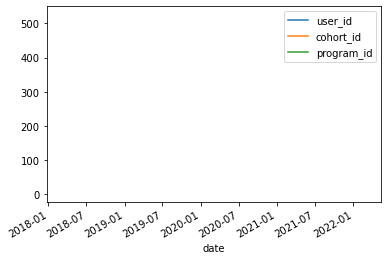

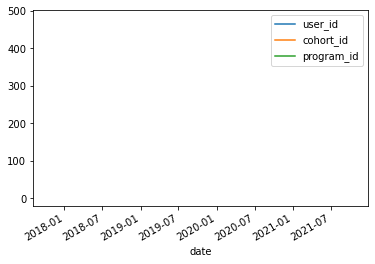

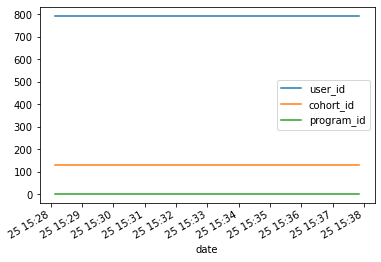

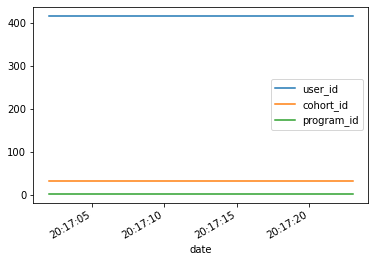

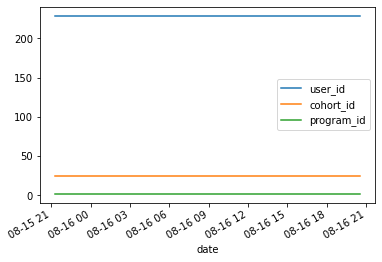

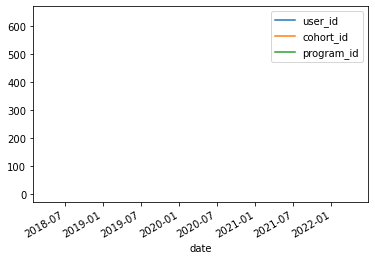

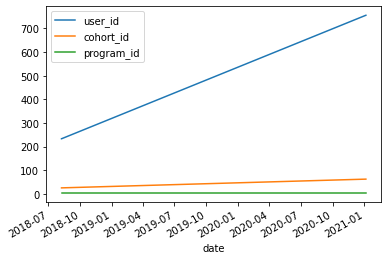

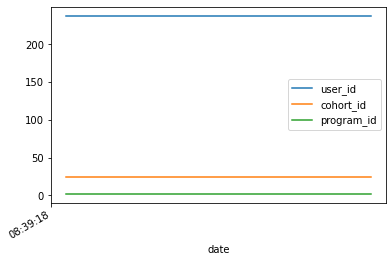

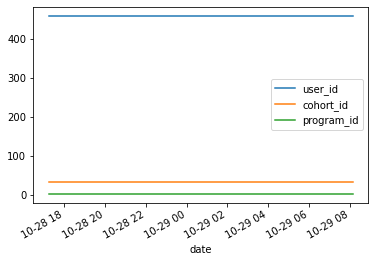

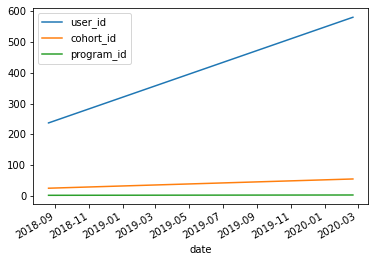

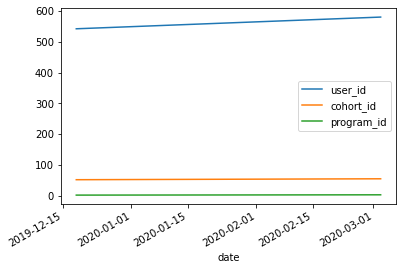

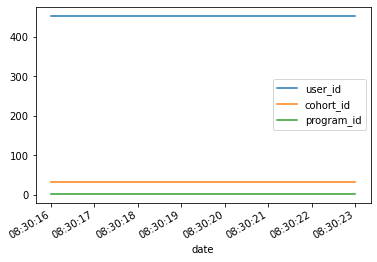

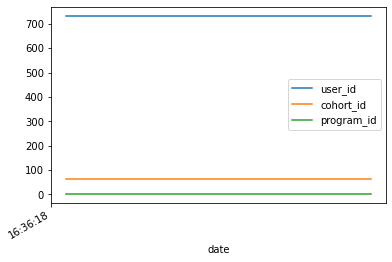

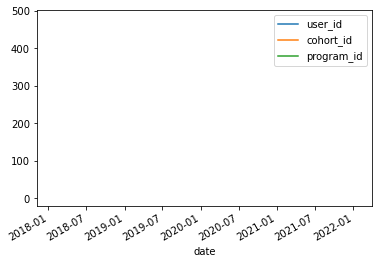

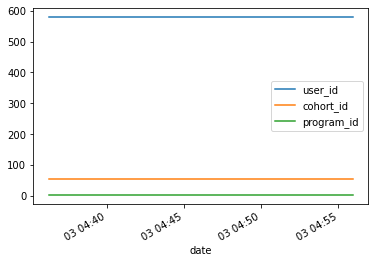

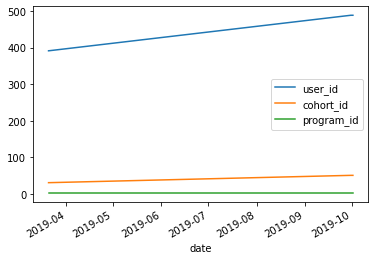

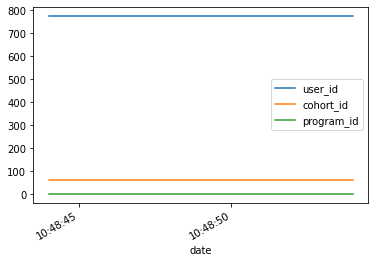

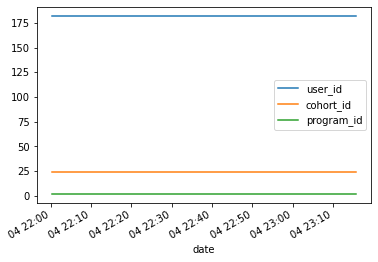

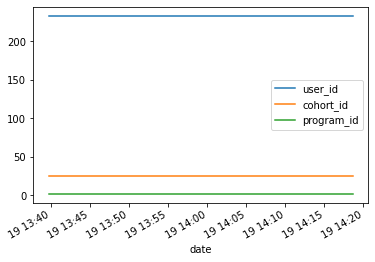

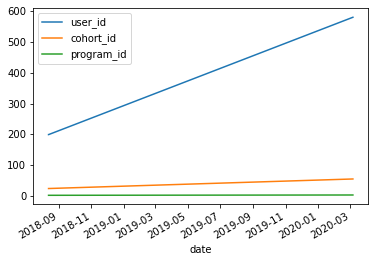

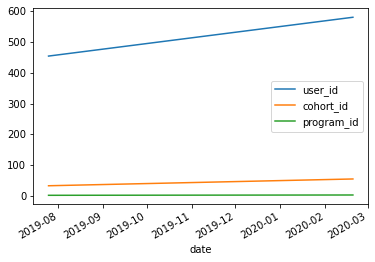

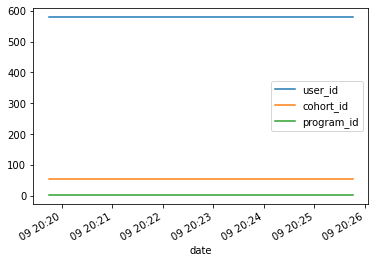

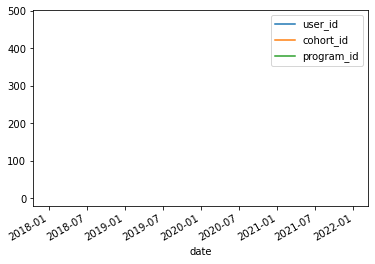

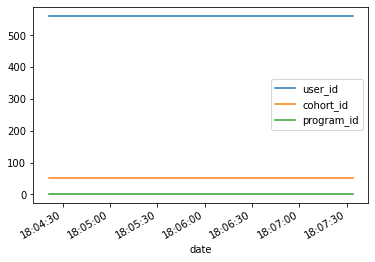

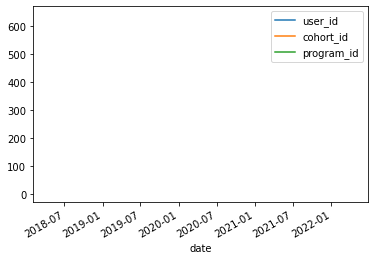

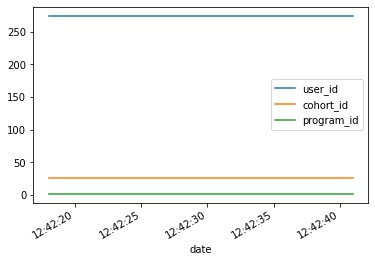

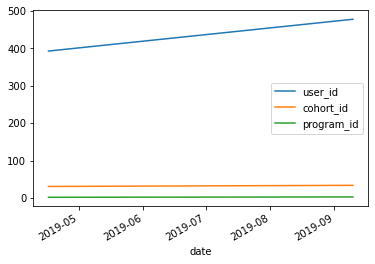

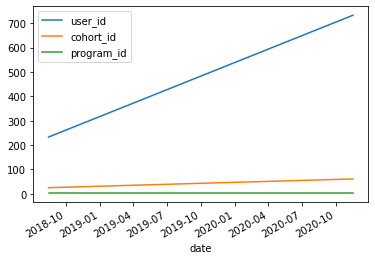

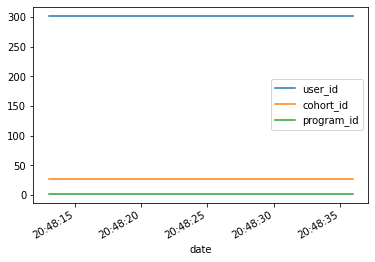

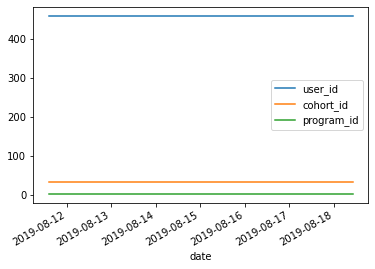

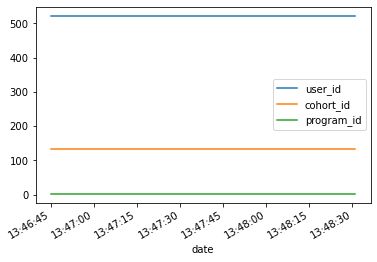

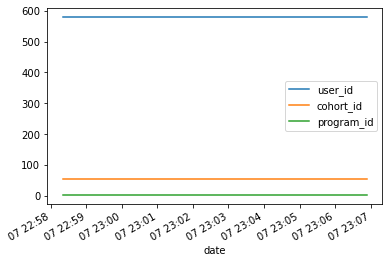

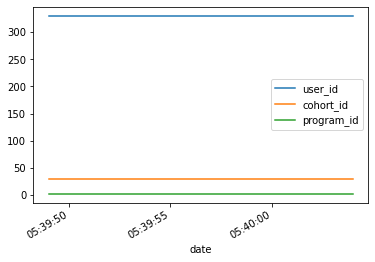

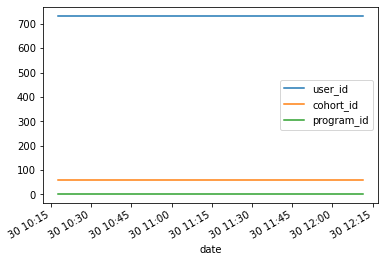

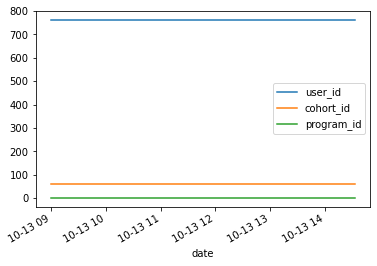

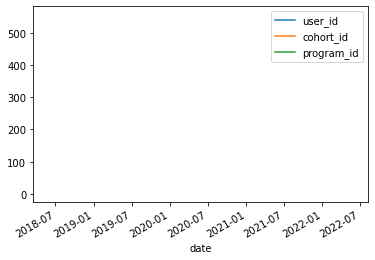

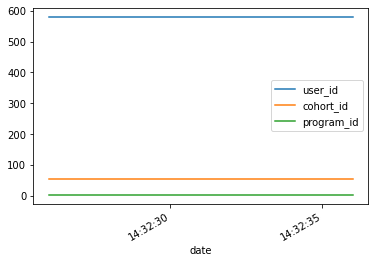

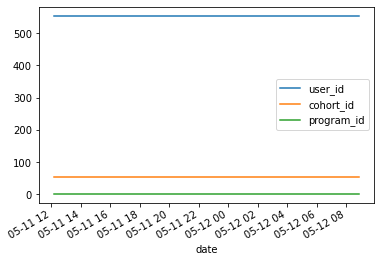

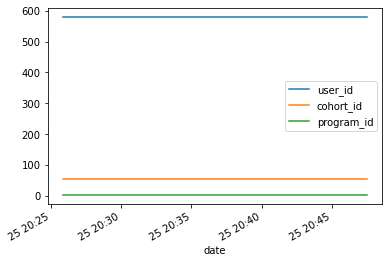

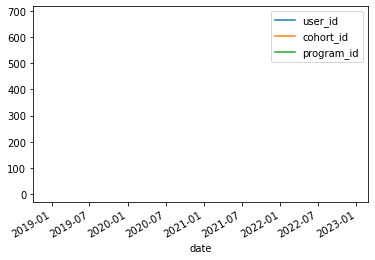

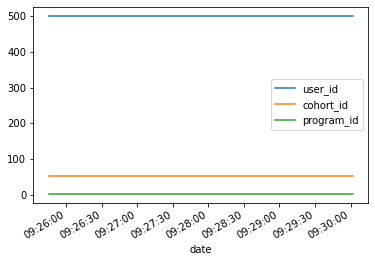

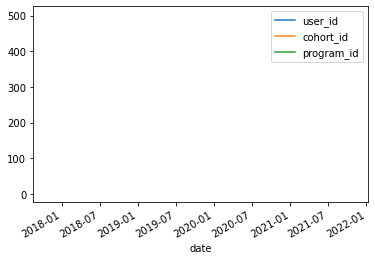

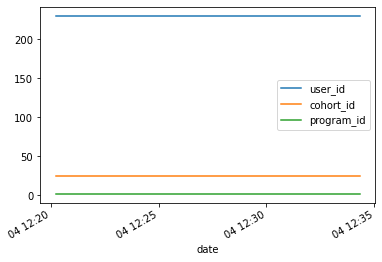

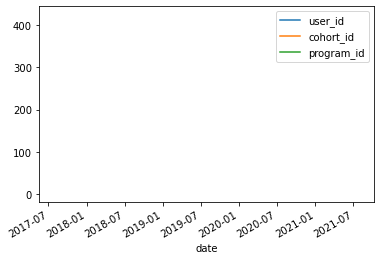

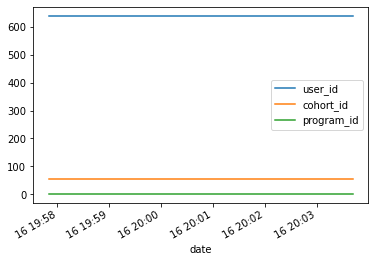

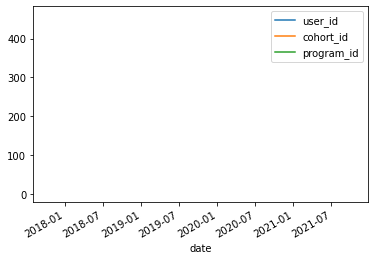

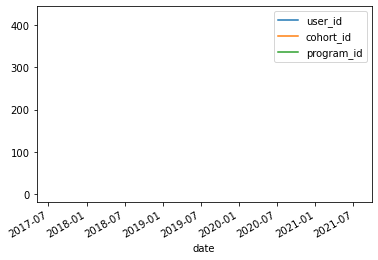

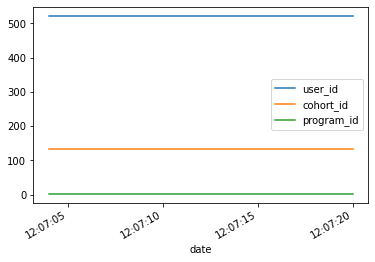

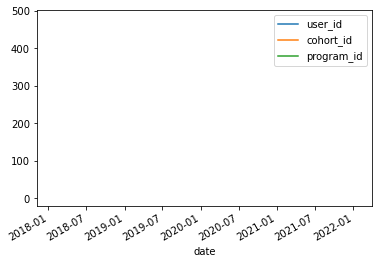

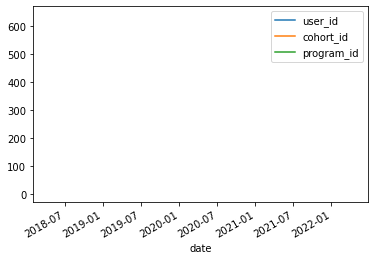

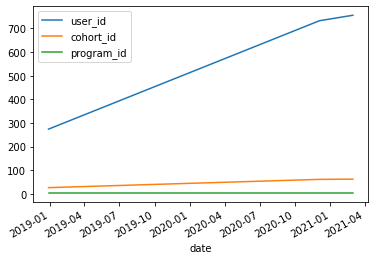

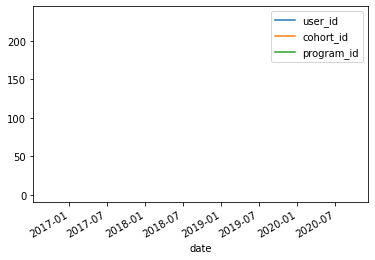

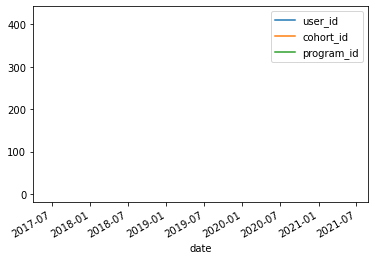

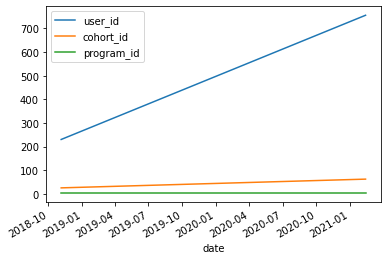

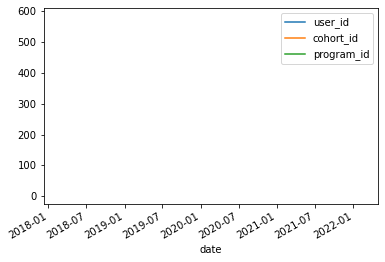

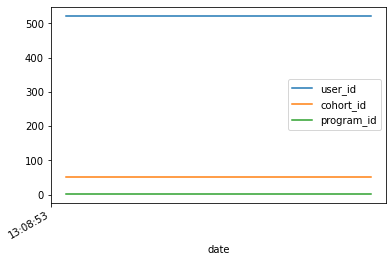

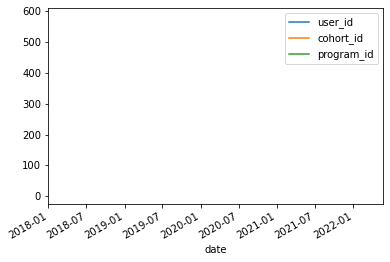

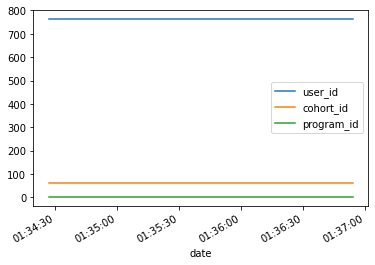

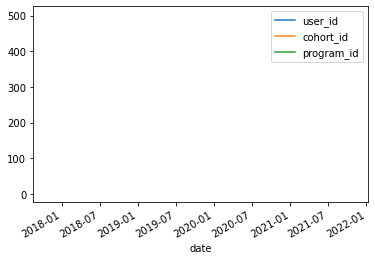

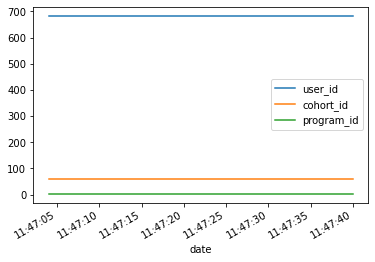

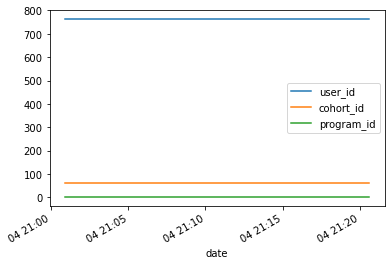

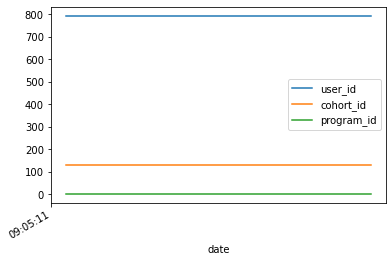

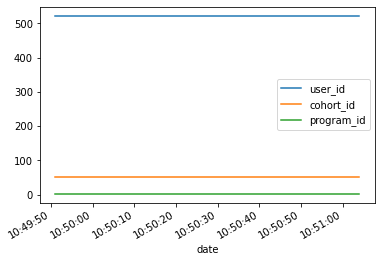

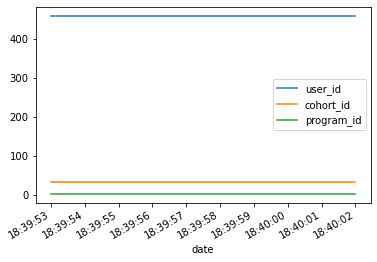

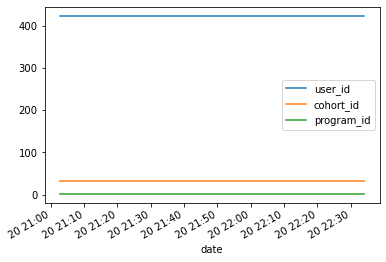

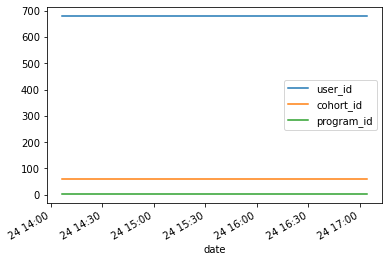

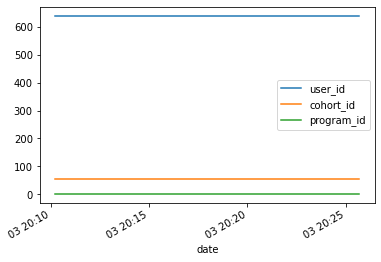

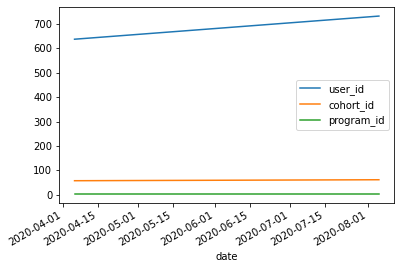

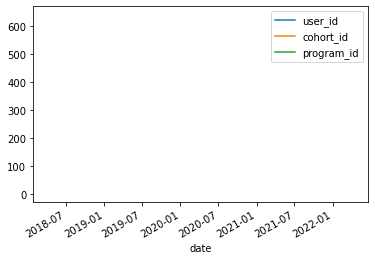

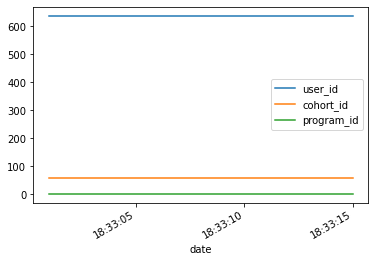

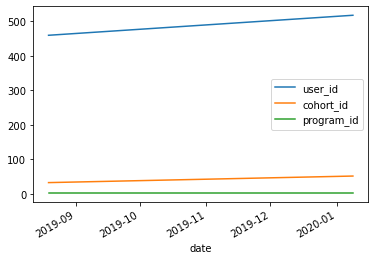

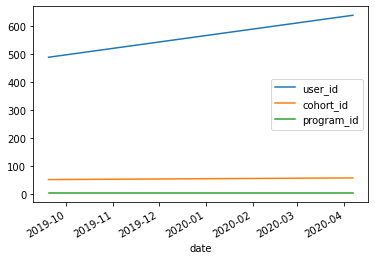

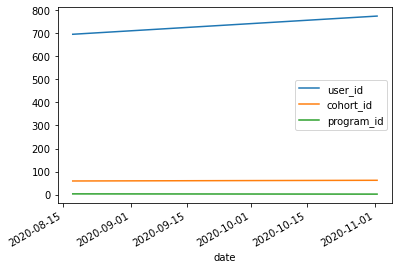

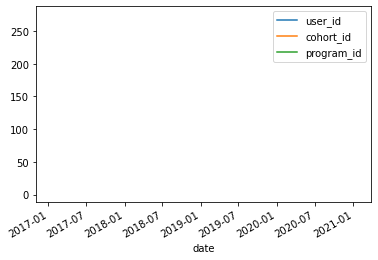

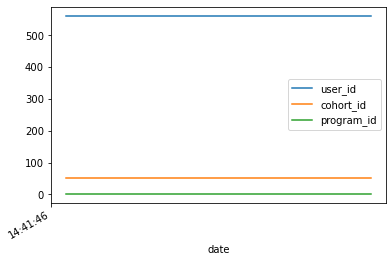

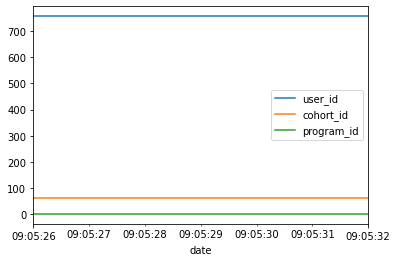

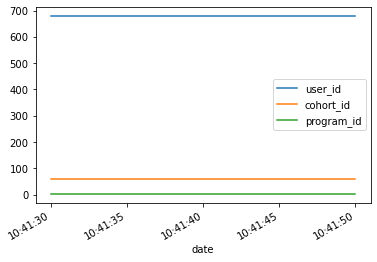

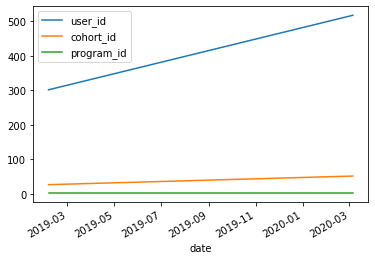

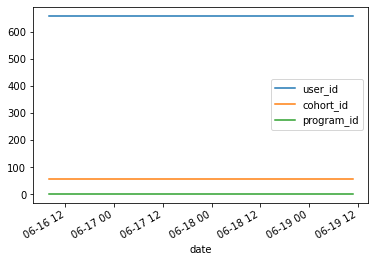

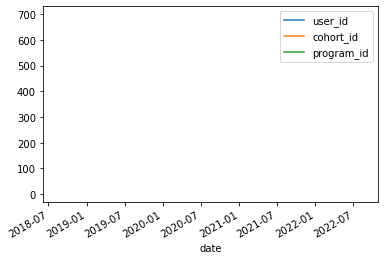

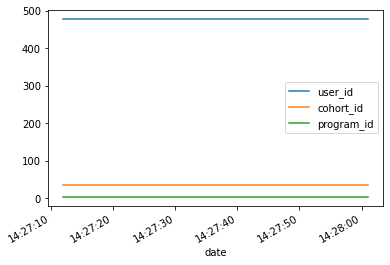

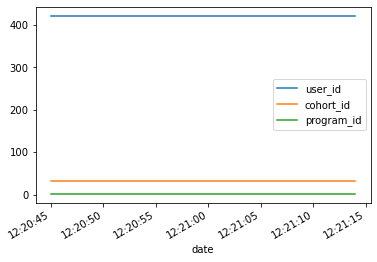

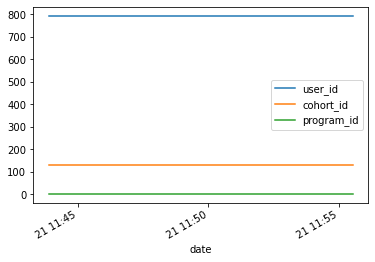

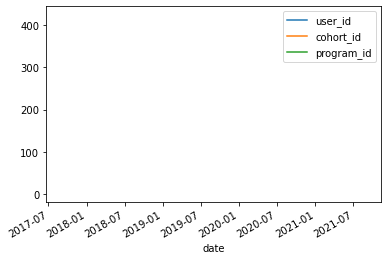

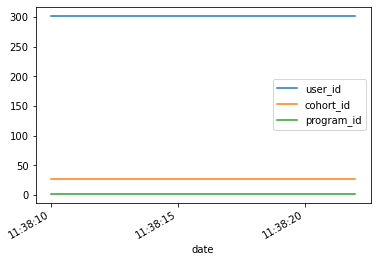

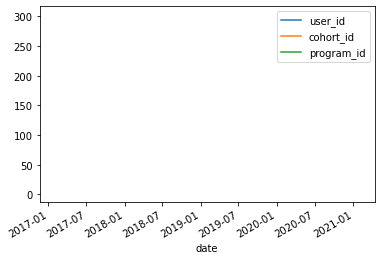

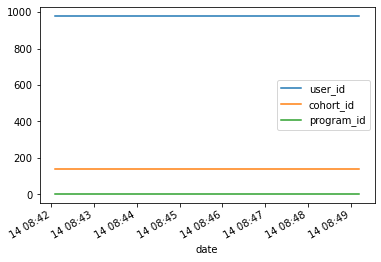

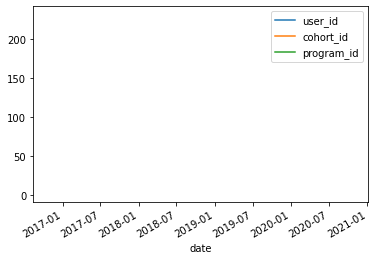

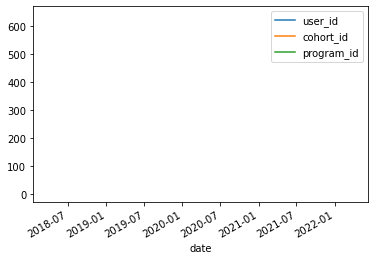

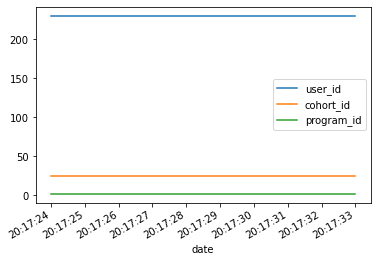

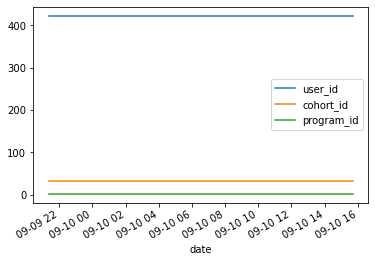

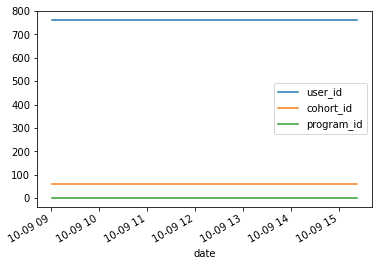

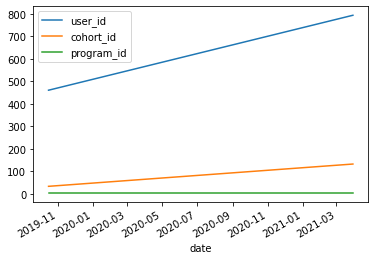

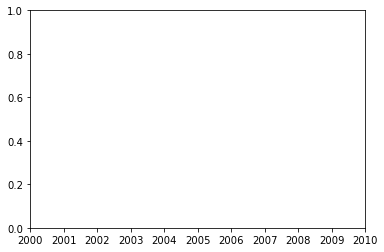

In [63]:

df[df.index < df.end_date].groupby('ip').plot()

In [42]:
df[df.path.str.contains('capstone')]

path  user_id  cohort_id  \
date                                                                    
2018-01-26 10:35:36    appendix/capstone-workbook       15       21.0   
2018-01-26 11:12:04    appendix/capstone-workbook       10       21.0   
2018-01-26 11:12:07    appendix/capstone-workbook       22       21.0   
2018-01-26 11:24:29    appendix/capstone-workbook       24       21.0   
2018-01-26 11:36:38    appendix/capstone-workbook       16       21.0   
...                                           ...      ...        ...   
2021-04-20 21:25:19           capstones/capstones      478       34.0   
2021-04-20 23:46:21                      capstone      919      138.0   
2021-04-20 23:46:40  capstone/sw-project-planning      919      138.0   
2021-04-21 08:10:34                      capstone      545       28.0   
2021-04-21 09:35:21           capstones/capstones      847      133.0   

                                 ip     name  start_date    end_date  \
date                                                                   
2018-01-26 10:35:36    97.105.19.61  Sequoia  2017-09-27  2018-02-15   
2018-01-26 11:12:04    97.105.19.61  Sequoia  2017-09-27  2018-02-15   
2018-01-26 11:12:07    97.105.19.61  Sequoia  2017-09-27  2018-02-15   
2018-01-26 11:24:29    97.105.19.61  Sequoia  2017-09-27  2018-02-15   
2018-01-26 11:36:38    97.105.19.61  Sequoia  2017-09-27  2018-02-15   
...                             ...      ...         ...         ...   
2021-04-20 21:25:19    67.11.138.10    Bayes  2019-08-19  2020-01-30   
2021-04-20 23:46:21    72.191.142.5  Neptune  2021-03-15  2021-09-03   
2021-04-20 23:46:40    72.191.142.5  Neptune  2021-03-15  2021-09-03   
2021-04-21 08:10:34  12.106.208.194    Staff  2014-02-04  2014-02-04   
2021-04-21 09:35:21  173.174.194.60   Easley  2020-12-07  2021-06-08   

                              created_at           updated_at  program_id  \
date                                                                        
2018-01-26 10:35:36  2017-09-27 20:22:41  2017-09-27 20:22:41         2.0   
2018-01-26 11:12:04  2017-09-27 20:22:41  2017-09-27 20:22:41         2.0   
2018-01-26 11:12:07  2017-09-27 20:22:41  2017-09-27 20:22:41         2.0   
2018-01-26 11:24:29  2017-09-27 20:22:41  2017-09-27 20:22:41         2.0   
2018-01-26 11:36:38  2017-09-27 20:22:41  2017-09-27 20:22:41         2.0   
...                                  ...                  ...         ...   
2021-04-20 21:25:19  2019-08-20 14:38:55  2019-08-20 14:38:55         3.0   
2021-04-20 23:46:21  2021-03-15 19:57:09  2021-03-15 19:57:09         2.0   
2021-04-20 23:46:40  2021-03-15 19:57:09  2021-03-15 19:57:09         2.0   
2021-04-21 08:10:34  2018-12-06 17:04:19  2018-12-06 17:04:19         2.0   
2021-04-21 09:35:21  2020-12-07 15:20:18  2020-12-07 15:20:18         3.0   

                            program       root             end_path  
date                                                                 
2018-01-26 10:35:36  fullstack_java   appendix    capstone-workbook  
2018-01-26 11:12:04  fullstack_java   appendix    capstone-workbook  
2018-01-26 11:12:07  fullstack_java   appendix    capstone-workbook  
2018-01-26 11:24:29  fullstack_java   appendix    capstone-workbook  
2018-01-26 11:36:38  fullstack_java   appendix    capstone-workbook  
...                             ...        ...                  ...  
2021-04-20 21:25:19    data_science  capstones            capstones  
2021-04-20 23:46:21  fullstack_java   capstone                 None  
2021-04-20 23:46:40  fullstack_java   capstone  sw-project-planning  
2021-04-21 08:10:34  fullstack_java   capstone                 None  
2021-04-21 09:35:21    data_science  capstones            capstones  

[6296 rows x 13 columns]

In [43]:
ds_topics.root

0                   sql
1          fundamentals
2                      
3        classification
4                python
5            regression
6     anomaly-detection
7                 stats
8              appendix
9            timeseries
10               search
11                  nlp
12           clustering
13       distributed-ml
14         storytelling
15      advanced-topics
Name: root, dtype: object

In [44]:

# list(set(ds_curr.index) & set(wd_curr.index))

In [45]:
# subset[(subset.program != 3) & (subset.base == 'python')]